---

# Plot Variable of Interest Across Studies


## Import

In [1]:
# Import packages we'll use

import importlib
import numpy as np
import pandas as pnd
idx = pnd.IndexSlice

import os, sys
from pathlib import Path
import datetime as dt
import time

import matplotlib.pyplot as plt
# import matplotlib.colormaps as colormaps
# from plt import colormaps
import seaborn as sns
from contextlib import redirect_stdout

###  load calsim object for conveninece #<-- setting path - ***NOTE: YOU'LL WANT TO CHANGE THIS TO 
                                                            # THE LOCATION ON YOUR COMPUTER WHERE THE
                                                            # cs3.py FILE IS SAVED
sys.path.insert(0,r'C:\\Users\\scrus\\OneDrive\\Desktop\\CalSIM\\Scripting Files')
sys.path.append('C:\\Users\\scrus\\OneDrive\\Desktop\\CalSIM\\Scripting Files')
import dss3_functions_reference as dss
#import cs3  #<-- main calsim file
import cs3  #<-- main calsim file
import cs_util as util  #<-- utilities
import AuxFunctions as af  #<-- DSS utilities
import csPlots   #<-- CalSim plots


## Define variable of interest to compare across studies

In [91]:
VariableOfInterest = 'D_SPRING'
# VariableOfInterest = 'DEL_SWP_PAG' # multiple variables contain this string!


## Make directory

In [3]:
path = os.path.join('./', VariableOfInterest)
os.makedirs(path, exist_ok=True)
fPath = './' + VariableOfInterest + './'
print("Directory '%s' created" %fPath) 


Directory './DEL_CVP_TOTAL_N./' created


## Read Studies

In [4]:
# Excel file with listing of studies (paths to DSS files)
studyfp = r'C:\\Users\\scrus\\OneDrive\\Desktop\\CalSIM\\Scripting Files\calsim3_selected_studies.xlsx'
#stuhdr, stuname = af.read_from_excel(studyfp, 'Studies','A1','A15',hdr=True)
#abbhdr, abbname = af.read_from_excel(studyfp, 'Studies','B1','B15',hdr=True)
#lauhdr, launame = af.read_from_excel(studyfp, 'Studies','C1','C15',hdr=True)
stuhdr, stuname = af.read_from_excel(studyfp, 'Studies','A1','A6',hdr=True)
abbhdr, abbname = af.read_from_excel(studyfp, 'Studies','B1','B6',hdr=True)
lauhdr, launame = af.read_from_excel(studyfp, 'Studies','C1','C6',hdr=True)


In [5]:
study_names = []
for i in stuname:
    study_names = study_names + i

study_names

['CalLite3.0_Release_V2jmg',
 'CalLite3.0_Release_V2jmg_mod1',
 'CalLite3.0_Release_V2jmg_mod2',
 'CalLite3.0_Release_V2jmg_mod3',
 'CalLite3.0_Release_V2jmg_mod4']

In [6]:
alias = []
for i in abbname:
    alias = alias + i

alias

['RegBase', 'RegNo1', 'RegNo2', 'RegNo3', 'RegNo4']

In [7]:
launch_names = []
for i in launame:
    launch_names = launch_names + i

launch_names

['callite3_dwr_v2.launch',
 'modvar1.launch',
 'modvar2.launch',
 'modvar3.launch',
 'modvar4.launch']

## Read variables

In [8]:
#study_names = ['CalLite3.0_Release_V2jmg_RegBase'] # to be changed later to read from calsim3_selected_studies
#launch_names = ['callite3_dwr_v2_reg_base.launch']
#alias = ['baseline']

#study_names = ['CalLite3.0_Release_V2jmg_RegBase', 'CalLite3.0_Release_V2jmg_RegNoX2'] # to be changed later to read from calsim3_selected_studies
#launch_names = ['callite3_dwr_v2_reg_base.launch', 'callite3_dwr_v2_reg_nox2.launch']
#alias = ['baseline', 'regnoX2']

# Excel file with listing of variables (B & C parts)
xlfp = r'C:\Users\scrus\OneDrive\Desktop\WRESL\CalLite3.0_Release_V2jmg\calsim3_callite_selected_output_variables_db.xlsx'
xltab = r'CS3_CalLite_Output_SelectData'
# launch file path to example CalLite (or CalSim) study

launch_base_directory = r'C:\Users\scrus\OneDrive\Desktop\WRESL\CalLite3.0_Release_V2jmg'
launchFP = os.path.join(launch_base_directory, 'CalLite3.0_Release_V2jmg\callite3_dwr_v2.launch') 

# set the output location -default is in the base directory with the launchfile
#outdir = os.path.dirname(launchFP)  #<-- you can change this to something else if you want!
outdir = os.path.dirname(launch_base_directory)  #<-- you can change this to something else if you want!

stohdr, stovars = af.read_from_excel(xlfp, xltab,'A3','C16',hdr=True)
flohdr, flovars = af.read_from_excel(xlfp, xltab,'F3','H28',hdr=True)
delhdr, delvars = af.read_from_excel(xlfp, xltab,'K3','M34',hdr=True)

deldf_vars = pnd.DataFrame(data=delvars, columns=delhdr)
stodf_vars = pnd.DataFrame(data=stovars, columns=stohdr)
flodf_vars = pnd.DataFrame(data=flovars, columns=flohdr)

In [9]:
stodf_vars

Description DSS Part B DSS Part C
0              Trinity    S_TRNTY    STORAGE
1               Shasta    S_SHSTA    STORAGE
2             Oroville    S_OROVL    STORAGE
3               Folsom    S_FOLSM    STORAGE
4   San Luis - Federal    S_SLCVP    STORAGE
5     San Luis - State    S_SLSWP    STORAGE
6            New Hogan    S_NHGAN    STORAGE
7          New Melones    S_MELON    STORAGE
8        New Don Pedro    S_PEDRO    STORAGE
9              McClure    S_MCLRE    STORAGE
10             Eastman    S_ESTMN    STORAGE
11             Hensley    S_HNSLY    STORAGE
12           Millerton    S_MLRTN    STORAGE

In [10]:
deldf_vars

Description       DSS Part B  \
0             SWP South of Delta Delivery A21     SWP_IN_TOTAL   
1     SWP South of Delta Delivery - Carryover     SWP_CO_TOTAL   
2       SWP South of Delta Delivery - Table A     SWP_TA_TOTAL   
3                    Total Exports from Delta        TOTAL_EXP   
4                       CVP SOD Ag Allocation    PERDV_CVPAG_S   
5                       CVP NOD AG Allocation  PERDV_CVPAG_SYS   
6                       SWP SOD Ag Allocation    PERDV_SWP_AG1   
7              SWP Feather Service Allocation    PERDV_SWP_FSC   
8        CVP Settlement Contractor Allocation  PERDV_CVPSC_SYS   
9          CVP Exchange Contractor Allocation    PERDV_CVPEX_S   
10                  CVP NOD Refuge Allocation  PERDV_CVPRF_SYS   
11                  CVP SOD Refuge Allocation    PERDV_CVPRF_S   
12                     CVP NOD M&I Allocation  PERDV_CVPMI_SYS   
13                     CVP SOD M&I Allocation    PERDV_CVPMI_S   
14                 CVP NOD Ag delivery amount    DEL_CVP_PAG_N   
15                 CVP SOD Ag Delivery amount    DEL_CVP_PAG_S   
16                CVP NOD M&I Delivery amount    DEL_CVP_PMI_N   
17                CVP SOD M&I Delivery amount    DEL_CVP_PMI_S   
18  CVP Settlement Contractor Delivery amount    DEL_CVP_PSC_N   
19    CVP Exchange Contractor delivery amount    DEL_CVP_PEX_S   
20             CVP NOD Refuge delivery amount    DEL_CVP_PRF_N   
21             CVP SOD Refuge delivery amount    DEL_CVP_PRF_S   
22              CVP Total NOD delivery amount  DEL_CVP_TOTAL_N   
23              CVP Total SOD delivery amount  DEL_CVP_TOTAL_S   
24                        SWP Delivery to MWD      DEL_SWP_MWD   
25                     SWP Delivery to NOD Ag    DEL_SWP_PAG_N   
26                     SWP Delivery to SOD Ag    DEL_SWP_PAG_S   
27                    SWP Delivery to NOD M&I    DEL_SWP_PMI_N   
28                    SWP Delivery to SOD M&I    DEL_SWP_PMI_S   
29                     SWP Total SOD Delivery    DEL_SWP_TOT_S   
30                     SWP Total NOD Delivery    DEL_SWP_TOT_N   

          DSS Part C  
0       SWP_DELIVERY  
1       SWP_DELIVERY  
2       SWP_DELIVERY  
3      FLOW-DELIVERY  
4   PERCENT-DELIVERY  
5   PERCENT-DELIVERY  
6   PERCENT-DELIVERY  
7   PERCENT-DELIVERY  
8   PERCENT-DELIVERY  
9   PERCENT-DELIVERY  
10  PERCENT-DELIVERY  
11  PERCENT-DELIVERY  
12  PERCENT-DELIVERY  
13  PERCENT-DELIVERY  
14      DELIVERY-CVP  
15      DELIVERY-CVP  
16      DELIVERY-CVP  
17      DELIVERY-CVP  
18      DELIVERY-CVP  
19      DELIVERY-CVP  
20      DELIVERY-CVP  
21      DELIVERY-CVP  
22      DELIVERY-CVP  
23      DELIVERY-CVP  
24      DELIVERY-SWP  
25      DELIVERY-SWP  
26      DELIVERY-SWP  
27      DELIVERY-SWP  
28      DELIVERY-SWP  
29      DELIVERY-SWP  
30      DELIVERY-SWP

In [11]:
flodf_vars

Description   DSS Part B     DSS Part C
0                     Keswick Release to Sac R      C_KSWCK   FLOW-CHANNEL
1        Diversion from Trinity to Whiskeytown    D_CLEARTU    FLOW-TUNNEL
2                       Clear Cr flow to Sac R      C_WKYTN   FLOW-CHANNEL
3            Spring Cr PP diversion to Keswick     D_SPRING    FLOW-TUNNEL
4           Sac R below Clear Creek confluence     C_RedBlf   FLOW-CHANNEL
5   Red Bluff Diversion to Tehama-Colusa Canal     D_REDBLF  FLOW-DELIVERY
6       Red Bluff Diversion to other diverters     D_REDBLF  FLOW-DELIVERY
7                   Sac R below Wilkins Slough     C_WILKNS   FLOW-CHANNEL
8                    Feather River at Oroville      C_OROVL   FLOW-CHANNEL
9              Diversion to Thermalito Forebay      D_THERM  FLOW-DELIVERY
10         Thermalito release to Feather River      C_THERM   FLOW-CHANNEL
11   Feather River above confluence with Sac R     C_YUBFEA   FLOW-CHANNEL
12         Sac R below confluence with Feather     C_SACFEA   FLOW-CHANNEL
13           Lake Natoma release to American R     C_NIMBUS   FLOW-CHANNEL
14  American River above confluence with Sac r        C_HST   FLOW-CHANNEL
15        Sac R below confluence with American     C_SACAME   FLOW-CHANNEL
16                               Sac R at Hood       C_HOOD   FLOW-CHANNEL
17                         Total Delta Outflow     C_SACSJR   FLOW-CHANNEL
18                      Required Delta Outflow  D_DELTAREQD  FLOW-DELIVERY
19                        Excess Delta Outflow      C_DELTA   FLOW-CHANNEL
20             Federal Export Pumping at Jones      D_JONES  FLOW-DELIVERY
21               State Export Pumping at Banks      D_BANKS  FLOW-DELIVERY
22               San Joaquin River at Vernalis     C_SJRVER   FLOW-CHANNEL
23            San Joaquin River near Stevinson    C_SJRLNDR   FLOW-CHANNEL
24   Delta-Mendota Canal flows to Mendota Pool  D_MENDOTAPL  FLOW-DELIVERY

## Create datasets across studies (add some storage variables)


In [12]:
def preprocess_data(df, addsl=False):
    dvar_list = []
    combined_df = pnd.DataFrame()
    
    for i, r in df.iterrows():
        dvar_list.append(f'/{r["DSS Part B"]}/{r["DSS Part C"]}/')

    for study_name, launch_name, alias_name in zip(study_names, launch_names, alias):

        launchFP_study = os.path.join(launch_base_directory, study_name)
        launchFP = os.path.join(launchFP_study, launch_name)
        print(launchFP)
        
        # Create a python "calsim" object
        thiscs3 = cs3.calsim(launchFP=launchFP, csvers=3, reorg=True)

        # Retrieve the DSS data variables from the DSS file
        thiscs3.DVdata.getDVts(filter=dvar_list)

        df = thiscs3.DVdata.DVtsDF.copy(deep=True)
        
        # if storage add the 2 variables to create a new one
        # Add S_SLSCVP and S_SLSWP into S_SLTOT

        if addsl:
            df[('CALLITE', 'S_SLTOT', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF')] = df.loc[:,[('CALLITE', 'S_SLCVP', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF'),('CALLITE', 'S_SLSWP', 'STORAGE', '1MON', '2020D09E', 'PER-AVER', 'TAF')]].sum(axis=1)
      
        new_columns = [(col[0], f'{col[1]}_{alias_name}', *col[2:]) if len(col) > 1 else (col[0], '') for col in df.columns]
        df.columns = pnd.MultiIndex.from_tuples(new_columns)
        df.columns.names = ['A', 'B', 'C', 'D', 'E', 'F', 'Units']
        combined_df = pnd.concat([combined_df, df], axis=1)
    
    return combined_df

In [13]:
deldf = preprocess_data(deldf_vars)
stodf = preprocess_data(stodf_vars)
flodf = preprocess_data(flodf_vars)

C:\Users\scrus\OneDrive\Desktop\WRESL\CalLite3.0_Release_V2jmg\CalLite3.0_Release_V2jmg\callite3_dwr_v2.launch
Project directory set as: C:\Users\scrus\OneDrive\Desktop\WRESL\CalLite3.0_Release_V2jmg\CalLite3.0_Release_V2jmg

Opened file: C:\Users\scrus\OneDrive\Desktop\WRESL\CalLite3.0_Release_V2jmg\CalLite3.0_Release_V2jmg\DSS\baseline_CalLite2019Plus_V2jmg.dss
Valid catalog found: True 
Number of records: 38655
Took 0.07287335395812988 sec to convert paths to dataframe
Took 0.016340017318725586 sec to do group-by operation
Took 0.0 sec to add column
Took 0.24403762817382812 sec to rebuild modified path
Filtering path list
C:\Users\scrus\OneDrive\Desktop\WRESL\CalLite3.0_Release_V2jmg\CalLite3.0_Release_V2jmg_mod1\modvar1.launch
Project directory set as: C:\Users\scrus\OneDrive\Desktop\WRESL\CalLite3.0_Release_V2jmg\CalLite3.0_Release_V2jmg_mod1

Opened file: C:\Users\scrus\OneDrive\Desktop\WRESL\CalLite3.0_Release_V2jmg\CalLite3.0_Release_V2jmg_mod1\DSS\mod1_CalLite2019Plus_V2jmg.ds

Took 0.24486732482910156 sec to rebuild modified path
Filtering path list
C:\Users\scrus\OneDrive\Desktop\WRESL\CalLite3.0_Release_V2jmg\CalLite3.0_Release_V2jmg\callite3_dwr_v2.launch
Project directory set as: C:\Users\scrus\OneDrive\Desktop\WRESL\CalLite3.0_Release_V2jmg\CalLite3.0_Release_V2jmg

Opened file: C:\Users\scrus\OneDrive\Desktop\WRESL\CalLite3.0_Release_V2jmg\CalLite3.0_Release_V2jmg\DSS\baseline_CalLite2019Plus_V2jmg.dss

-------------------------------------------------------------
Could not remove the *dsk file - it is locked
for use by a previous call of this function 
or another system process (Excel add-in, I'm looking at you...)

---DO NOT MODIFY THE CATALOG FILES (*.dsc, *.dsd) 
---WHILE RUNNING THIS PYTHON SESSION!!!

Valid catalog found: True 
Number of records: 38655
Took 0.03943586349487305 sec to convert paths to dataframe
Took 0.011108636856079102 sec to do group-by operation
Took 0.0020127296447753906 sec to add column
Took 0.2708907127380371 sec to rebuild

In [14]:
deldf.head(10)
print(deldf.columns)

MultiIndex([('CALLITE',   'DEL_CVP_PAG_N_RegBase',     'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PAG_S_RegBase',     'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PEX_S_RegBase',     'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PMI_N_RegBase',     'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PMI_S_RegBase',     'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PRF_N_RegBase',     'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PRF_S_RegBase',     'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PSC_N_RegBase',     'DELIVERY-CVP', ...),
            ('CALLITE', 'DEL_CVP_TOTAL_N_RegBase',     'DELIVERY-CVP', ...),
            ('CALLITE', 'DEL_CVP_TOTAL_S_RegBase',     'DELIVERY-CVP', ...),
            ...
            ('CALLITE',    'PERDV_CVPMI_S_RegNo4', 'PERCENT-DELIVERY', ...),
            ('CALLITE',  'PERDV_CVPMI_SYS_RegNo4', 'PERCENT-DELIVERY', ...),
            ('CALLITE',    'PERDV_CVPRF_S_RegNo4', 'PERCENT-

In [15]:
stodf.head(10)
print(stodf.columns)

MultiIndex([('CALLITE', 'S_ESTMN_RegBase', 'STORAGE', '1MON', '2020D09E', ...),
            ('CALLITE', 'S_FOLSM_RegBase', 'STORAGE', '1MON', '2020D09E', ...),
            ('CALLITE', 'S_HNSLY_RegBase', 'STORAGE', '1MON', '2020D09E', ...),
            ('CALLITE', 'S_MCLRE_RegBase', 'STORAGE', '1MON', '2020D09E', ...),
            ('CALLITE', 'S_MELON_RegBase', 'STORAGE', '1MON', '2020D09E', ...),
            ('CALLITE', 'S_MLRTN_RegBase', 'STORAGE', '1MON', '2020D09E', ...),
            ('CALLITE', 'S_NHGAN_RegBase', 'STORAGE', '1MON', '2020D09E', ...),
            ('CALLITE', 'S_OROVL_RegBase', 'STORAGE', '1MON', '2020D09E', ...),
            ('CALLITE', 'S_PEDRO_RegBase', 'STORAGE', '1MON', '2020D09E', ...),
            ('CALLITE', 'S_SHSTA_RegBase', 'STORAGE', '1MON', '2020D09E', ...),
            ('CALLITE', 'S_SLCVP_RegBase', 'STORAGE', '1MON', '2020D09E', ...),
            ('CALLITE', 'S_SLSWP_RegBase', 'STORAGE', '1MON', '2020D09E', ...),
            ('CALLITE', 'S_TRNTY_RegBase

In [16]:
flodf.head(10)
print(flodf.columns)

MultiIndex([('CALLITE',    'C_DELTA_RegBase',  'FLOW-CHANNEL', '1MON', ...),
            ('CALLITE',     'C_HOOD_RegBase',  'FLOW-CHANNEL', '1MON', ...),
            ('CALLITE',      'C_HST_RegBase',  'FLOW-CHANNEL', '1MON', ...),
            ('CALLITE',    'C_KSWCK_RegBase',  'FLOW-CHANNEL', '1MON', ...),
            ('CALLITE',   'C_NIMBUS_RegBase',  'FLOW-CHANNEL', '1MON', ...),
            ('CALLITE',    'C_OROVL_RegBase',  'FLOW-CHANNEL', '1MON', ...),
            ('CALLITE',   'C_REDBLF_RegBase',  'FLOW-CHANNEL', '1MON', ...),
            ('CALLITE',   'C_SACAME_RegBase',  'FLOW-CHANNEL', '1MON', ...),
            ('CALLITE',   'C_SACFEA_RegBase',  'FLOW-CHANNEL', '1MON', ...),
            ('CALLITE',   'C_SACSJR_RegBase',  'FLOW-CHANNEL', '1MON', ...),
            ...
            ('CALLITE',    'C_YUBFEA_RegNo4',  'FLOW-CHANNEL', '1MON', ...),
            ('CALLITE',     'D_BANKS_RegNo4', 'FLOW-DELIVERY', '1MON', ...),
            ('CALLITE',   'D_CLEARTU_RegNo4',   'FLOW-TUNNEL

In [41]:
merged_df = pnd.concat([deldf, stodf, flodf], axis=1)
merged_df.head(10)

A                        CALLITE                                              \
B          DEL_CVP_PAG_N_RegBase DEL_CVP_PAG_S_RegBase DEL_CVP_PEX_S_RegBase   
C                   DELIVERY-CVP          DELIVERY-CVP          DELIVERY-CVP   
D                           1MON                  1MON                  1MON   
E                       2020D09E              2020D09E              2020D09E   
F                       PER-AVER              PER-AVER              PER-AVER   
Units                        CFS                   CFS                   CFS   
1921-10-31             79.622688            922.124268            978.930847   
1921-11-30              0.000000            703.339600            336.382050   
1921-12-31              0.000000            973.176086            147.935471   
1922-01-31              0.000000           1708.295288            153.597214   
1922-02-28              0.000000           2154.230957            442.686554   
1922-03-31              8.352051           1148.534668           1126.866333   
1922-04-30            745.209778           1753.950562           1170.278931   
1922-05-31            941.244019           2740.588379           1563.312378   
1922-06-30           1220.790894           4573.736328           2131.734619   
1922-07-31           1339.773071           5500.519531           2421.484131   

A                                                                             \
B          DEL_CVP_PMI_N_RegBase DEL_CVP_PMI_S_RegBase DEL_CVP_PRF_N_RegBase   
C                   DELIVERY-CVP          DELIVERY-CVP          DELIVERY-CVP   
D                           1MON                  1MON                  1MON   
E                       2020D09E              2020D09E              2020D09E   
F                       PER-AVER              PER-AVER              PER-AVER   
Units                        CFS                   CFS                   CFS   
1921-10-31            175.152054            177.974594            330.147858   
1921-11-30            137.904861            239.364700            268.888885   
1921-12-31            122.706566            237.118301            157.755371   
1922-01-31            119.161469            156.204773             74.811829   
1922-02-28            131.604660             80.271103             68.422615   
1922-03-31            130.008789            244.622589             19.516129   
1922-04-30            255.206268            205.703537             21.719685   
1922-05-31            268.388580            183.706223             76.287308   
1922-06-30            338.057404            190.197281            117.413147   
1922-07-31            346.359375            215.518082            159.265106   

A                                                       \
B          DEL_CVP_PRF_S_RegBase DEL_CVP_PSC_N_RegBase   
C                   DELIVERY-CVP          DELIVERY-CVP   
D                           1MON                  1MON   
E                       2020D09E              2020D09E   
F                       PER-AVER              PER-AVER   
Units                        CFS                   CFS   
1921-10-31           1070.540649            776.821716   
1921-11-30            689.739258            990.790405   
1921-12-31            314.705475              0.000000   
1922-01-31            141.364426             24.395163   
1922-02-28            106.018906              0.000000   
1922-03-31             90.202087             12.369557   
1922-04-30            208.395432           1743.064453   
1922-05-31            418.460999           5230.251465   
1922-06-30            468.695770           5939.481445   
1922-07-31            115.303810           6275.006348   

A                                                           ...  \
B          DEL_CVP_TOTAL_N_RegBase DEL_CVP_TOTAL_S_RegBase  ...   
C                     DELIVERY-CVP            DELIVERY-CVP  ...   
D                             1MON                    1MON  ...   
E                      

In [43]:
var_list = list(flodf_vars["DSS Part B"]) + list(stodf_vars["DSS Part B"]) + list(deldf_vars["DSS Part B"])
var_list

['C_KSWCK',
 'D_CLEARTU',
 'C_WKYTN',
 'D_SPRING',
 'C_RedBlf',
 'D_REDBLF',
 'D_REDBLF',
 'C_WILKNS',
 'C_OROVL',
 'D_THERM',
 'C_THERM',
 'C_YUBFEA',
 'C_SACFEA',
 'C_NIMBUS',
 'C_HST',
 'C_SACAME',
 'C_HOOD',
 'C_SACSJR',
 'D_DELTAREQD',
 'C_DELTA',
 'D_JONES',
 'D_BANKS',
 'C_SJRVER',
 'C_SJRLNDR',
 'D_MENDOTAPL',
 'S_TRNTY',
 'S_SHSTA',
 'S_OROVL',
 'S_FOLSM',
 'S_SLCVP',
 'S_SLSWP',
 'S_NHGAN',
 'S_MELON',
 'S_PEDRO',
 'S_MCLRE',
 'S_ESTMN',
 'S_HNSLY',
 'S_MLRTN',
 'SWP_IN_TOTAL',
 'SWP_CO_TOTAL',
 'SWP_TA_TOTAL',
 'TOTAL_EXP',
 'PERDV_CVPAG_S',
 'PERDV_CVPAG_SYS',
 'PERDV_SWP_AG1',
 'PERDV_SWP_FSC',
 'PERDV_CVPSC_SYS',
 'PERDV_CVPEX_S',
 'PERDV_CVPRF_SYS',
 'PERDV_CVPRF_S',
 'PERDV_CVPMI_SYS',
 'PERDV_CVPMI_S',
 'DEL_CVP_PAG_N',
 'DEL_CVP_PAG_S',
 'DEL_CVP_PMI_N',
 'DEL_CVP_PMI_S',
 'DEL_CVP_PSC_N',
 'DEL_CVP_PEX_S',
 'DEL_CVP_PRF_N',
 'DEL_CVP_PRF_S',
 'DEL_CVP_TOTAL_N',
 'DEL_CVP_TOTAL_S',
 'DEL_SWP_MWD',
 'DEL_SWP_PAG_N',
 'DEL_SWP_PAG_S',
 'DEL_SWP_PMI_N',
 'DEL_SWP_PMI_S',

### Write the DSS outputs to a CSV



In [44]:
outnam = os.path.basename(launch_base_directory) + '_selOutputs.csv' #<-- the default approach here and next line
outfp = os.path.join(launch_base_directory, outnam) 

#outfp = 'test_output_csv.csv'

merged_df.to_csv(outfp, header=True)

In [51]:
## NOTE: change this to take a list as input
def create_subset(df, varname):
    filtered_columns = df.columns.get_level_values(1).str.contains(varname)
    return df.loc[:, filtered_columns]

## Subset by variable across studies

In [54]:
filter_df = create_subset(merged_df, "DEL_CVP_PAG_S")
filter_df.head(10)


A                        CALLITE                                            \
B          DEL_CVP_PAG_S_RegBase DEL_CVP_PAG_S_RegNo1 DEL_CVP_PAG_S_RegNo2   
C                   DELIVERY-CVP         DELIVERY-CVP         DELIVERY-CVP   
D                           1MON                 1MON                 1MON   
E                       2020D09E             2020D09E             2020D09E   
F                       PER-AVER             PER-AVER             PER-AVER   
Units                        CFS                  CFS                  CFS   
1921-10-31            922.124268           704.580017           922.124268   
1921-11-30            703.339600           537.410278           703.339600   
1921-12-31            973.176086           743.587891           973.176086   
1922-01-31           1708.295288          1305.280396          1708.295288   
1922-02-28           2154.230957          1646.012451          2154.230957   
1922-03-31           1148.534668          1140.897095          1148.562012   
1922-04-30           1753.950562          1627.832153          1753.950562   
1922-05-31           2740.588379          2347.701904          2740.588379   
1922-06-30           4573.736328          3918.052490          4573.736328   
1922-07-31           5500.519531          4711.973633          5500.519531   

A                                                     
B          DEL_CVP_PAG_S_RegNo3 DEL_CVP_PAG_S_RegNo4  
C                  DELIVERY-CVP         DELIVERY-CVP  
D                          1MON                 1MON  
E                      2020D09E             2020D09E  
F                      PER-AVER             PER-AVER  
Units                       CFS                  CFS  
1921-10-31           922.124268           922.124268  
1921-11-30           703.339600           703.339600  
1921-12-31           973.176086           973.176086  
1922-01-31          1708.295288          1708.295288  
1922-02-28          2154.230957          2154.230957  
1922-03-31          1148.534668          1148.113647  
1922-04-30          1753.950562          1753.950562  
1922-05-31          2740.588379          2740.588379  
1922-06-30          4573.736328          4573.736328  
1922-07-31          5500.519531          5500.519531

In [55]:
filter_df.index

DatetimeIndex(['1921-10-31', '1921-11-30', '1921-12-31', '1922-01-31',
               '1922-02-28', '1922-03-31', '1922-04-30', '1922-05-31',
               '1922-06-30', '1922-07-31',
               ...
               '2002-12-31', '2003-01-31', '2003-02-28', '2003-03-31',
               '2003-04-30', '2003-05-31', '2003-06-30', '2003-07-31',
               '2003-08-31', '2003-09-30'],
              dtype='datetime64[ns]', length=984, freq=None)

## Subset by study

In [56]:
baseline_df = create_subset(merged_df, 'Baseline')
baseline_df.head(10)

Empty DataFrame
Columns: []
Index: [1921-10-31 00:00:00, 1921-11-30 00:00:00, 1921-12-31 00:00:00, 1922-01-31 00:00:00, 1922-02-28 00:00:00, 1922-03-31 00:00:00, 1922-04-30 00:00:00, 1922-05-31 00:00:00, 1922-06-30 00:00:00, 1922-07-31 00:00:00]

In [57]:
print(merged_df.columns)

MultiIndex([('CALLITE',   'DEL_CVP_PAG_N_RegBase',  'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PAG_S_RegBase',  'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PEX_S_RegBase',  'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PMI_N_RegBase',  'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PMI_S_RegBase',  'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PRF_N_RegBase',  'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PRF_S_RegBase',  'DELIVERY-CVP', ...),
            ('CALLITE',   'DEL_CVP_PSC_N_RegBase',  'DELIVERY-CVP', ...),
            ('CALLITE', 'DEL_CVP_TOTAL_N_RegBase',  'DELIVERY-CVP', ...),
            ('CALLITE', 'DEL_CVP_TOTAL_S_RegBase',  'DELIVERY-CVP', ...),
            ...
            ('CALLITE',         'C_YUBFEA_RegNo4',  'FLOW-CHANNEL', ...),
            ('CALLITE',          'D_BANKS_RegNo4', 'FLOW-DELIVERY', ...),
            ('CALLITE',        'D_CLEARTU_RegNo4',   'FLOW-TUNNEL', ...),
            ('CALLITE'

### Write the DSS outputs to a CSV


In [58]:
outnam = os.path.basename(outdir)+ '_selOutputs.csv' #<-- the default approach here and next line
outfp = os.path.join(outdir, outnam) 
merged_df.to_csv(outfp, header=True)

## Plotting Functions

Need to look example file "general_plots_v20231115.py" is posted to the Google Drive with the example files/scripts in the Python_DSS directory (here: https://drive.google.com/drive/folders/1JbN0eYKNM0772P0XMj0S7Fyl7I9GZxfW?usp=drive_link). Also the plotting.yml file to list out and define which CalSim/CalLite studies to plot and analyze. If you want to test it out yourself, you'll need ot update the paths to your own CalLite/CalSim studies.


In [59]:
def plot_ts(df, pTitle = 'Time Series', xLab = 'Date', lTitle = 'Studies', fTitle = 'mon_tot', pSave = True, fPath = './'):
    
    var = '_'.join(df.columns[0][1].split('_')[:-1])
    colormap = plt.cm.tab10
    colors = [colormap(i) for i in range(df.shape[1])]
#     colors[-1] = colors[0]
#     colors[0] = [0,0,0,1]
    colors[-1] = [0,0,0,1]

    count = 0
    
    plt.figure(figsize=(14, 8))
    
    default_font_size = plt.rcParams['font.size']
    scaled_font_size = 1.5 * default_font_size # Change it to font size you want
    default_line_width = plt.rcParams['lines.linewidth']  
    scaled_line_width = 1.5 * default_line_width
    
    studies = [col[1].split('_')[-1] for col in df.columns]

    for study in studies:
        study_cols = [col for col in df.columns if col[1].endswith(study)]
        for col in study_cols:
#             if count == 0:
#                 sns.lineplot(data=df, x=df.index, y=col, label=f'{study}', color = colors[count], linewidth=scaled_line_width*2)
#             else:
#                 sns.lineplot(data=df, x=df.index, y=col, label=f'{study}', color = colors[count], linewidth=scaled_line_width)
            sns.lineplot(data=df, x=df.index, y=col, label=f'{study}', color = colors[count], linewidth=scaled_line_width)
            count+=1
            
    plt.title(var + ' ' + pTitle, fontsize=scaled_font_size*2)
    plt.xlabel(xLab, fontsize=scaled_font_size*1.5)
    plt.ylabel(var+"\nUnits: " + df.columns[0][6], fontsize=scaled_font_size*1.5)
#     plt.legend(title=lTitle, fontsize=scaled_font_size)
    plt.legend(title=lTitle, title_fontsize = scaled_font_size*1.5, fontsize=scaled_font_size*1.25, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation=45, fontsize=scaled_font_size)  
    plt.yticks(fontsize=scaled_font_size)  
    plt.tight_layout()  
     
    if pSave:
        plt.savefig(fPath+var+'_'+fTitle+'.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)
        
    plt.show()
   

In [60]:
def plot_annual_totals(df, xLab = 'Date', pTitle = 'Annual Totals', lTitle = 'Studies', fTitle = 'ann_tot', pSave = True, fPath = './'):
    
    annualized_df = pnd.DataFrame()
    var = '_'.join(df.columns[0][1].split('_')[:-1])
    studies = [col[1].split('_')[-1] for col in df.columns]
        
    colormap = plt.cm.tab10
    colors = [colormap(i) for i in range(df.shape[1])]
    colors[-1] = [0,0,0,1]
        
    i=0

    plt.figure(figsize=(14, 8))
        
    default_font_size = plt.rcParams['font.size']
    scaled_font_size = 1.5 * default_font_size # Change it to font size you want
    default_line_width = plt.rcParams['lines.linewidth']  
    scaled_line_width = 1.5 * default_line_width
    
    for study in studies:
        study_cols = [col for col in df.columns if col[1].endswith(study)]
        for col in study_cols:
            with redirect_stdout(open(os.devnull, 'w')):
                df_ann = csPlots.annualize(df.loc[:, [df.columns[i]]])
                annualized_df = pnd.concat([annualized_df,df_ann], axis=1)
                annualized_col_name = df_ann.columns[0]
                sns.lineplot(data = df_ann, x=df_ann.index, y=annualized_col_name, label=f'{study}', color = colors[i],
                            linewidth = scaled_line_width)
                i+=1
                    

    plt.title(var + ' ' + pTitle, fontsize=scaled_font_size*2)
    plt.xlabel(xLab, fontsize=scaled_font_size*1.5)
    plt.ylabel(var+"\nUnits: " + df.columns[0][6], fontsize=scaled_font_size*1.5)
#     plt.legend(title=lTitle, fontsize=scaled_font_size)
    plt.legend(title=lTitle, title_fontsize = scaled_font_size*1.5, fontsize=scaled_font_size*1.25, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation=45, fontsize=scaled_font_size)  
    plt.yticks(fontsize=scaled_font_size)  
    plt.tight_layout()  
        
#       plt.savefig(f'{var}_annual_totals.png', bbox_inches='tight', dpi=600, transparent=True)
    if pSave:
        plt.savefig(fPath+var+'_'+fTitle+'.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)
        
    plt.show()
    return(annualized_df)

In [61]:
def plot_exceedance(df, xLab = 'Probability', pTitle = 'Exceedance Probability', lTitle = 'Studies', fTitle = 'exceed', pSave = True, fPath = './'): 

    var = '_'.join(df.columns[0][1].split('_')[:-1])
    studies = [col[1].split('_')[-1] for col in df.columns]
    i=0
    
    colormap = plt.cm.tab10
    colors = [colormap(i) for i in range(df.shape[1])]
    colors[-1] = [0,0,0,1]

    plt.figure(figsize=(14, 8))
            
    default_font_size = plt.rcParams['font.size']
    scaled_font_size = 1.5 * default_font_size # Change it to font size you want
    default_line_width = plt.rcParams['lines.linewidth']  
    scaled_line_width = 1.5 * default_line_width

    for study in studies:
        study_cols = [col for col in df.columns if col[1].endswith(study)]
        for col in study_cols:
            df_ex = csPlots.single_exceed(df, df.columns[i])
            ex_col_name = df_ex.columns[0]
            sns.lineplot(data = df_ex, x=df_ex.index, y=ex_col_name, label=f'{study}', color = colors[i], linewidth = scaled_line_width)
            i+=1

    plt.title(var + ' ' + pTitle, fontsize=scaled_font_size*2)
    plt.xlabel(xLab, fontsize=scaled_font_size*1.5)
    plt.ylabel(var+"\nUnits: " + df.columns[0][6], fontsize=scaled_font_size*1.5)
#     plt.legend(title=lTitle, fontsize=scaled_font_size)
    plt.legend(title=lTitle, title_fontsize = scaled_font_size*1.5, fontsize=scaled_font_size*1.25, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation=45, fontsize=scaled_font_size)  
    plt.yticks(fontsize=scaled_font_size)  
    plt.tight_layout()  
    
#     plt.savefig(f'{var}_exceedance.png', bbox_inches='tight', dpi=600, transparent=True)
    if pSave:
        plt.savefig(fPath+var+'_'+fTitle+'.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)
        
    plt.show()
   

In [62]:
def plot_moy_averages(df, xLab = 'Month of Year', pTitle = 'Month of Year Average Totals', lTitle = 'Studies', fTitle = 'moy_avg', pSave = True, fPath = './'):
    df_copy = df.copy()
    df_copy["Month"] = df.index.month
    df_moy = df_copy.groupby('Month').mean()
    var = '_'.join(df.columns[0][1].split('_')[:-1])
    plot_ts(df_moy, pTitle = pTitle, xLab = xLab, lTitle = lTitle, fTitle = fTitle, fPath = fPath)


### Plot timeseries


### Monthly totals

In [63]:
filter_df

A                        CALLITE                                            \
B          DEL_CVP_PAG_S_RegBase DEL_CVP_PAG_S_RegNo1 DEL_CVP_PAG_S_RegNo2   
C                   DELIVERY-CVP         DELIVERY-CVP         DELIVERY-CVP   
D                           1MON                 1MON                 1MON   
E                       2020D09E             2020D09E             2020D09E   
F                       PER-AVER             PER-AVER             PER-AVER   
Units                        CFS                  CFS                  CFS   
1921-10-31            922.124268           704.580017           922.124268   
1921-11-30            703.339600           537.410278           703.339600   
1921-12-31            973.176086           743.587891           973.176086   
1922-01-31           1708.295288          1305.280396          1708.295288   
1922-02-28           2154.230957          1646.012451          2154.230957   
..                           ...                  ...                  ...   
2003-05-31           2168.948975          1932.388306          2167.814697   
2003-06-30           3619.733643          3224.940674          3617.840576   
2003-07-31           4353.206055          3878.415527          4350.929688   
2003-08-31           3136.769043          2794.651367          3135.128662   
2003-09-30           1028.869751           845.899719          1028.331665   

A                                                     
B          DEL_CVP_PAG_S_RegNo3 DEL_CVP_PAG_S_RegNo4  
C                  DELIVERY-CVP         DELIVERY-CVP  
D                          1MON                 1MON  
E                      2020D09E             2020D09E  
F                      PER-AVER             PER-AVER  
Units                       CFS                  CFS  
1921-10-31           922.124268           922.124268  
1921-11-30           703.339600           703.339600  
1921-12-31           973.176086           973.176086  
1922-01-31          1708.295288          1708.295288  
1922-02-28          2154.230957          2154.230957  
..                          ...                  ...  
2003-05-31          2168.948975          2165.465576  
2003-06-30          3619.733643          3613.920410  
2003-07-31          4353.206055          4346.214844  
2003-08-31          3136.769043          3131.731445  
2003-09-30          1028.869751          1027.217407  

[984 rows x 5 columns]

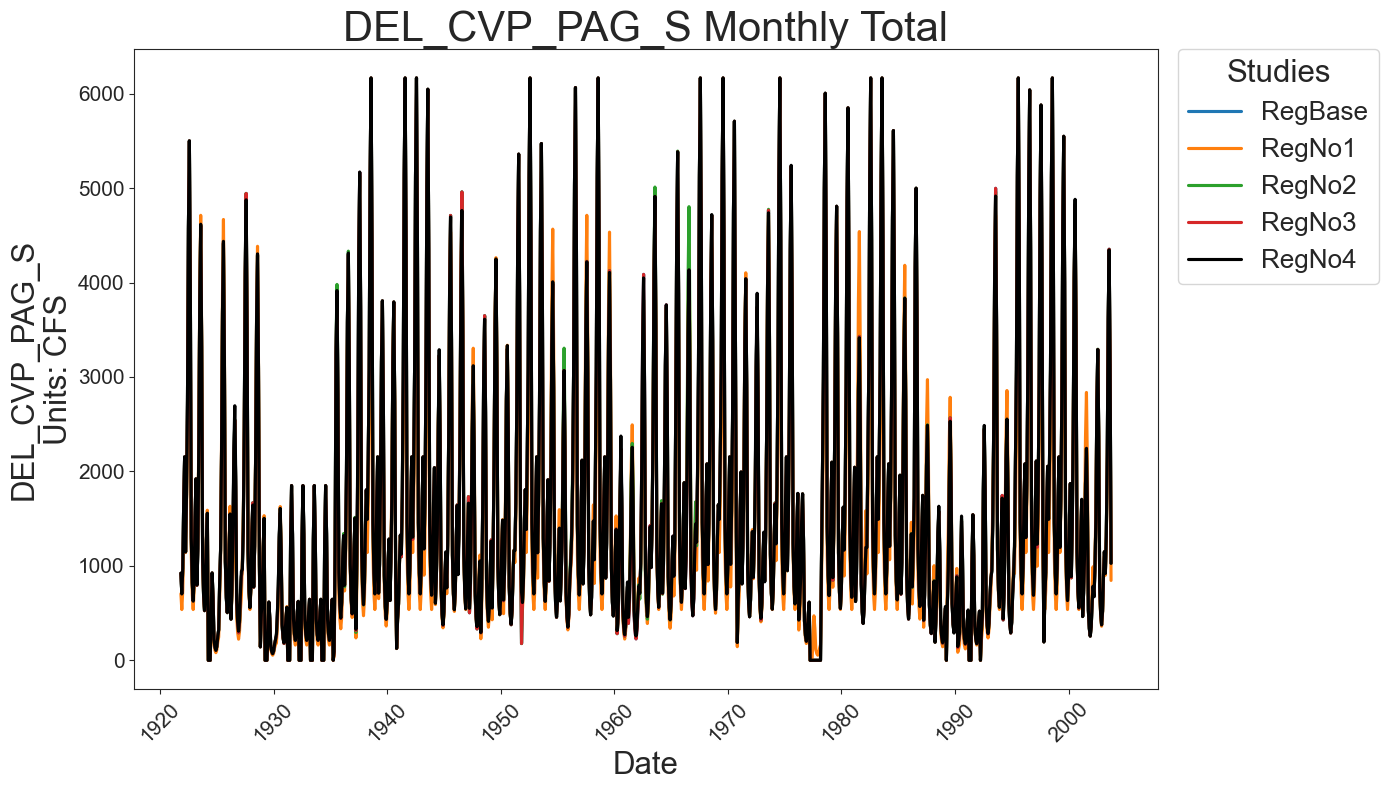

In [64]:
plot_ts(filter_df, pTitle = 'Monthly Total', fTitle = 'Month_Tot', fPath = fPath)

### Yearly totals

In [65]:
filter_df

A                        CALLITE                                            \
B          DEL_CVP_PAG_S_RegBase DEL_CVP_PAG_S_RegNo1 DEL_CVP_PAG_S_RegNo2   
C                   DELIVERY-CVP         DELIVERY-CVP         DELIVERY-CVP   
D                           1MON                 1MON                 1MON   
E                       2020D09E             2020D09E             2020D09E   
F                       PER-AVER             PER-AVER             PER-AVER   
Units                        CFS                  CFS                  CFS   
1921-10-31            922.124268           704.580017           922.124268   
1921-11-30            703.339600           537.410278           703.339600   
1921-12-31            973.176086           743.587891           973.176086   
1922-01-31           1708.295288          1305.280396          1708.295288   
1922-02-28           2154.230957          1646.012451          2154.230957   
..                           ...                  ...                  ...   
2003-05-31           2168.948975          1932.388306          2167.814697   
2003-06-30           3619.733643          3224.940674          3617.840576   
2003-07-31           4353.206055          3878.415527          4350.929688   
2003-08-31           3136.769043          2794.651367          3135.128662   
2003-09-30           1028.869751           845.899719          1028.331665   

A                                                     
B          DEL_CVP_PAG_S_RegNo3 DEL_CVP_PAG_S_RegNo4  
C                  DELIVERY-CVP         DELIVERY-CVP  
D                          1MON                 1MON  
E                      2020D09E             2020D09E  
F                      PER-AVER             PER-AVER  
Units                       CFS                  CFS  
1921-10-31           922.124268           922.124268  
1921-11-30           703.339600           703.339600  
1921-12-31           973.176086           973.176086  
1922-01-31          1708.295288          1708.295288  
1922-02-28          2154.230957          2154.230957  
..                          ...                  ...  
2003-05-31          2168.948975          2165.465576  
2003-06-30          3619.733643          3613.920410  
2003-07-31          4353.206055          4346.214844  
2003-08-31          3136.769043          3131.731445  
2003-09-30          1028.869751          1027.217407  

[984 rows x 5 columns]

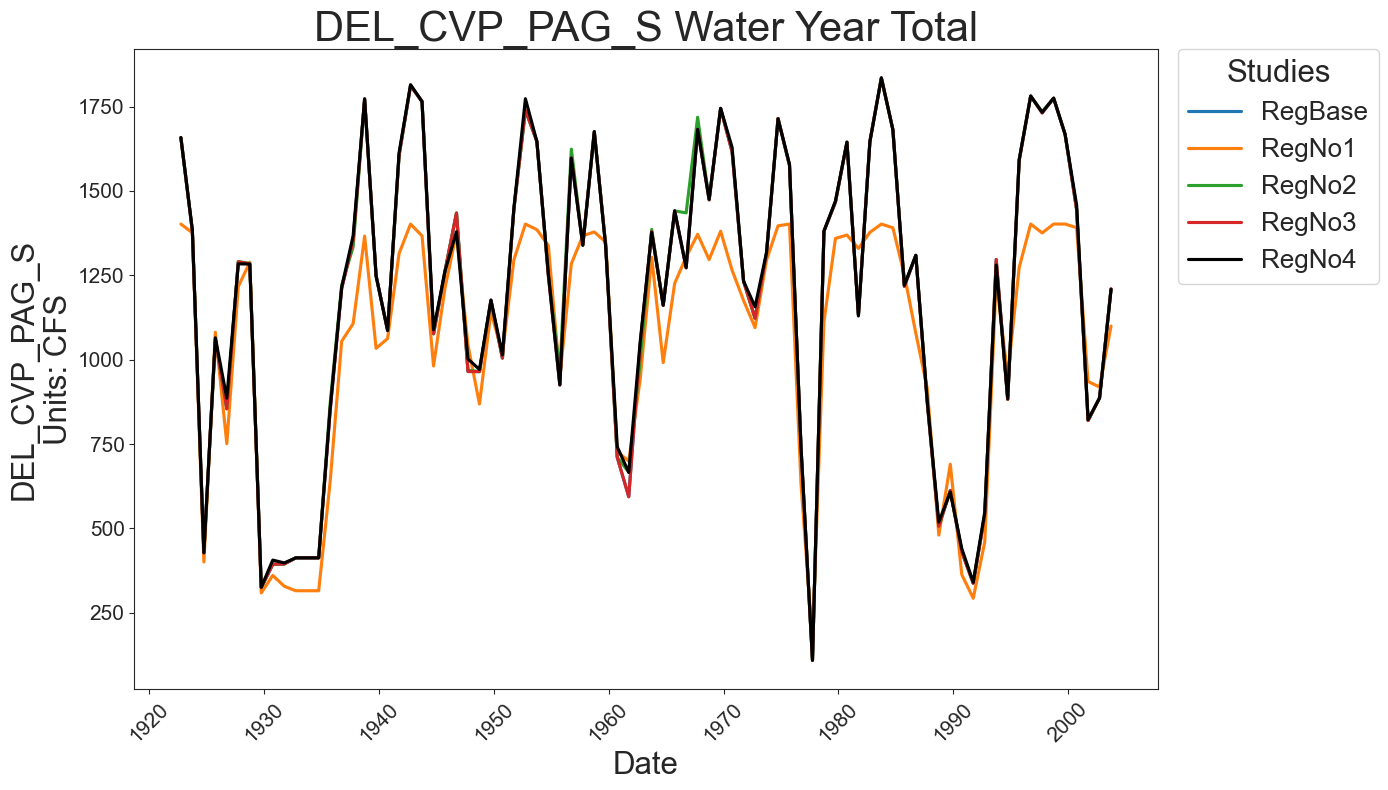

A                        CALLITE                                            \
B          DEL_CVP_PAG_S_RegBase DEL_CVP_PAG_S_RegNo1 DEL_CVP_PAG_S_RegNo2   
C                   DELIVERY-CVP         DELIVERY-CVP         DELIVERY-CVP   
E                           1MON                 1MON                 1MON   
F                       2020D09E             2020D09E             2020D09E   
Type                    PER-AVER             PER-AVER             PER-AVER   
Units                        TAF                  TAF                  TAF   
                         CALLITE              CALLITE              CALLITE   
           DEL_CVP_PAG_S_RegBase DEL_CVP_PAG_S_RegNo1 DEL_CVP_PAG_S_RegNo2   
                    DELIVERY-CVP         DELIVERY-CVP         DELIVERY-CVP   
                            1MON                 1MON                 1MON   
                        2020D09E             2020D09E             2020D09E   
                        PER-AVER             PER-AVER             PER-AVER   
                             TAF                  TAF                  TAF   
1922-09-30           1658.000649          1401.968072          1658.002330   
1923-09-30           1381.048553          1376.191807          1381.056693   
1924-09-30            427.250902           400.724524           427.253062   
1925-09-30           1061.311792          1081.372637          1059.083047   
1926-09-30            854.558581           751.135782           855.462578   
...                          ...                  ...                  ...   
1999-09-30           1667.697154          1401.968072          1667.697154   
2000-09-30           1445.495935          1391.307232          1445.754121   
2001-09-30            819.755651           935.613905           819.878471   
2002-09-30            886.835290           918.859700           887.474058   
2003-09-30           1209.884814          1099.814230          1209.513792   

A                                                     
B          DEL_CVP_PAG_S_RegNo3 DEL_CVP_PAG_S_RegNo4  
C                  DELIVERY-CVP         DELIVERY-CVP  
E                          1MON                 1MON  
F                      2020D09E             2020D09E  
Type                   PER-AVER             PER-AVER  
Units                       TAF                  TAF  
                        CALLITE              CALLITE  
           DEL_CVP_PAG_S_RegNo3 DEL_CVP_PAG_S_RegNo4  
                   DELIVERY-CVP         DELIVERY-CVP  
                           1MON                 1MON  
                       2020D09E             2020D09E  
                       PER-AVER             PER-AVER  
                            TAF                  TAF  
1922-09-30          1658.000649          1657.974761  
1923-09-30          1381.048553          1384.726252  
1924-09-30           427.250902           428.224117  
1925-09-30          1061.311792          1065.057879  
1926-09-30           854.558581           886.123831  
...                         ...                  ...  
1999-09-30          1667.697154          1667.697154  
2000-09-30          1445.495935          1458.320337  
2001-09-30           819.755651           822.504215  
2002-09-30           886.835290           886.549202  
2003-09-30          1209.884814          1208.197417  

[82 rows x 5 columns]

In [66]:
# plot_annual_totals(filter_df, pTitle = 'Water Year Total', fTitle = 'WY_Tot', fPath = fPath)
filter_df_ann = plot_annual_totals(filter_df, pTitle = 'Water Year Total', fTitle = 'WY_Tot', fPath = fPath)
filter_df_ann

In [67]:
# make a copy to play around
thisdata = filter_df.copy()
thisdata

A                        CALLITE                                            \
B          DEL_CVP_PAG_S_RegBase DEL_CVP_PAG_S_RegNo1 DEL_CVP_PAG_S_RegNo2   
C                   DELIVERY-CVP         DELIVERY-CVP         DELIVERY-CVP   
D                           1MON                 1MON                 1MON   
E                       2020D09E             2020D09E             2020D09E   
F                       PER-AVER             PER-AVER             PER-AVER   
Units                        CFS                  CFS                  CFS   
1921-10-31            922.124268           704.580017           922.124268   
1921-11-30            703.339600           537.410278           703.339600   
1921-12-31            973.176086           743.587891           973.176086   
1922-01-31           1708.295288          1305.280396          1708.295288   
1922-02-28           2154.230957          1646.012451          2154.230957   
..                           ...                  ...                  ...   
2003-05-31           2168.948975          1932.388306          2167.814697   
2003-06-30           3619.733643          3224.940674          3617.840576   
2003-07-31           4353.206055          3878.415527          4350.929688   
2003-08-31           3136.769043          2794.651367          3135.128662   
2003-09-30           1028.869751           845.899719          1028.331665   

A                                                     
B          DEL_CVP_PAG_S_RegNo3 DEL_CVP_PAG_S_RegNo4  
C                  DELIVERY-CVP         DELIVERY-CVP  
D                          1MON                 1MON  
E                      2020D09E             2020D09E  
F                      PER-AVER             PER-AVER  
Units                       CFS                  CFS  
1921-10-31           922.124268           922.124268  
1921-11-30           703.339600           703.339600  
1921-12-31           973.176086           973.176086  
1922-01-31          1708.295288          1708.295288  
1922-02-28          2154.230957          2154.230957  
..                          ...                  ...  
2003-05-31          2168.948975          2165.465576  
2003-06-30          3619.733643          3613.920410  
2003-07-31          4353.206055          4346.214844  
2003-08-31          3136.769043          3131.731445  
2003-09-30          1028.869751          1027.217407  

[984 rows x 5 columns]

## Get End of Water Year and end of winter


In [68]:
# if you want data for just specific months, you can do that with something like the following:
thisdata_sep = thisdata[thisdata.index.month.isin([9])]  # picks only values that are in month=9 (September)
thisdata_sep

A                        CALLITE                                            \
B          DEL_CVP_PAG_S_RegBase DEL_CVP_PAG_S_RegNo1 DEL_CVP_PAG_S_RegNo2   
C                   DELIVERY-CVP         DELIVERY-CVP         DELIVERY-CVP   
D                           1MON                 1MON                 1MON   
E                       2020D09E             2020D09E             2020D09E   
F                       PER-AVER             PER-AVER             PER-AVER   
Units                        CFS                  CFS                  CFS   
1922-09-30           1300.034546          1113.663574          1300.034546   
1923-09-30           1087.683228          1113.663574          1087.691406   
1924-09-30            218.627319           167.049545           218.627319   
1925-09-30           1044.788086          1103.282593          1042.546143   
1926-09-30            600.621155           462.993896           602.311340   
..                           ...                  ...                  ...   
1999-09-30           1311.465088          1113.663574          1311.465088   
2000-09-30           1140.645386          1113.663574          1140.907837   
2001-09-30            530.606750           670.311035           530.681458   
2002-09-30            777.946472           747.878418           778.569946   
2003-09-30           1028.869751           845.899719          1028.331665   

A                                                     
B          DEL_CVP_PAG_S_RegNo3 DEL_CVP_PAG_S_RegNo4  
C                  DELIVERY-CVP         DELIVERY-CVP  
D                          1MON                 1MON  
E                      2020D09E             2020D09E  
F                      PER-AVER             PER-AVER  
Units                       CFS                  CFS  
1922-09-30          1300.034546          1300.034546  
1923-09-30          1087.683228          1091.386230  
1924-09-30           218.627319           218.627319  
1925-09-30          1044.788086          1048.556274  
1926-09-30           600.621155           637.036987  
..                          ...                  ...  
1999-09-30          1311.465088          1311.465088  
2000-09-30          1140.645386          1153.680786  
2001-09-30           530.606750           530.161255  
2002-09-30           777.946472           777.776245  
2003-09-30          1028.869751          1027.217407  

[82 rows x 5 columns]

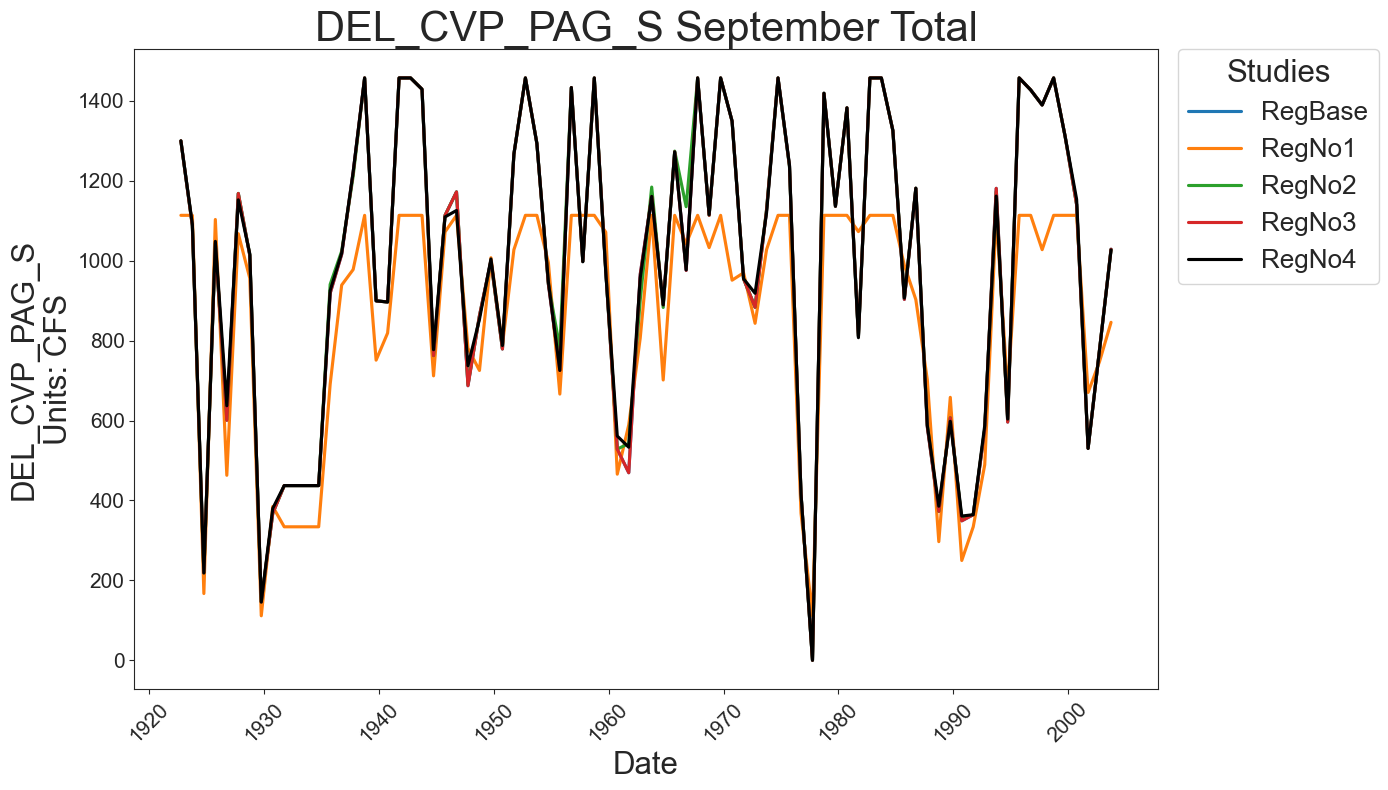

In [69]:
plot_ts(thisdata_sep, pTitle = 'September Total', fTitle = 'Sep_Tot', fPath = fPath)

In [70]:
# if you want data for just specific months, you can do that with something like the following:
thisdata_apr = thisdata[thisdata.index.month.isin([4])]  # picks only values that are in month=9 (September)
thisdata_apr

A                        CALLITE                                            \
B          DEL_CVP_PAG_S_RegBase DEL_CVP_PAG_S_RegNo1 DEL_CVP_PAG_S_RegNo2   
C                   DELIVERY-CVP         DELIVERY-CVP         DELIVERY-CVP   
D                           1MON                 1MON                 1MON   
E                       2020D09E             2020D09E             2020D09E   
F                       PER-AVER             PER-AVER             PER-AVER   
Units                        CFS                  CFS                  CFS   
1922-04-30           1753.950562          1627.832153          1753.950562   
1923-04-30           1181.612305          1376.598755          1181.624146   
1924-04-30              0.000000             0.000000             0.000000   
1925-04-30           1168.317749          1064.889404          1165.083008   
1926-04-30            755.393982           676.754089           756.011719   
..                           ...                  ...                  ...   
1999-04-30           1705.800415          1627.832153          1705.800415   
2000-04-30           1378.650513          1568.061035          1379.002808   
2001-04-30            713.620667           754.854126           713.529175   
2002-04-30            961.163391          1071.310303           962.056091   
2003-04-30           1314.904053          1285.532837          1314.127686   

A                                                     
B          DEL_CVP_PAG_S_RegNo3 DEL_CVP_PAG_S_RegNo4  
C                  DELIVERY-CVP         DELIVERY-CVP  
D                          1MON                 1MON  
E                      2020D09E             2020D09E  
F                      PER-AVER             PER-AVER  
Units                       CFS                  CFS  
1922-04-30          1753.950562          1753.950562  
1923-04-30          1181.612305          1186.953857  
1924-04-30             0.000000             0.000000  
1925-04-30          1168.317749          1173.754761  
1926-04-30           755.393982           753.087830  
..                          ...                  ...  
1999-04-30          1705.800415          1705.800415  
2000-04-30          1378.650513          1396.147461  
2001-04-30           713.620667           710.685364  
2002-04-30           961.163391           960.919739  
2003-04-30          1314.904053          1312.519775  

[82 rows x 5 columns]

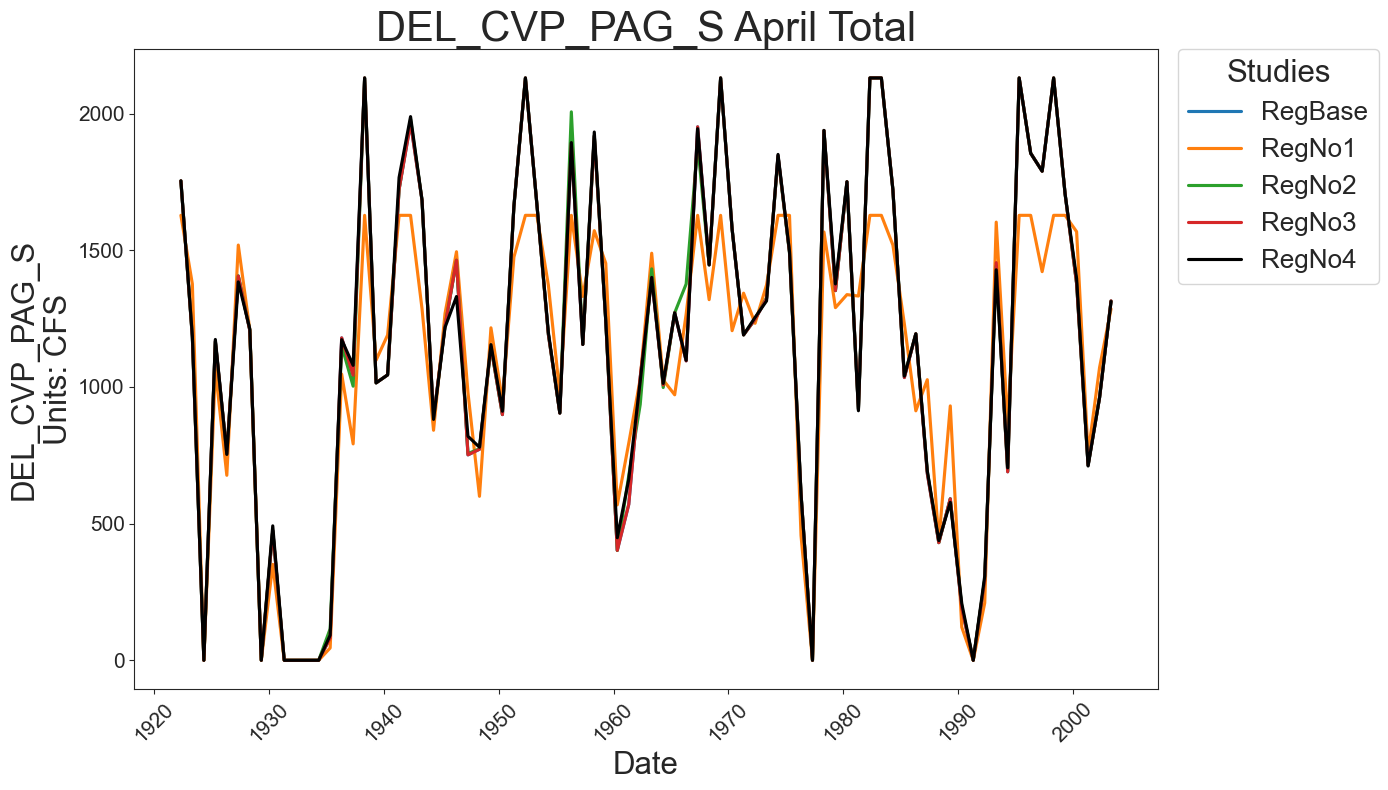

In [71]:
plot_ts(thisdata_apr, pTitle = 'April Total', fTitle = 'Apr_Tot', fPath = fPath)

## Get Summer Season

In [72]:
# if we want to pick several months and calculate the total volume, we could extend the month list in the filtering step
# NOTE: a functions that adds up the selected months?

thisdata_summer = thisdata[thisdata.index.month.isin([6,7,8])]  # picks values that are in Jun, Jul, Aug (months 6,7,8)
thisdata_summer

A                        CALLITE                                            \
B          DEL_CVP_PAG_S_RegBase DEL_CVP_PAG_S_RegNo1 DEL_CVP_PAG_S_RegNo2   
C                   DELIVERY-CVP         DELIVERY-CVP         DELIVERY-CVP   
D                           1MON                 1MON                 1MON   
E                       2020D09E             2020D09E             2020D09E   
F                       PER-AVER             PER-AVER             PER-AVER   
Units                        CFS                  CFS                  CFS   
1922-06-30           4573.736328          3918.052490          4573.736328   
1922-07-31           5500.519531          4711.973633          5500.519531   
1922-08-31           3963.483154          3395.284424          3963.483154   
1923-06-30           3826.649170          3918.052490          3826.677979   
1923-07-31           4602.049316          4711.973633          4602.083984   
..                           ...                  ...                  ...   
2002-07-31           3291.535400          3164.315918          3294.173584   
2002-08-31           2371.766113          2280.095947          2373.666992   
2003-06-30           3619.733643          3224.940674          3617.840576   
2003-07-31           4353.206055          3878.415527          4350.929688   
2003-08-31           3136.769043          2794.651367          3135.128662   

A                                                     
B          DEL_CVP_PAG_S_RegNo3 DEL_CVP_PAG_S_RegNo4  
C                  DELIVERY-CVP         DELIVERY-CVP  
D                          1MON                 1MON  
E                      2020D09E             2020D09E  
F                      PER-AVER             PER-AVER  
Units                       CFS                  CFS  
1922-06-30          4573.736328          4573.736328  
1922-07-31          5500.519531          5500.519531  
1922-08-31          3963.483154          3963.483154  
1923-06-30          3826.649170          3839.676758  
1923-07-31          4602.049316          4617.716309  
..                          ...                  ...  
2002-07-31          3291.535400          3290.815430  
2002-08-31          2371.766113          2371.247070  
2003-06-30          3619.733643          3613.920410  
2003-07-31          4353.206055          4346.214844  
2003-08-31          3136.769043          3131.731445  

[246 rows x 5 columns]

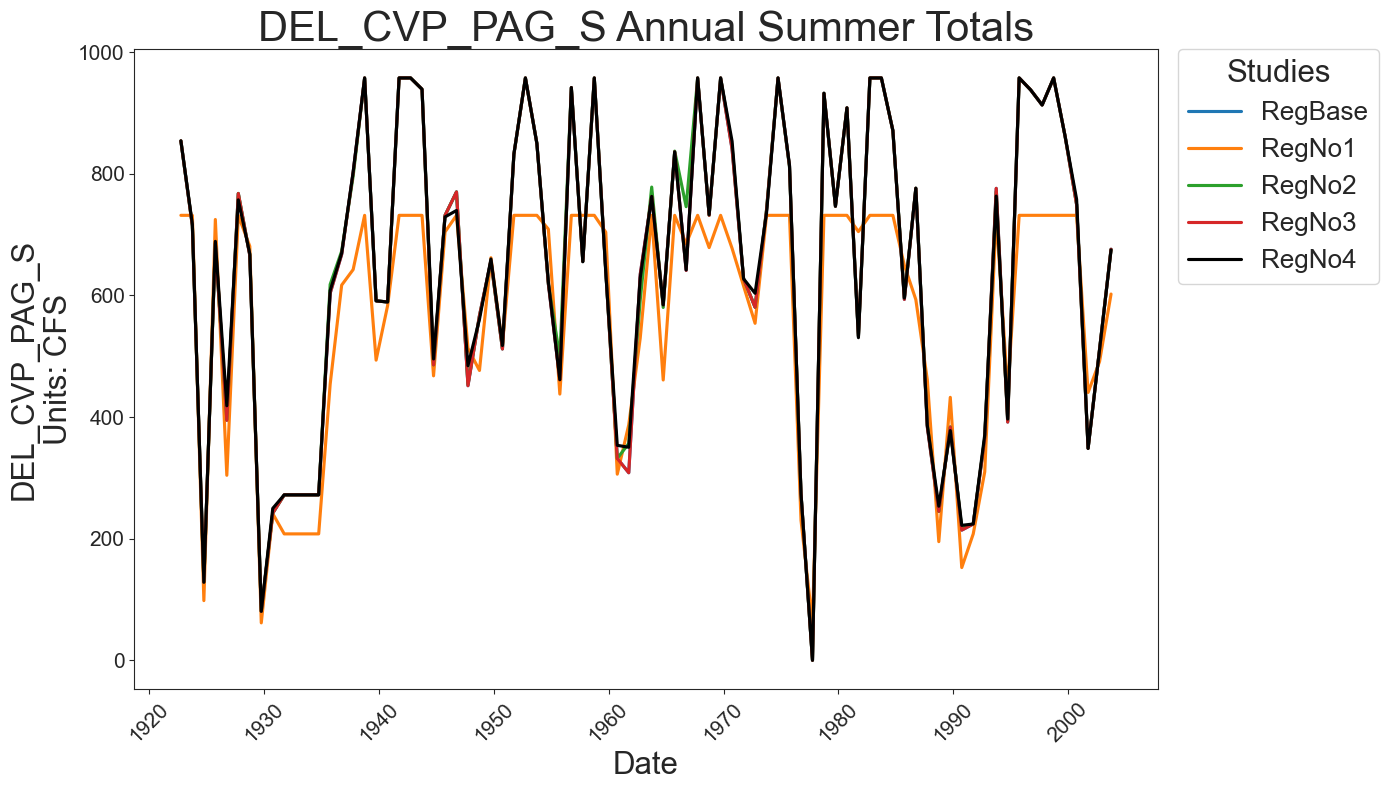

A                        CALLITE                                            \
B          DEL_CVP_PAG_S_RegBase DEL_CVP_PAG_S_RegNo1 DEL_CVP_PAG_S_RegNo2   
C                   DELIVERY-CVP         DELIVERY-CVP         DELIVERY-CVP   
E                           1MON                 1MON                 1MON   
F                       2020D09E             2020D09E             2020D09E   
Type                    PER-AVER             PER-AVER             PER-AVER   
Units                        TAF                  TAF                  TAF   
                         CALLITE              CALLITE              CALLITE   
           DEL_CVP_PAG_S_RegBase DEL_CVP_PAG_S_RegNo1 DEL_CVP_PAG_S_RegNo2   
                    DELIVERY-CVP         DELIVERY-CVP         DELIVERY-CVP   
                            1MON                 1MON                 1MON   
                        2020D09E             2020D09E             2020D09E   
                        PER-AVER             PER-AVER             PER-AVER   
                             TAF                  TAF                  TAF   
1922-09-30            854.075054           731.636181           854.075054   
1923-09-30            714.568042           731.636181           714.573419   
1924-09-30            128.373928            98.088409           128.373928   
1925-09-30            686.387459           724.816215           684.914611   
1926-09-30            394.586106           304.170024           395.696446   
...                          ...                  ...                  ...   
1999-09-30            861.584491           731.636181           861.584491   
2000-09-30            749.362226           731.636181           749.534635   
2001-09-30            348.589181           440.369798           348.638266   
2002-09-30            511.082320           491.328710           511.491945   
2003-09-30            675.929727           602.208186           675.576250   

A                                                     
B          DEL_CVP_PAG_S_RegNo3 DEL_CVP_PAG_S_RegNo4  
C                  DELIVERY-CVP         DELIVERY-CVP  
E                          1MON                 1MON  
F                      2020D09E             2020D09E  
Type                   PER-AVER             PER-AVER  
Units                       TAF                  TAF  
                        CALLITE              CALLITE  
           DEL_CVP_PAG_S_RegNo3 DEL_CVP_PAG_S_RegNo4  
                   DELIVERY-CVP         DELIVERY-CVP  
                           1MON                 1MON  
                       2020D09E             2020D09E  
                       PER-AVER             PER-AVER  
                            TAF                  TAF  
1922-09-30           854.075054           854.075054  
1923-09-30           714.568042           717.000701  
1924-09-30           128.373928           128.373928  
1925-09-30           686.387459           688.863060  
1926-09-30           394.586106           418.509942  
...                         ...                  ...  
1999-09-30           861.584491           861.584491  
2000-09-30           749.362226           757.926018  
2001-09-30           348.589181           348.296508  
2002-09-30           511.082320           510.970500  
2003-09-30           675.929727           674.844193  

[82 rows x 5 columns]

In [73]:
plot_annual_totals(thisdata_summer, pTitle = 'Annual Summer Totals', fTitle = 'Ann_Summ_Tot', pSave = False, fPath = fPath)

## Exceedance Calculation

The function single_exceed returns a dataframe with an index of the exceedance probability, and a single column of the corresponding values. This can then be plotted directly. The single_exceed function will only calculate one set of exceedance-value pairs at a time from the input dataframe (the first argument to the function).If you have multiple columns, you'll need to specify which column name to use as the second argument to the function.


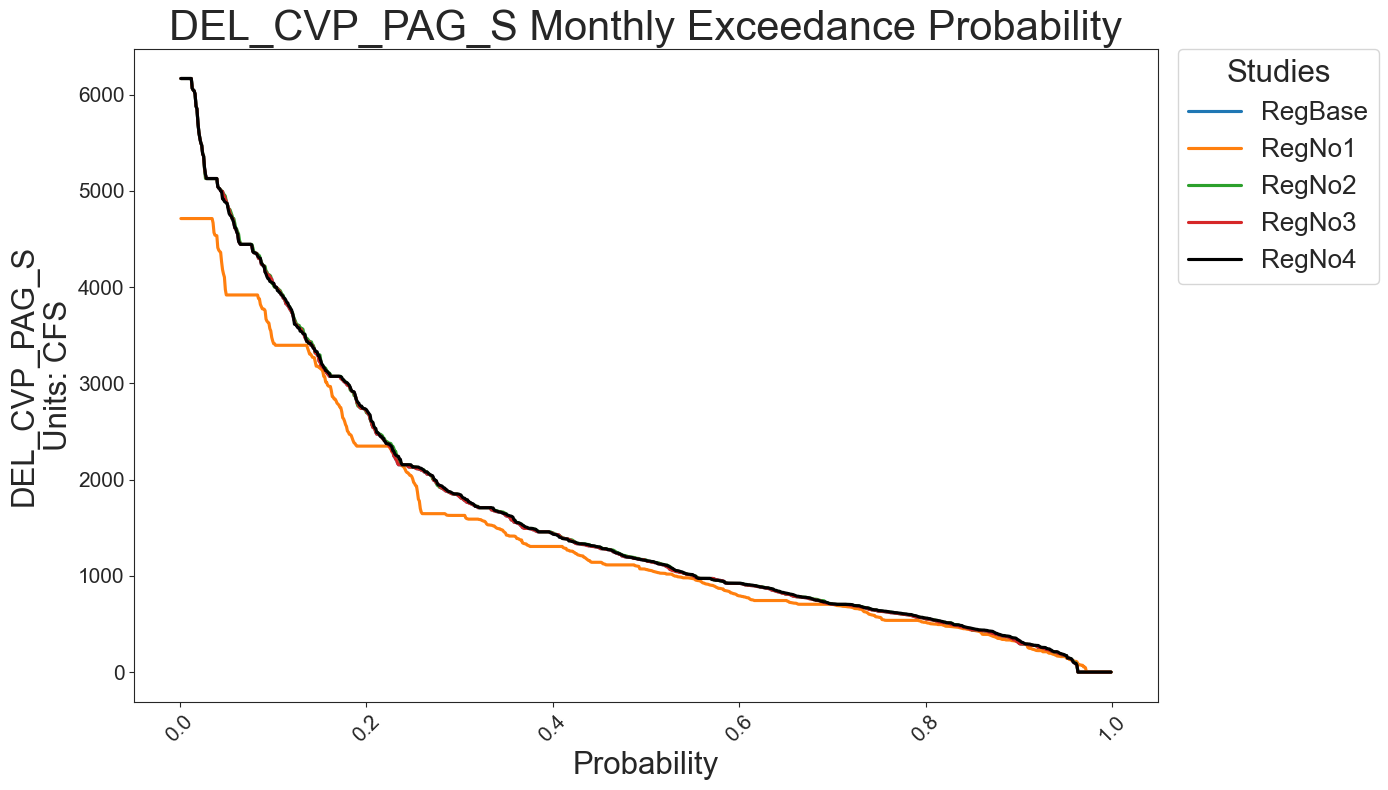

In [74]:
plot_exceedance(filter_df, xLab = 'Probability', pTitle = 'Monthly Exceedance Probability', fTitle = 'Mon_exceed', fPath = fPath)

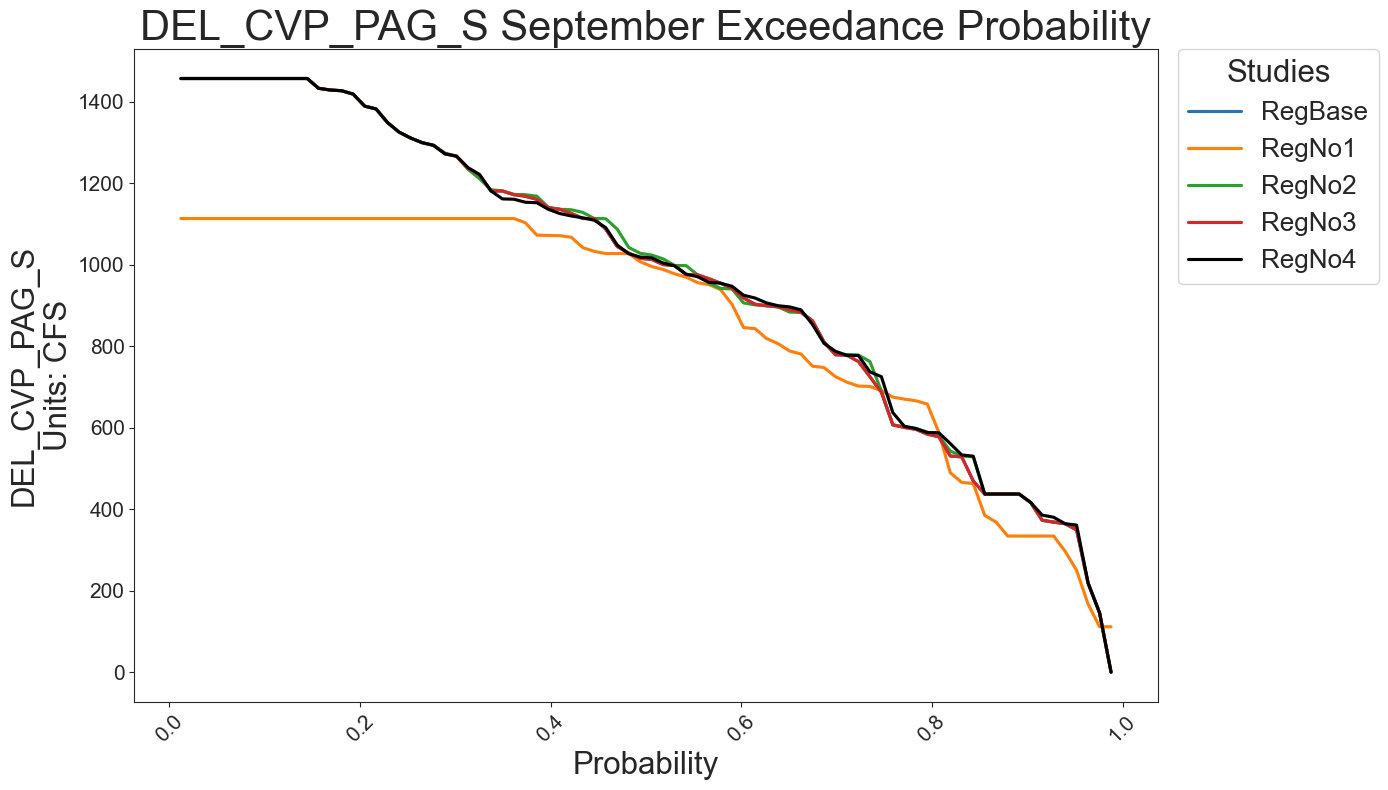

In [75]:
plot_exceedance(thisdata_sep, xLab = 'Probability', pTitle = 'September Exceedance Probability', fTitle = 'sep_exceed', fPath = fPath)

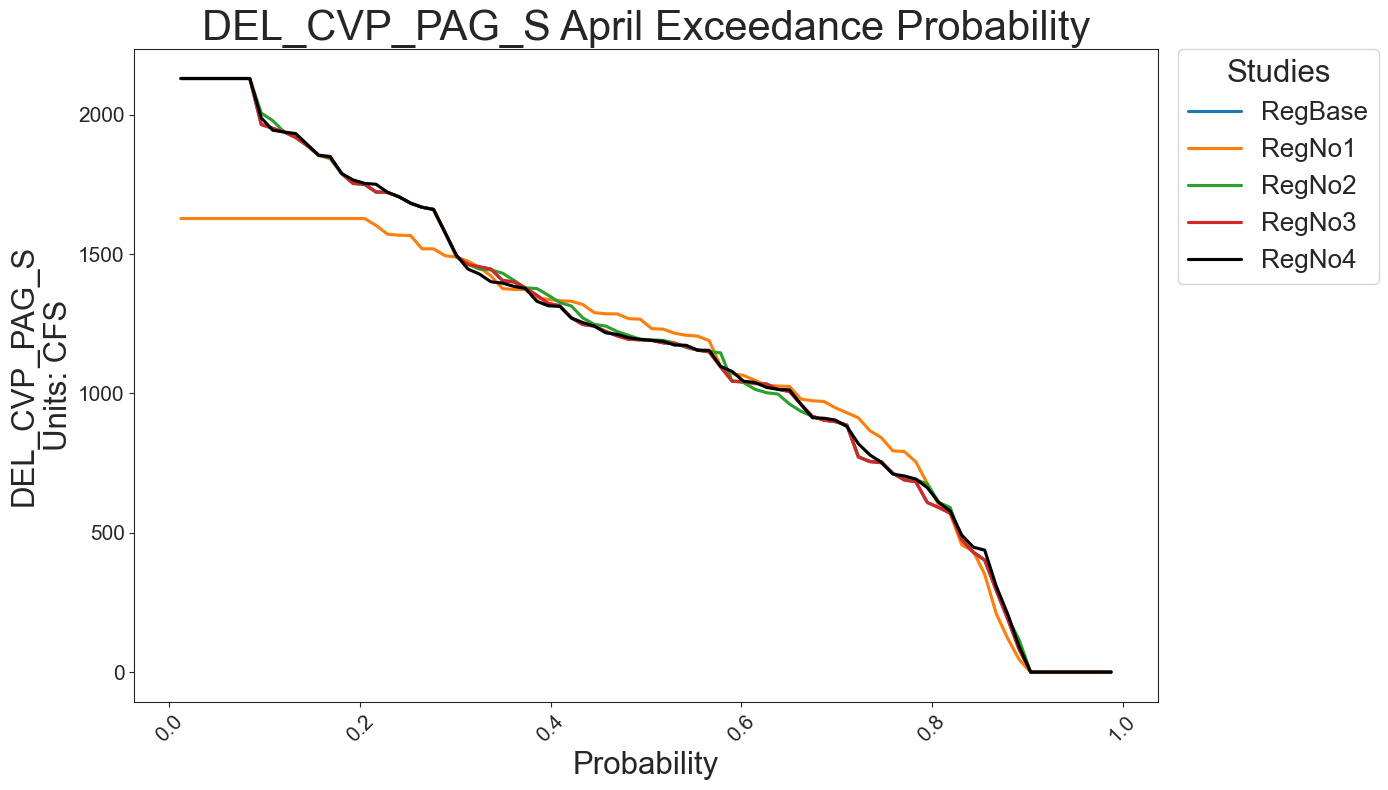

In [76]:
plot_exceedance(thisdata_apr, xLab = 'Probability', pTitle = 'April Exceedance Probability', fTitle = 'apr_exceed', fPath = fPath)

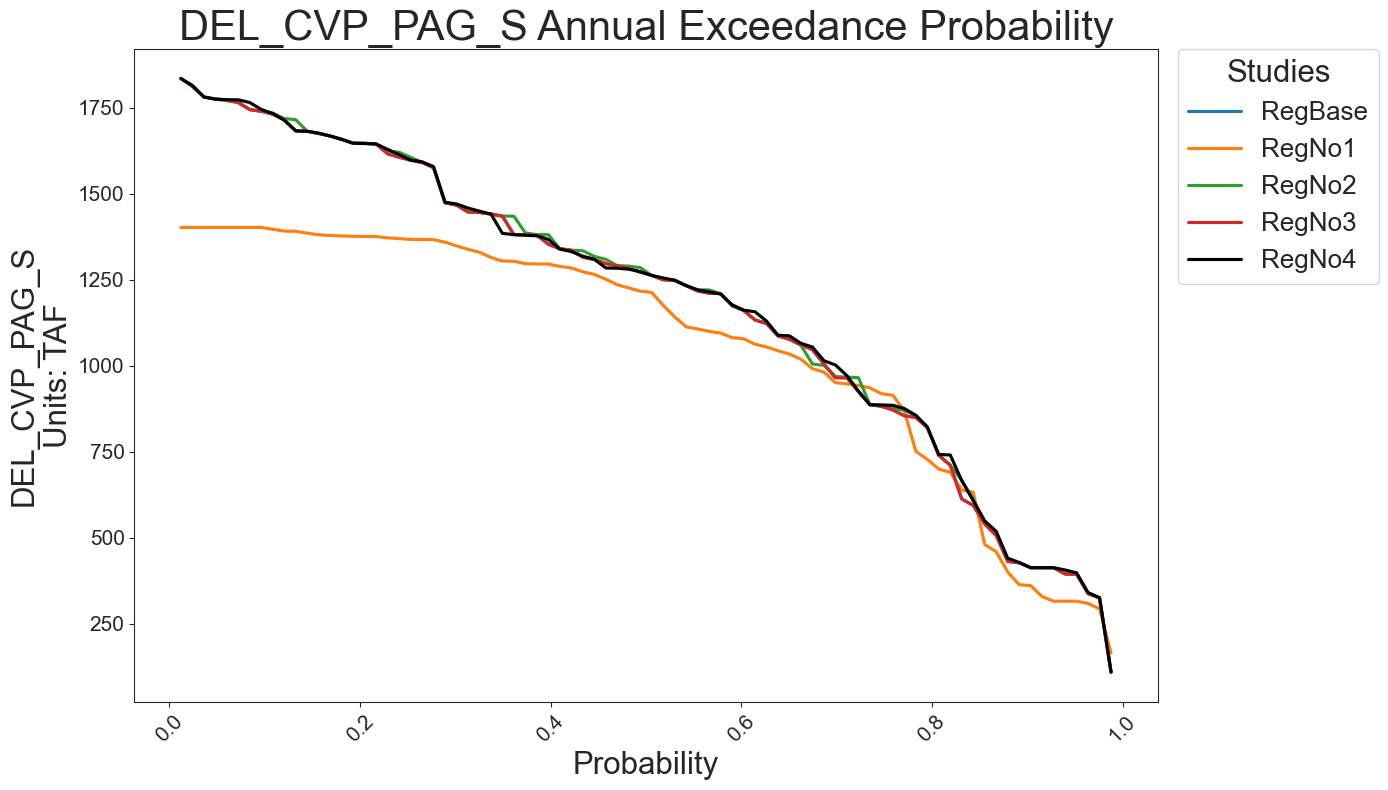

In [77]:
plot_exceedance(filter_df_ann, xLab = 'Probability', pTitle = 'Annual Exceedance Probability', fTitle = 'ann_exceed', fPath = fPath)

## Average by Month of Year

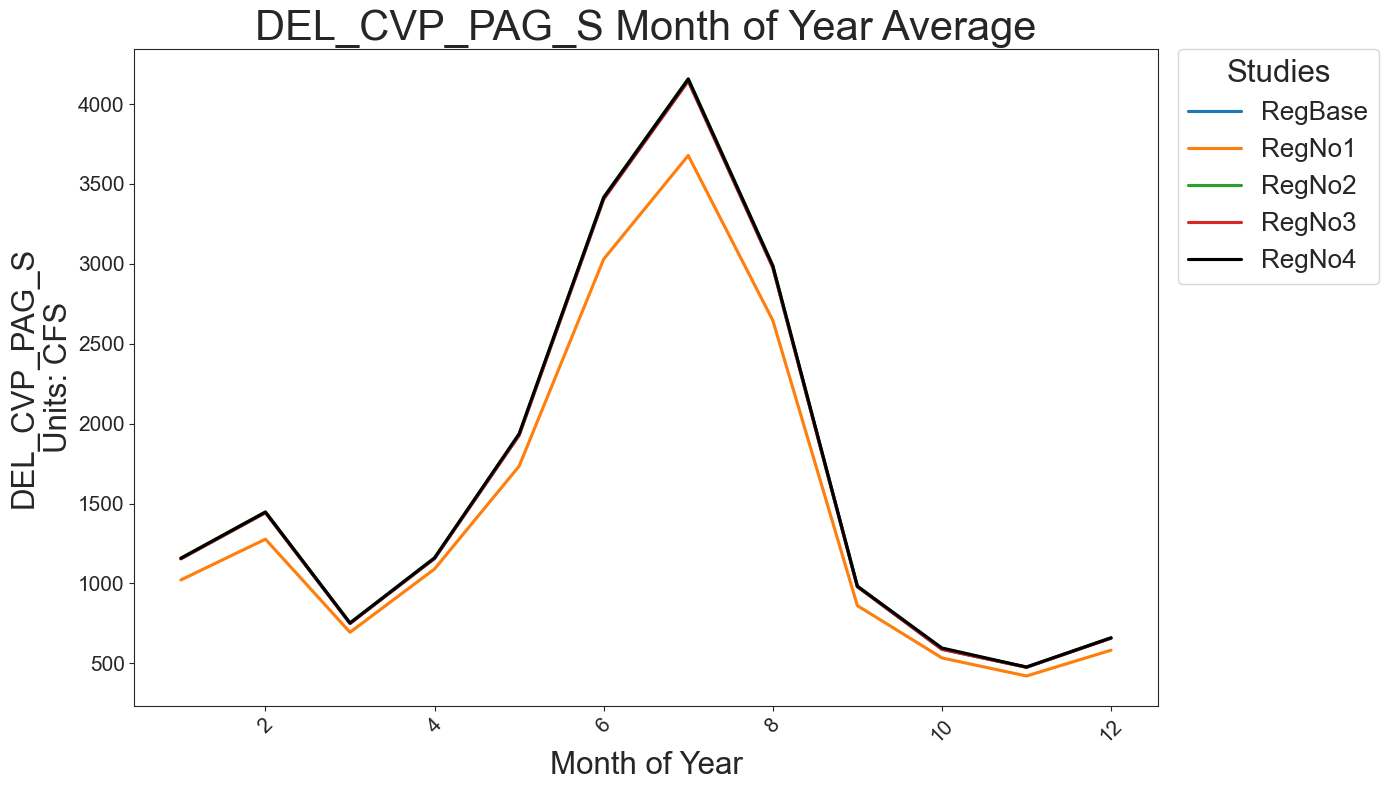

In [78]:
plot_moy_averages(filter_df, pTitle = 'Month of Year Average', fTitle = 'MoY_Avg', fPath = fPath)

## Yearly totals (not WY Total)

In [79]:
thisdata_yr = thisdata
thisdata_yr["Year"] = thisdata_yr.index.year
thisdata_yr


A                        CALLITE                                            \
B          DEL_CVP_PAG_S_RegBase DEL_CVP_PAG_S_RegNo1 DEL_CVP_PAG_S_RegNo2   
C                   DELIVERY-CVP         DELIVERY-CVP         DELIVERY-CVP   
D                           1MON                 1MON                 1MON   
E                       2020D09E             2020D09E             2020D09E   
F                       PER-AVER             PER-AVER             PER-AVER   
Units                        CFS                  CFS                  CFS   
1921-10-31            922.124268           704.580017           922.124268   
1921-11-30            703.339600           537.410278           703.339600   
1921-12-31            973.176086           743.587891           973.176086   
1922-01-31           1708.295288          1305.280396          1708.295288   
1922-02-28           2154.230957          1646.012451          2154.230957   
..                           ...                  ...                  ...   
2003-05-31           2168.948975          1932.388306          2167.814697   
2003-06-30           3619.733643          3224.940674          3617.840576   
2003-07-31           4353.206055          3878.415527          4350.929688   
2003-08-31           3136.769043          2794.651367          3135.128662   
2003-09-30           1028.869751           845.899719          1028.331665   

A                                                     Year  
B          DEL_CVP_PAG_S_RegNo3 DEL_CVP_PAG_S_RegNo4        
C                  DELIVERY-CVP         DELIVERY-CVP        
D                          1MON                 1MON        
E                      2020D09E             2020D09E        
F                      PER-AVER             PER-AVER        
Units                       CFS                  CFS        
1921-10-31           922.124268           922.124268  1921  
1921-11-30           703.339600           703.339600  1921  
1921-12-31           973.176086           973.176086  1921  
1922-01-31          1708.295288          1708.295288  1922  
1922-02-28          2154.230957          2154.230957  1922  
..                          ...                  ...   ...  
2003-05-31          2168.948975          2165.465576  2003  
2003-06-30          3619.733643          3613.920410  2003  
2003-07-31          4353.206055          4346.214844  2003  
2003-08-31          3136.769043          3131.731445  2003  
2003-09-30          1028.869751          1027.217407  2003  

[984 rows x 6 columns]

In [80]:
thisdata_yrtot = thisdata_yr.groupby('Year').sum()
thisdata_yrtot

A                   CALLITE                                            \
B     DEL_CVP_PAG_S_RegBase DEL_CVP_PAG_S_RegNo1 DEL_CVP_PAG_S_RegNo2   
C              DELIVERY-CVP         DELIVERY-CVP         DELIVERY-CVP   
D                      1MON                 1MON                 1MON   
E                  2020D09E             2020D09E             2020D09E   
F                  PER-AVER             PER-AVER             PER-AVER   
Units                   CFS                  CFS                  CFS   
Year                                                                    
1921            2598.639893          1985.578125          2598.639893   
1922           27161.236328         23192.275391         27161.263672   
1923           22484.824219         22764.960938         22484.972656   
1924            5539.774414          4967.313965          5539.795410   
1925           18958.201172         19477.718750         18917.525391   
..                      ...                  ...                  ...   
1999           27339.427734         23192.275391         27339.427734   
2000           23556.056641         22960.207031         23560.773438   
2001           12525.656250         14724.510742         12527.368164   
2002           15092.524414         15331.988281         15104.023438   
2003           18605.625000         16844.751953         18598.472656   

A                                                
B     DEL_CVP_PAG_S_RegNo3 DEL_CVP_PAG_S_RegNo4  
C             DELIVERY-CVP         DELIVERY-CVP  
D                     1MON                 1MON  
E                 2020D09E             2020D09E  
F                 PER-AVER             PER-AVER  
Units                  CFS                  CFS  
Year                                             
1921           2598.639893          2598.639893  
1922          27161.236328         27160.816406  
1923          22484.824219         22551.949219  
1924           5539.774414          5549.398438  
1925          18958.201172         19026.568359  
..                     ...                  ...  
1999          27339.427734         27339.427734  
2000          23556.056641         23790.330078  
2001          12525.656250         12548.229492  
2002          15092.524414         15088.259766  
2003          18605.625000         18578.140625  

[83 rows x 5 columns]

In [81]:
# # NEED TO PLOT THIS EXAMPLE WITH JUST ORIGINAL VAR NAME LIKE S_SHSTA (and units) ON Y AND LEGEND WITH ALIASES
# with sns.plotting_context('notebook', font_scale=1.2):
#     fig, ax = plt.subplots(1,1,figsize=(10,8))
#     ax.plot(thisdata_yrtot.index, thisdata_yrtot.values)
#     ax.set_ylabel(f'{thisdata_yrtot.columns[0][1]} ({thisdata_yrtot.columns[0][6]})')
#     ax.set_xlabel('Annual Total')
#     sns.despine()


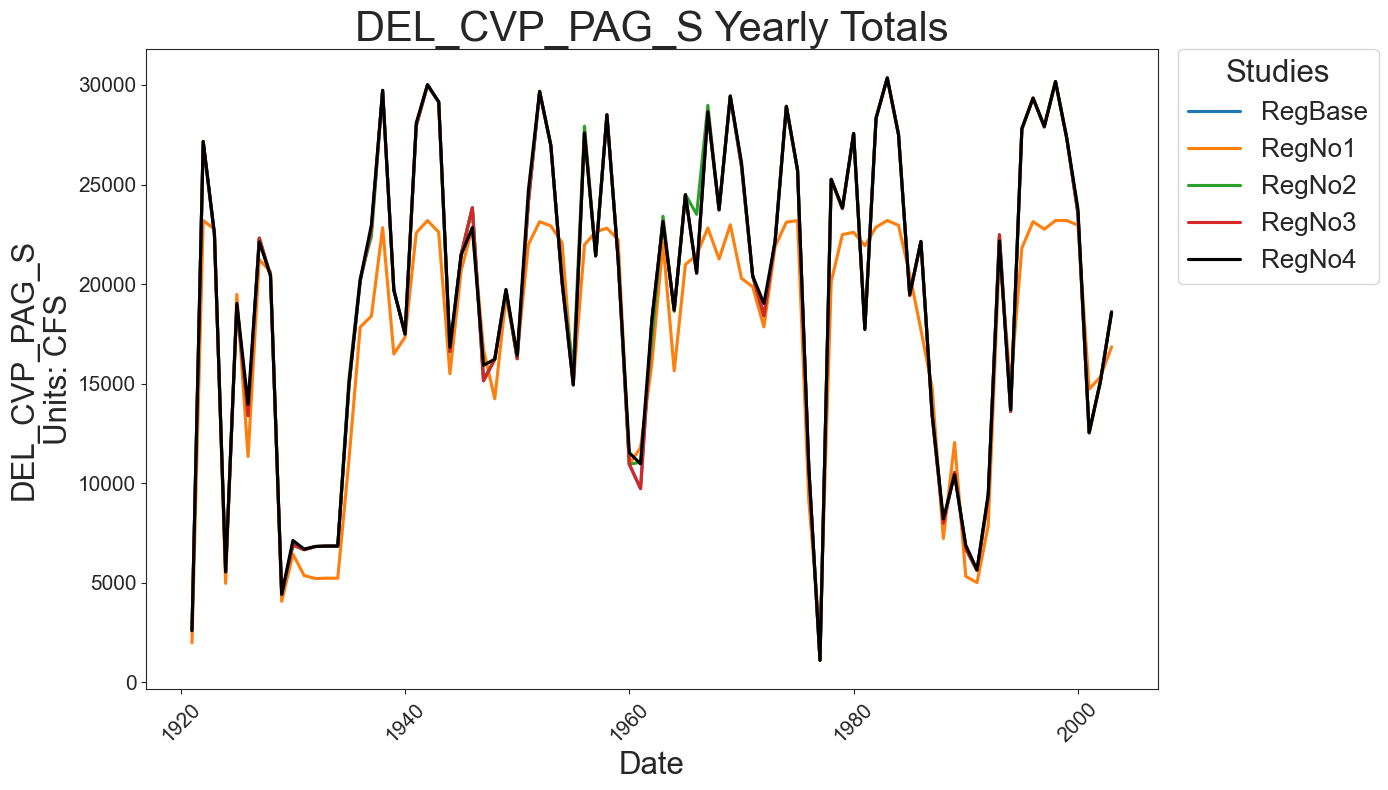

In [82]:
plot_ts(thisdata_yrtot, xLab = 'Date', pTitle = 'Yearly Totals', fTitle = 'Yr_Tot', fPath = fPath, pSave = False)

In [83]:
def get_DEL_SWP_PAG(df):
    df_concat = pnd.DataFrame()
    for i in alias:
        var = "DEL_SWP_PAG" + i
        filtered_columns = df.columns.get_level_values(1) == var
        filter_df = df.loc[:, filtered_columns]
        df_concat = pnd.concat([df_concat, filter_df], axis=1)
    return df_concat

In [84]:
filter_df = get_DEL_SWP_PAG(merged_df)
filter_df

Empty DataFrame
Columns: []
Index: [1921-10-31 00:00:00, 1921-11-30 00:00:00, 1921-12-31 00:00:00, 1922-01-31 00:00:00, 1922-02-28 00:00:00, 1922-03-31 00:00:00, 1922-04-30 00:00:00, 1922-05-31 00:00:00, 1922-06-30 00:00:00, 1922-07-31 00:00:00, 1922-08-31 00:00:00, 1922-09-30 00:00:00, 1922-10-31 00:00:00, 1922-11-30 00:00:00, 1922-12-31 00:00:00, 1923-01-31 00:00:00, 1923-02-28 00:00:00, 1923-03-31 00:00:00, 1923-04-30 00:00:00, 1923-05-31 00:00:00, 1923-06-30 00:00:00, 1923-07-31 00:00:00, 1923-08-31 00:00:00, 1923-09-30 00:00:00, 1923-10-31 00:00:00, 1923-11-30 00:00:00, 1923-12-31 00:00:00, 1924-01-31 00:00:00, 1924-02-29 00:00:00, 1924-03-31 00:00:00, 1924-04-30 00:00:00, 1924-05-31 00:00:00, 1924-06-30 00:00:00, 1924-07-31 00:00:00, 1924-08-31 00:00:00, 1924-09-30 00:00:00, 1924-10-31 00:00:00, 1924-11-30 00:00:00, 1924-12-31 00:00:00, 1925-01-31 00:00:00, 1925-02-28 00:00:00, 1925-03-31 00:00:00, 1925-04-30 00:00:00, 1925-05-31 00:00:00, 1925-06-30 00:00:00, 1925-07-31 00:00:00, 1925-08-31 00:00:00, 1925-09-30 00:00:00, 1925-10-31 00:00:00, 1925-11-30 00:00:00, 1925-12-31 00:00:00, 1926-01-31 00:00:00, 1926-02-28 00:00:00, 1926-03-31 00:00:00, 1926-04-30 00:00:00, 1926-05-31 00:00:00, 1926-06-30 00:00:00, 1926-07-31 00:00:00, 1926-08-31 00:00:00, 1926-09-30 00:00:00, 1926-10-31 00:00:00, 1926-11-30 00:00:00, 1926-12-31 00:00:00, 1927-01-31 00:00:00, 1927-02-28 00:00:00, 1927-03-31 00:00:00, 1927-04-30 00:00:00, 1927-05-31 00:00:00, 1927-06-30 00:00:00, 1927-07-31 00:00:00, 1927-08-31 00:00:00, 1927-09-30 00:00:00, 1927-10-31 00:00:00, 1927-11-30 00:00:00, 1927-12-31 00:00:00, 1928-01-31 00:00:00, 1928-02-29 00:00:00, 1928-03-31 00:00:00, 1928-04-30 00:00:00, 1928-05-31 00:00:00, 1928-06-30 00:00:00, 1928-07-31 00:00:00, 1928-08-31 00:00:00, 1928-09-30 00:00:00, 1928-10-31 00:00:00, 1928-11-30 00:00:00, 1928-12-31 00:00:00, 1929-01-31 00:00:00, 1929-02-28 00:00:00, 1929-03-31 00:00:00, 1929-04-30 00:00:00, 1929-05-31 00:00:00, 1929-06-30 00:00:00, 1929-07-31 00:00:00, 1929-08-31 00:00:00, 1929-09-30 00:00:00, 1929-10-31 00:00:00, 1929-11-30 00:00:00, 1929-12-31 00:00:00, 1930-01-31 00:00:00, ...]

[984 rows x 0 columns]

In [85]:
filter_df = create_subset(merged_df, "DEL_SWP_PAG")
filter_df

A                        CALLITE                                             \
B          DEL_SWP_PAG_N_RegBase DEL_SWP_PAG_S_RegBase DEL_SWP_PAG_N_RegNo1   
C                   DELIVERY-SWP          DELIVERY-SWP         DELIVERY-SWP   
D                           1MON                  1MON                 1MON   
E                       2020D09E              2020D09E             2020D09E   
F                       PER-AVER              PER-AVER             PER-AVER   
Units                        CFS                   CFS                  CFS   
1921-10-31           1770.275635            876.436829          1770.275635   
1921-11-30           1861.215332            603.655579          1861.215332   
1921-12-31           1066.068604            587.272827          1066.068604   
1922-01-31            542.060486             15.148243           542.060486   
1922-02-28              0.000000             31.168232             0.000000   
..                           ...                   ...                  ...   
2003-05-31           2132.299805            462.341644          2132.299805   
2003-06-30           2865.683350              0.000000          2865.683350   
2003-07-31           2666.716309           2288.603271          2666.716309   
2003-08-31           1919.248657           1690.035889          1919.248657   
2003-09-30           1781.725098            931.496643          1781.725098   

A                                                                          \
B          DEL_SWP_PAG_S_RegNo1 DEL_SWP_PAG_N_RegNo2 DEL_SWP_PAG_S_RegNo2   
C                  DELIVERY-SWP         DELIVERY-SWP         DELIVERY-SWP   
D                          1MON                 1MON                 1MON   
E                      2020D09E             2020D09E             2020D09E   
F                      PER-AVER             PER-AVER             PER-AVER   
Units                       CFS                  CFS                  CFS   
1921-10-31           876.436829          1770.275635           779.671021   
1921-11-30           603.655579          1861.215332           537.007019   
1921-12-31           587.272827          1066.068604           522.433105   
1922-01-31            15.148243           542.060486            17.456011   
1922-02-28            31.168232             0.000000            28.992676   
..                          ...                  ...                  ...   
2003-05-31           462.490082          2132.299805           425.665588   
2003-06-30             0.000000          2865.683350             0.000000   
2003-07-31          2289.281250          2666.716309          2116.759277   
2003-08-31          1690.543213          1919.248657          1674.128418   
2003-09-30           931.776733          1781.725098          1007.161316   

A                                                                          \
B          DEL_SWP_PAG_N_RegNo3 DEL_SWP_PAG_S_RegNo3 DEL_SWP_PAG_N_RegNo4   
C                  DELIVERY-SWP         DELIVERY-SWP         DELIVERY-SWP   
D                          1MON                 1MON                 1MON   
E                      2020D09E             2020D09E             2020D09E   
F                      PER-AVER             PER-AVER             PER-AVER   
Units                       CFS                  CFS                  CFS   
1921-10-31          1770.275635           876.436829          1770.275635   
1921-11-30          1861.215332           603.655579          1861.215332   
1921-12-31          1066.068604           587.272827          1066.068604   
1922-01-31           542.060486            15.148243           542.060486   
1922-02-28             0.000000            31.168232             0.000000   
..                          ...                  ...                  ...   
2003-05-31          2132.299805           462.341644          2132.299805   
2003-06-30          2865.683350             0.000000          2865.683350   
2003-07-31          2666.716309    

In [99]:
var = '_'.join(filter_df.columns[0][1].split('_')[:-1])

count = 0

plt.figure(figsize=(14, 8))

studies = [col[1].split('_')[-1] for col in filter_df.columns]

for study in studies:
    study_cols = [col for col in filter_df.columns if col[1].endswith(study)]
    #for col in study_cols:
print(studies)

['RegBase', 'RegBase', 'RegNo1', 'RegNo1', 'RegNo2', 'RegNo2', 'RegNo3', 'RegNo3', 'RegNo4', 'RegNo4']


<Figure size 1400x800 with 0 Axes>

### Difference From Baseline

In [94]:
def difference_from_baseline(df, base_alias):
    

SyntaxError: incomplete input (1821672485.py, line 1)

In [ ]:
def plot_difference_from_baseline(df, pTitle = 'Time Series', xLab = 'Date', lTitle = 'Studies', fTitle = 'mon_tot', pSave = True, fPath = './'):
    var = '_'.join(df.columns[0][1].split('_')[:-1])
    colormap = plt.cm.tab10
    colors = [colormap(i) for i in range(df.shape[1])]
#     colors[-1] = colors[0]
#     colors[0] = [0,0,0,1]
    colors[-1] = [0,0,0,1]

    count = 0
    
    plt.figure(figsize=(14, 8))
    
    default_font_size = plt.rcParams['font.size']
    scaled_font_size = 1.5 * default_font_size # Change it to font size you want
    default_line_width = plt.rcParams['lines.linewidth']  
    scaled_line_width = 1.5 * default_line_width
    
    studies = [col[1].split('_')[-1] for col in df.columns]

    for study in studies:
        study_cols = [col for col in df.columns if col[1].endswith(study)]
        for col in study_cols:
#             if count == 0:
#                 sns.lineplot(data=df, x=df.index, y=col, label=f'{study}', color = colors[count], linewidth=scaled_line_width*2)
#             else:
#                 sns.lineplot(data=df, x=df.index, y=col, label=f'{study}', color = colors[count], linewidth=scaled_line_width)
            sns.lineplot(data=df, x=df.index, y=col, label=f'{study}', color = colors[count], linewidth=scaled_line_width)
            count+=1
            
    plt.title(var + ' ' + pTitle, fontsize=scaled_font_size*2)
    plt.xlabel(xLab, fontsize=scaled_font_size*1.5)
    plt.ylabel(var+"\nUnits: " + df.columns[0][6], fontsize=scaled_font_size*1.5)
#     plt.legend(title=lTitle, fontsize=scaled_font_size)
    plt.legend(title=lTitle, title_fontsize = scaled_font_size*1.5, fontsize=scaled_font_size*1.25, bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.xticks(rotation=45, fontsize=scaled_font_size)  
    plt.yticks(fontsize=scaled_font_size)  
    plt.tight_layout()  
     
    if pSave:
        plt.savefig(fPath+var+'_'+fTitle+'.png', format = 'png', bbox_inches='tight', dpi=600, transparent=False)
        
    plt.show()
    

### Looping Through All Variables to Create Plots

In [92]:
#Change var_list however you want here
var_list.remove("C_RedBlf")

68

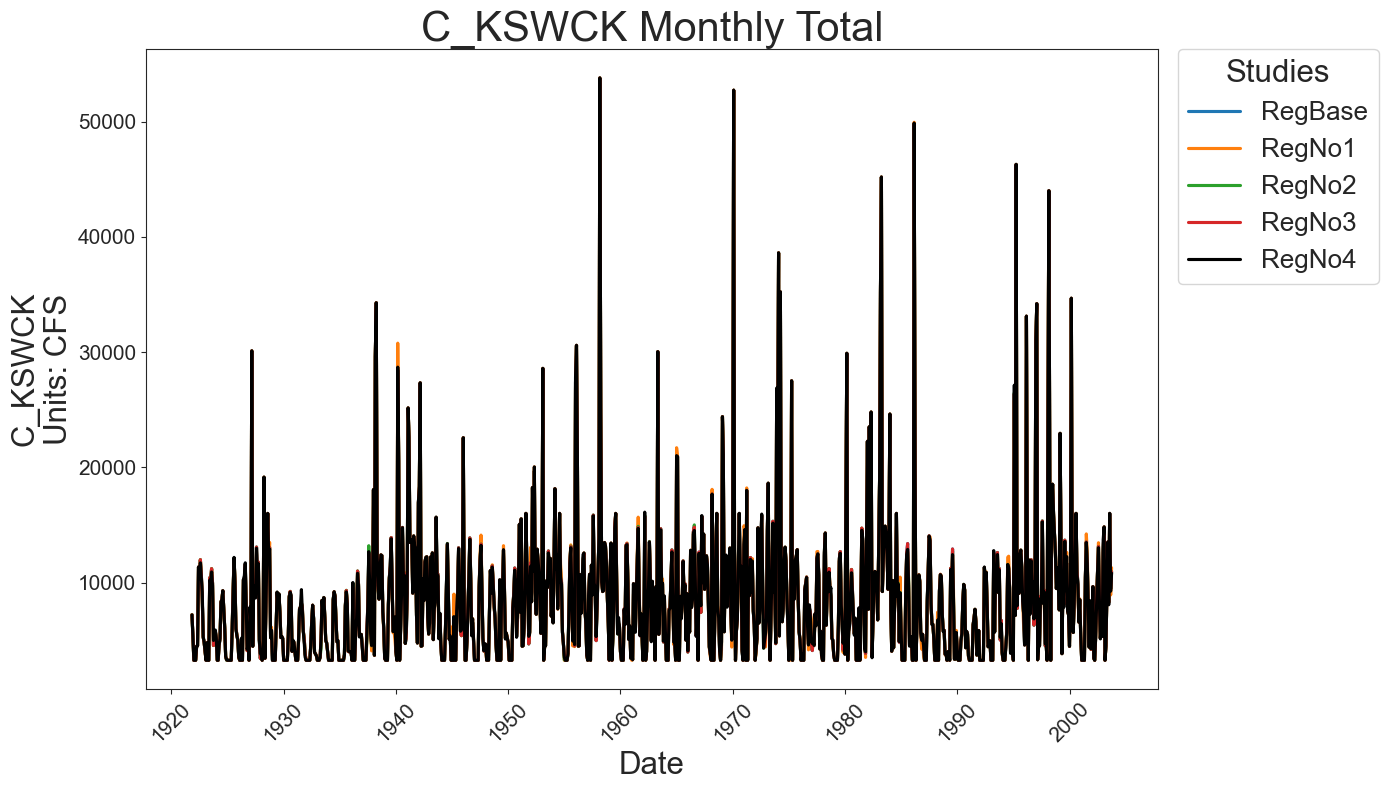

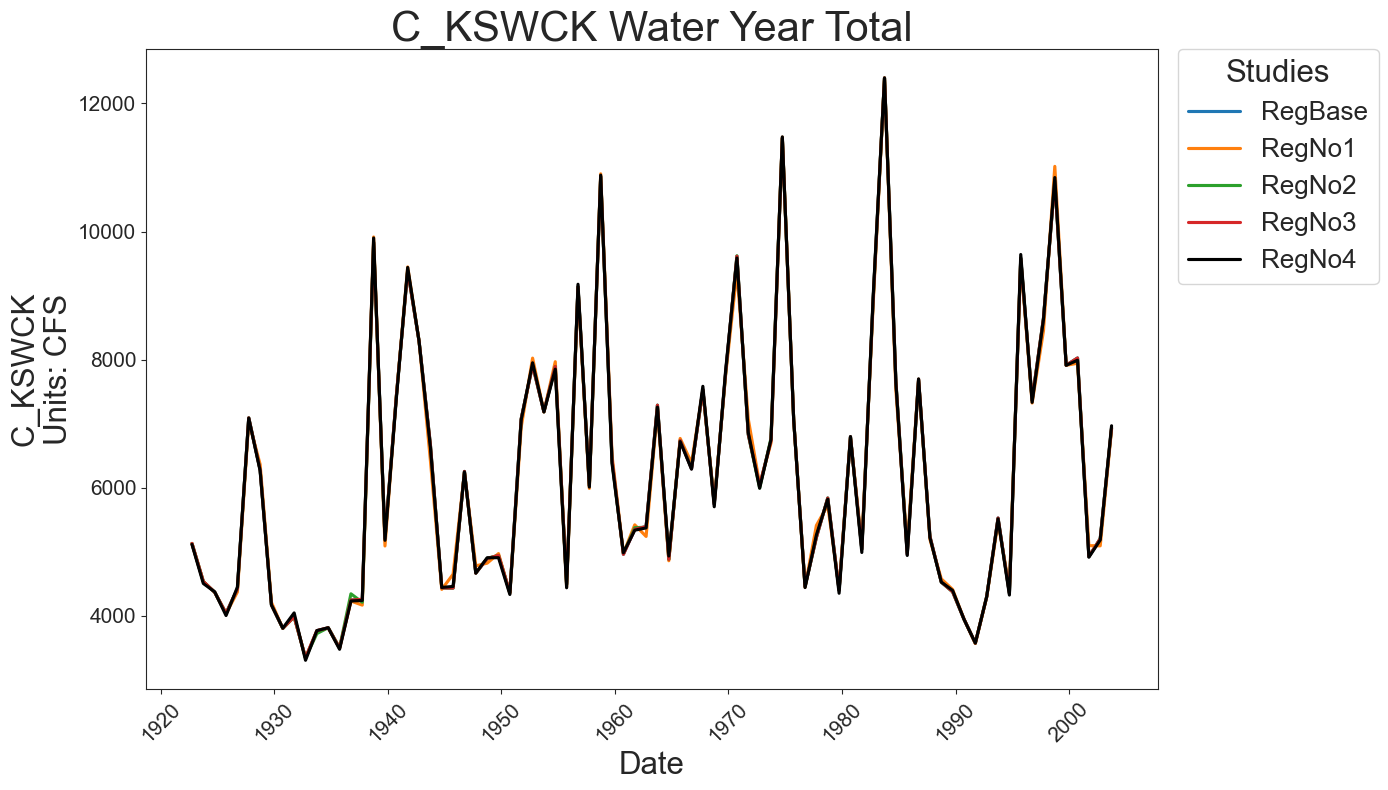

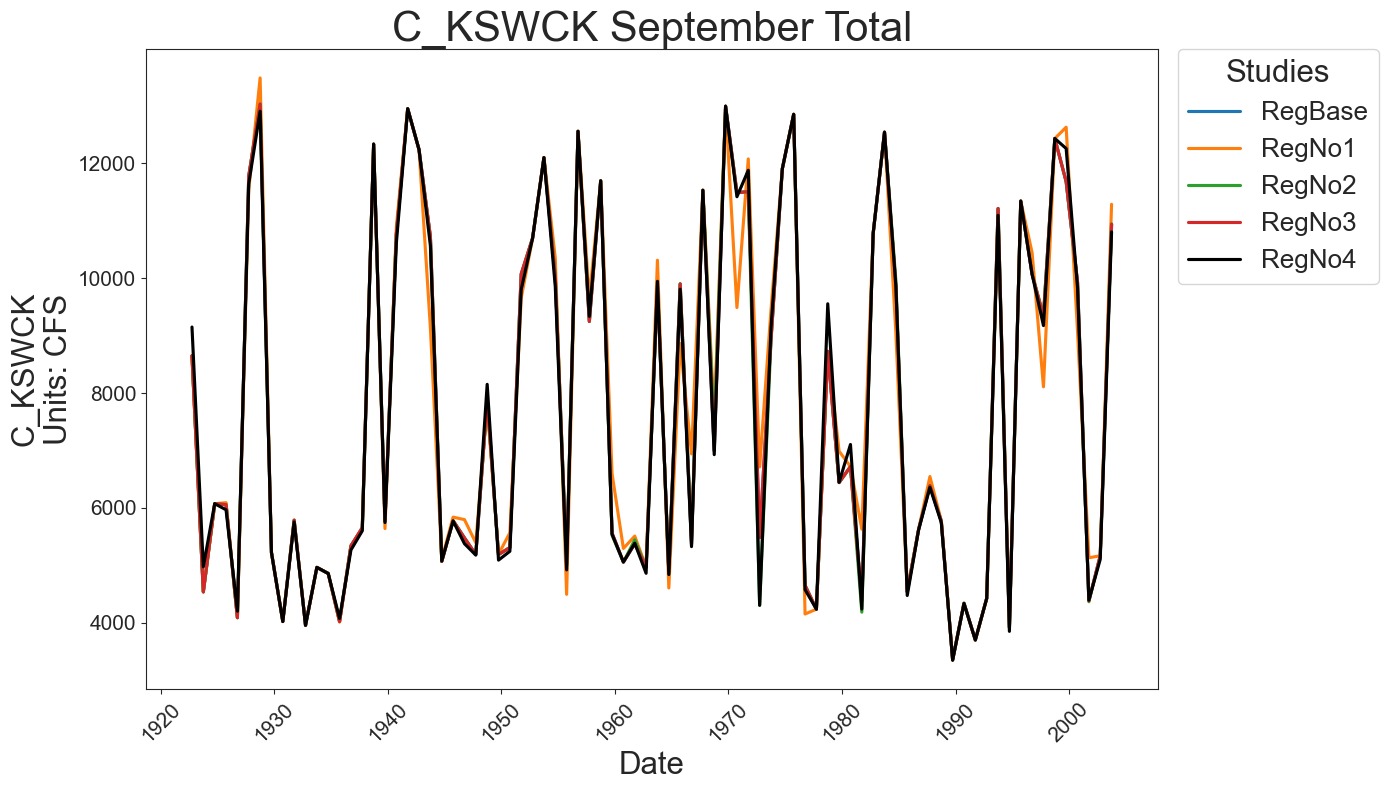

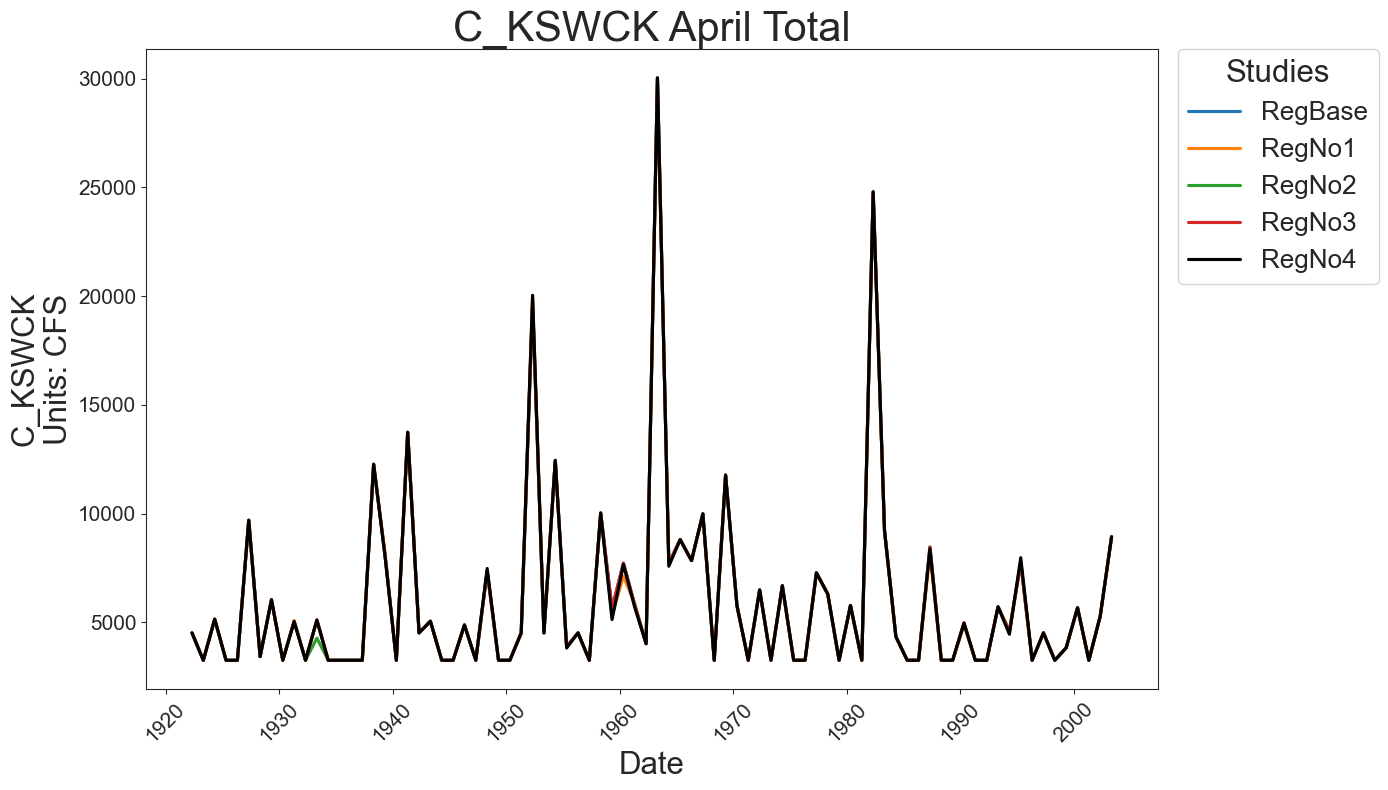

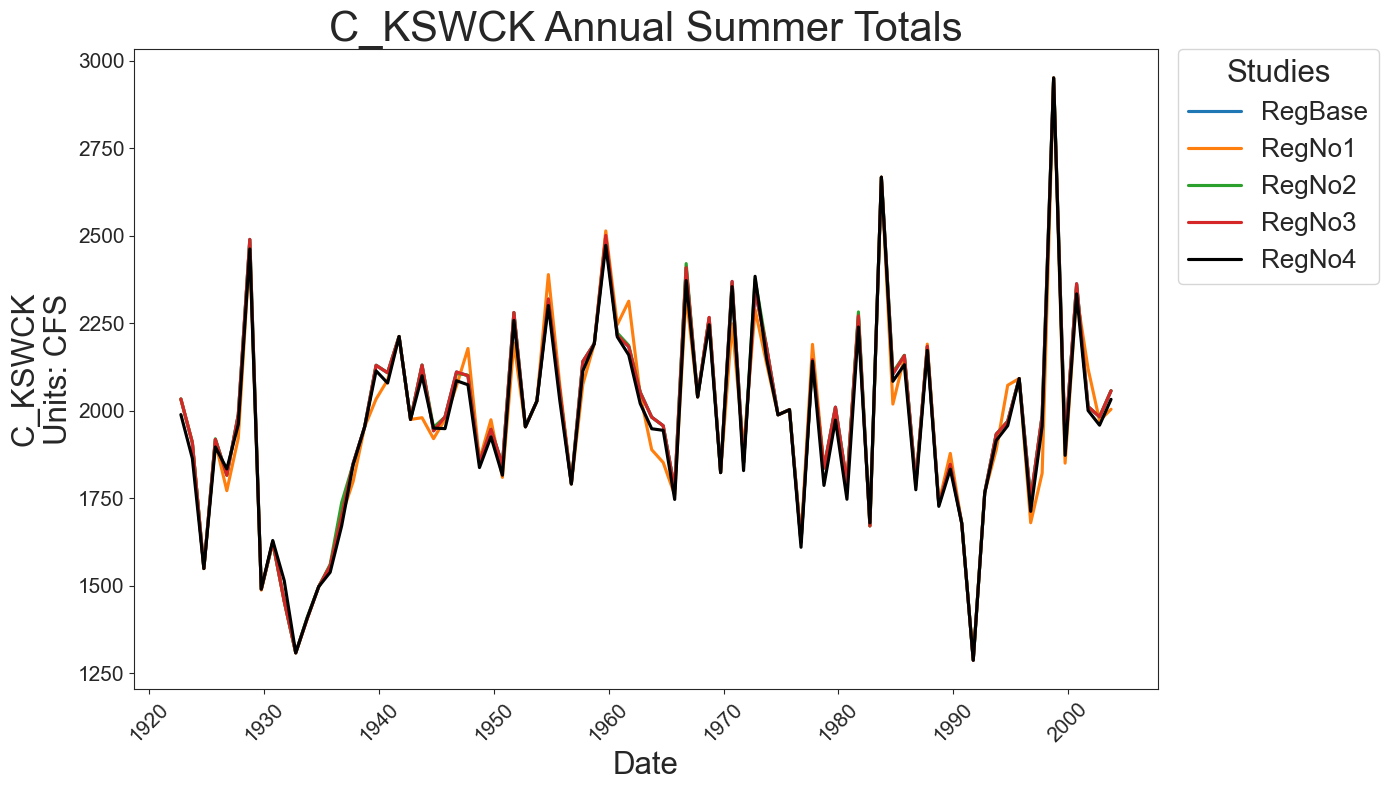

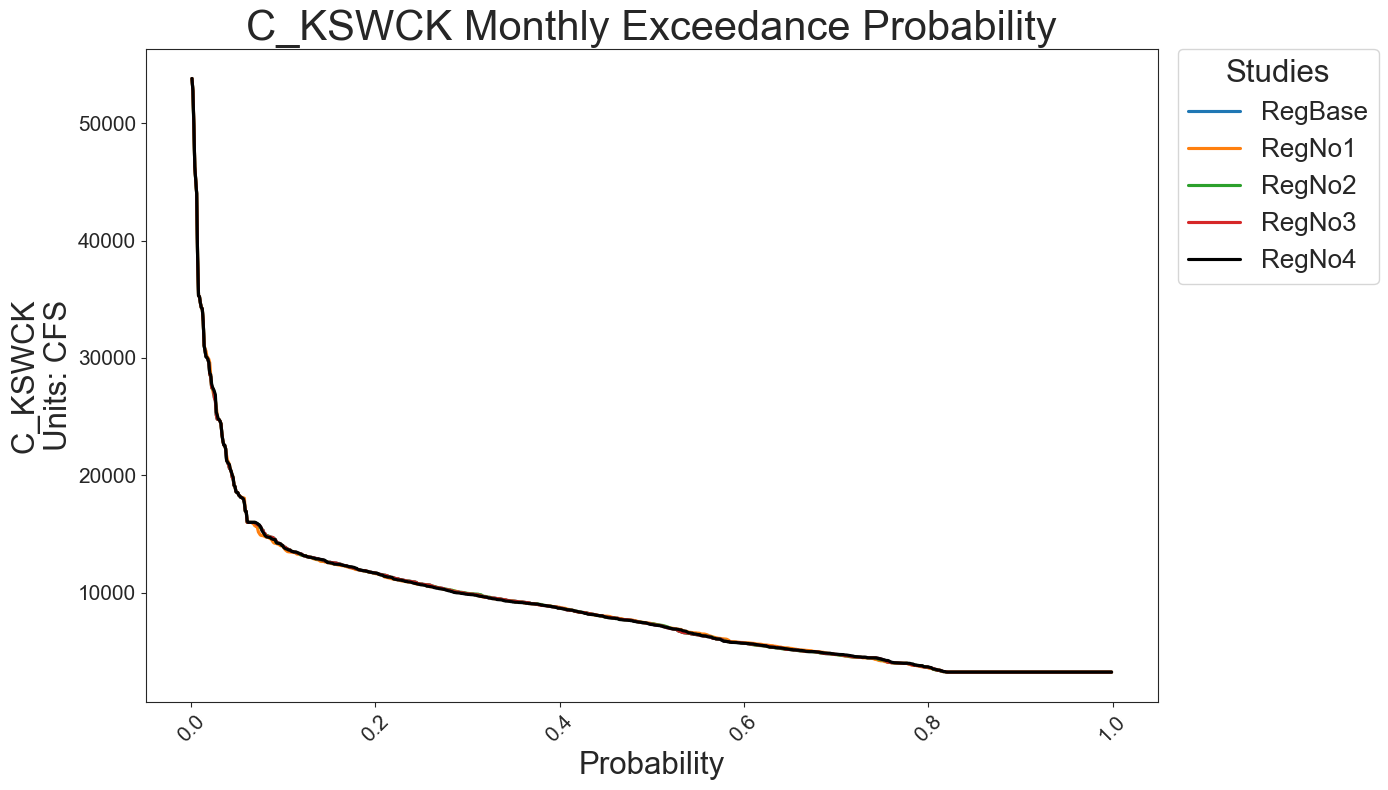

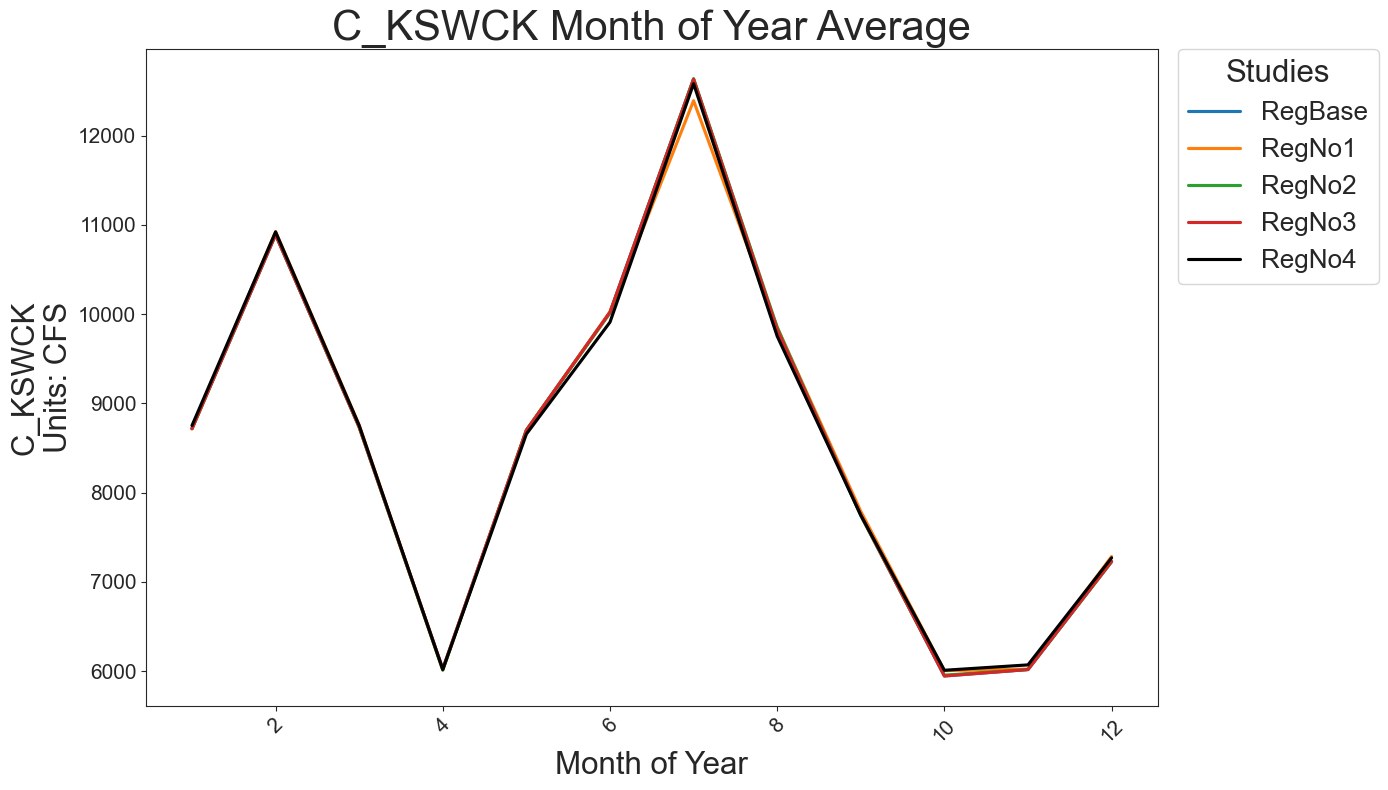

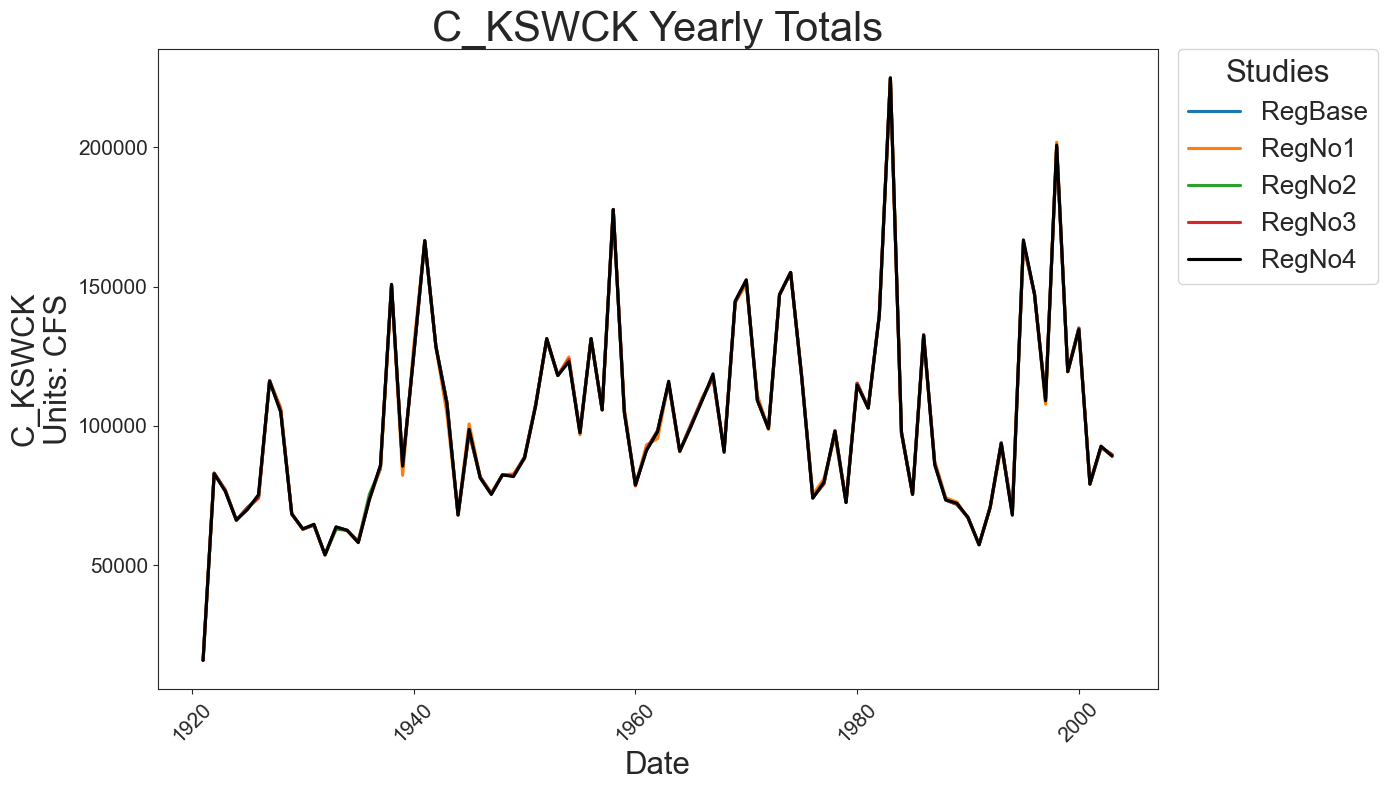

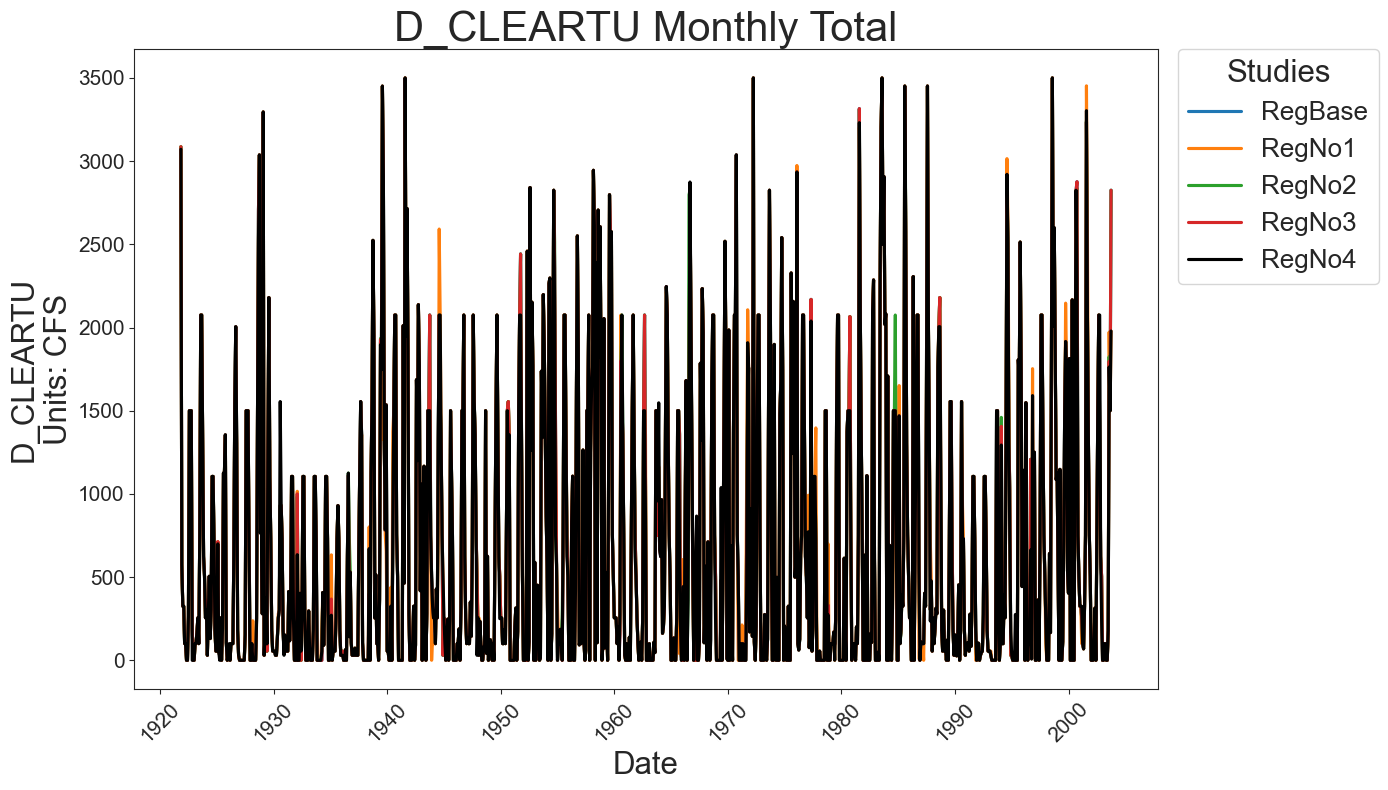

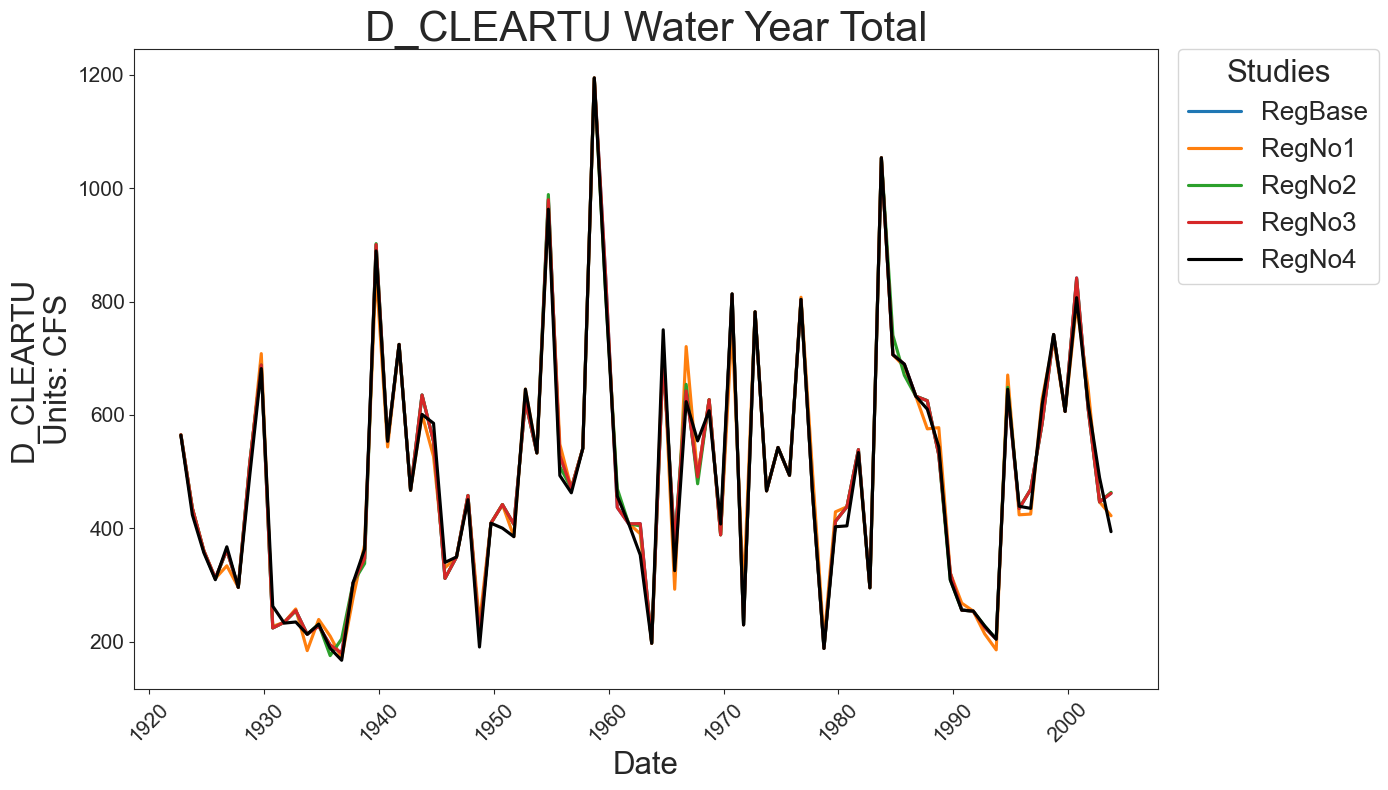

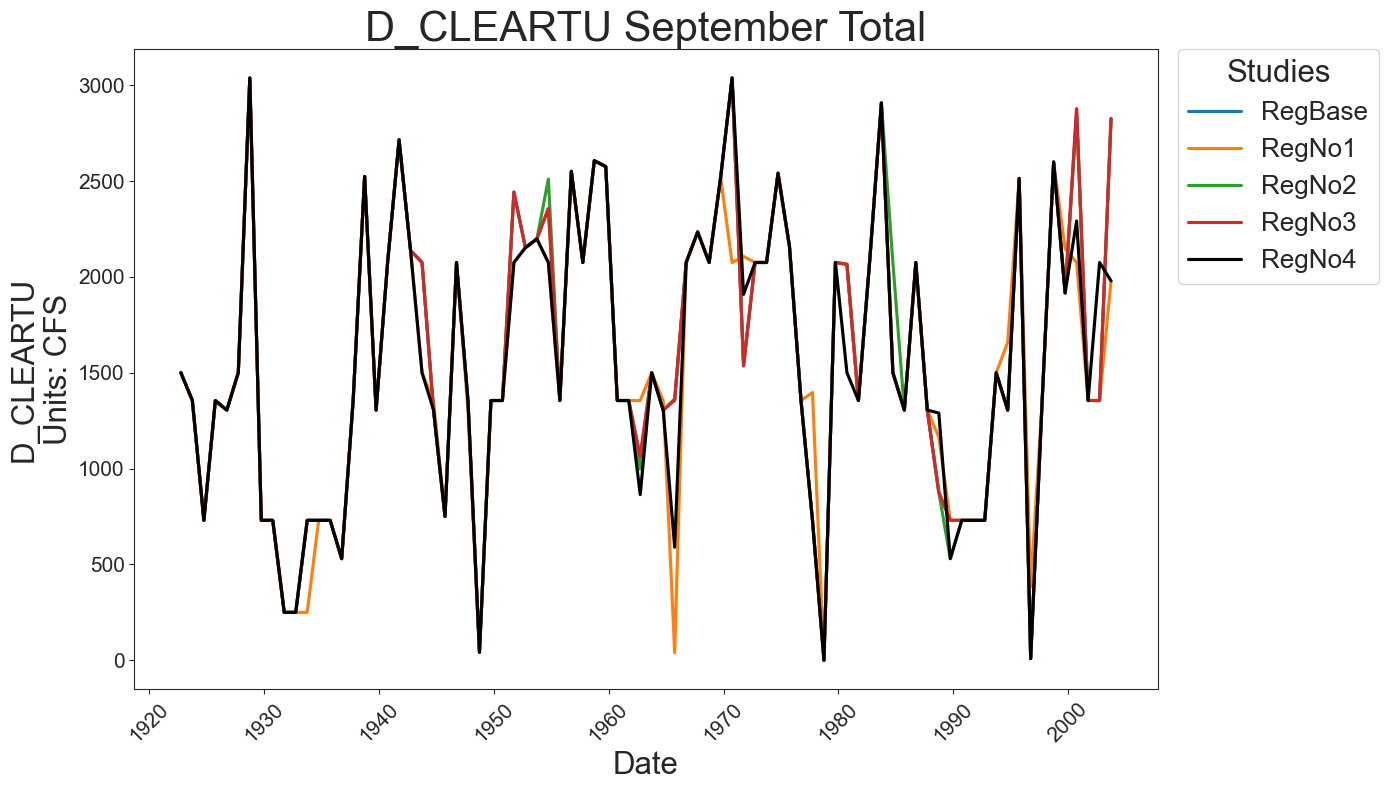

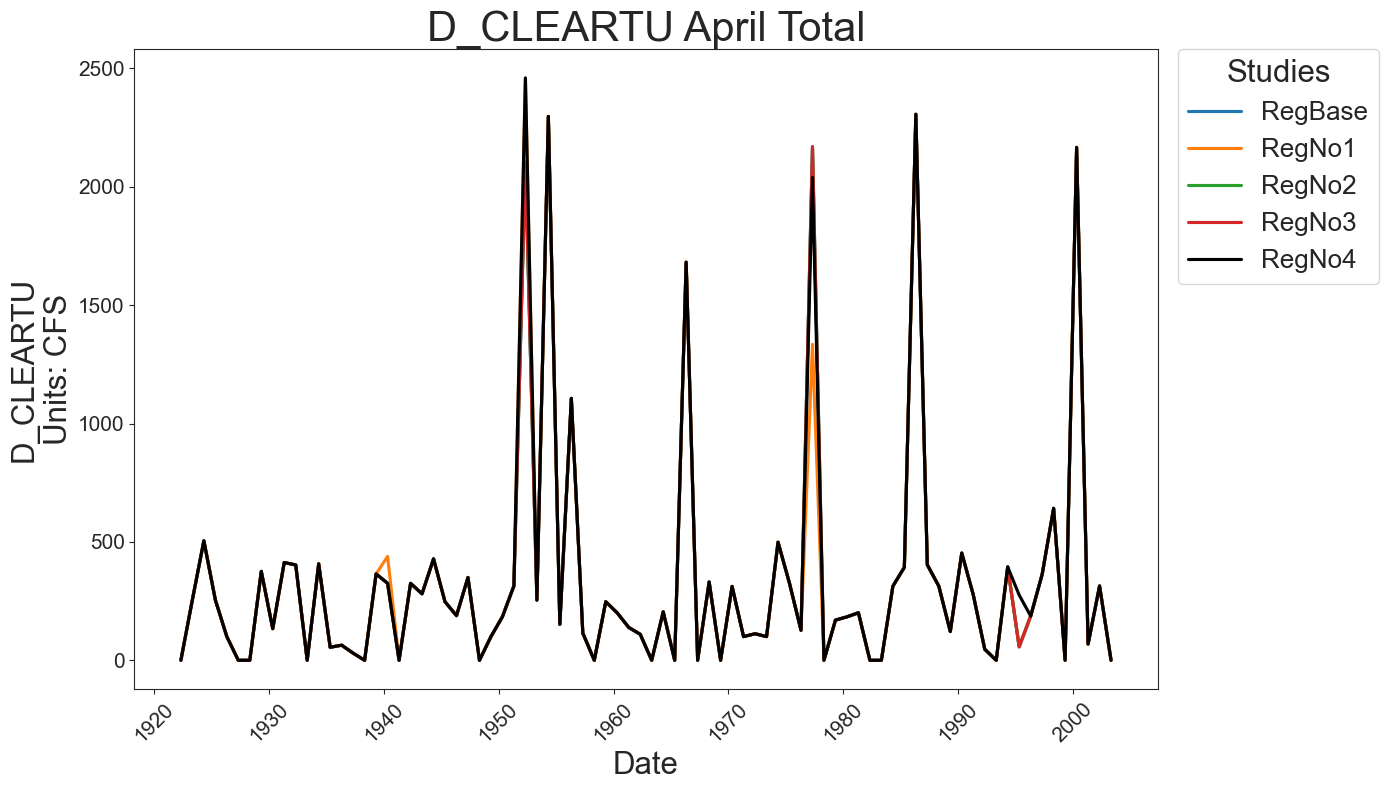

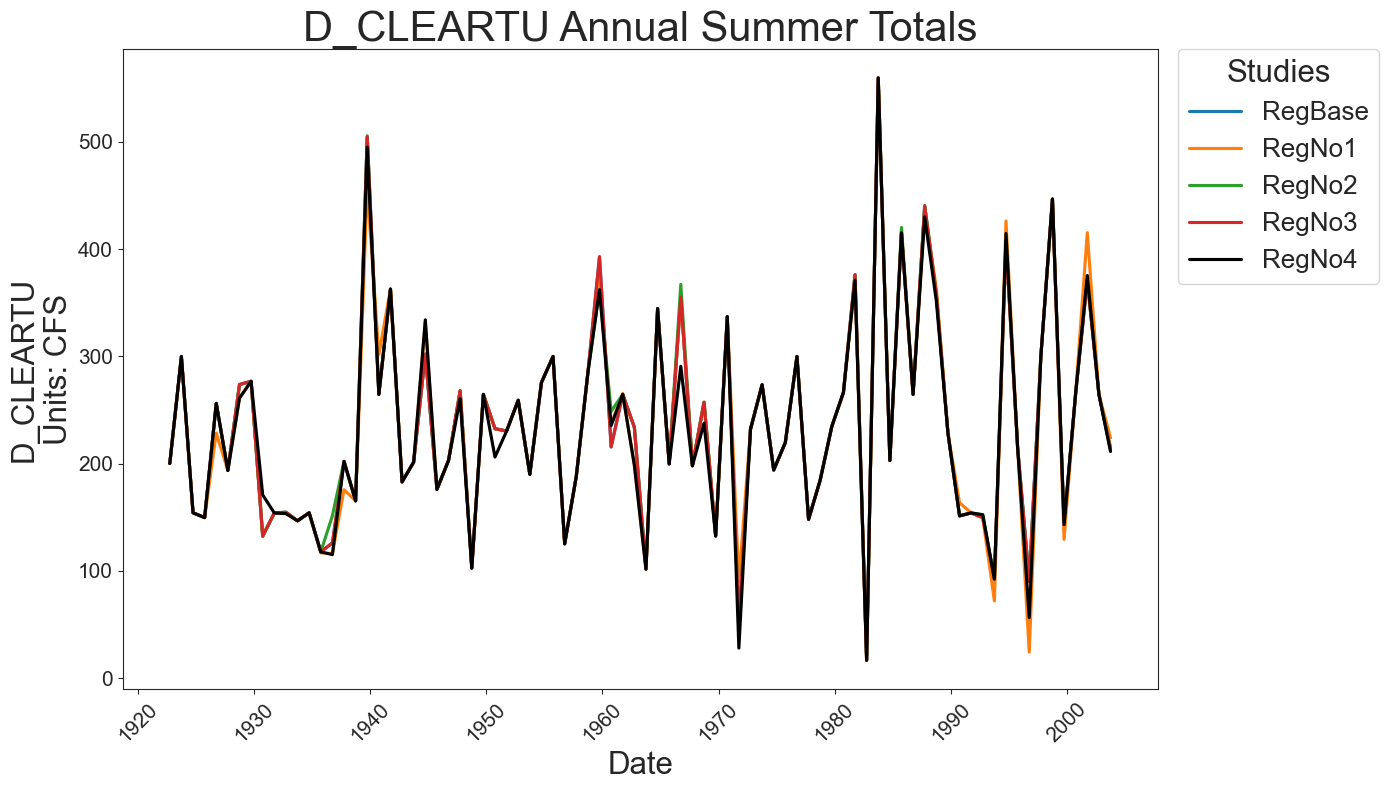

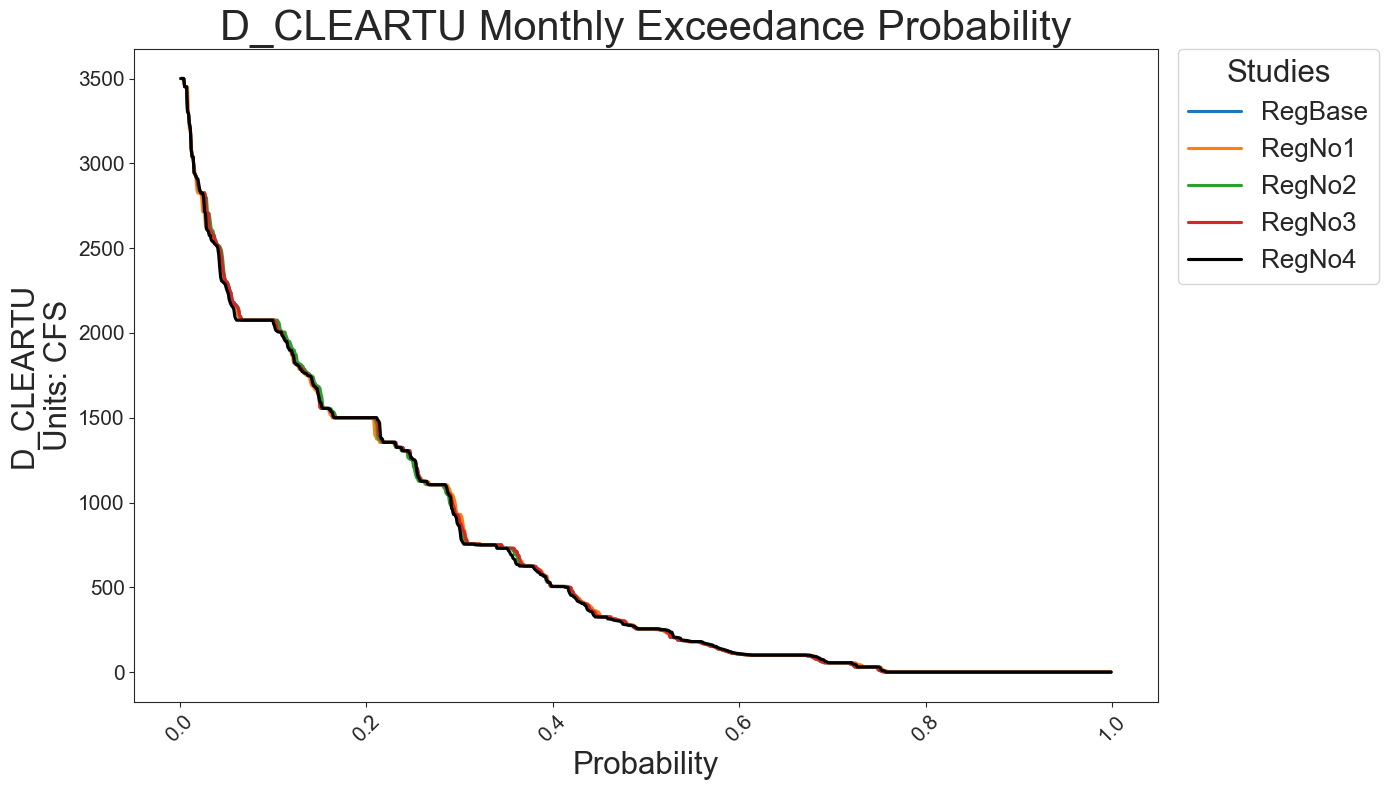

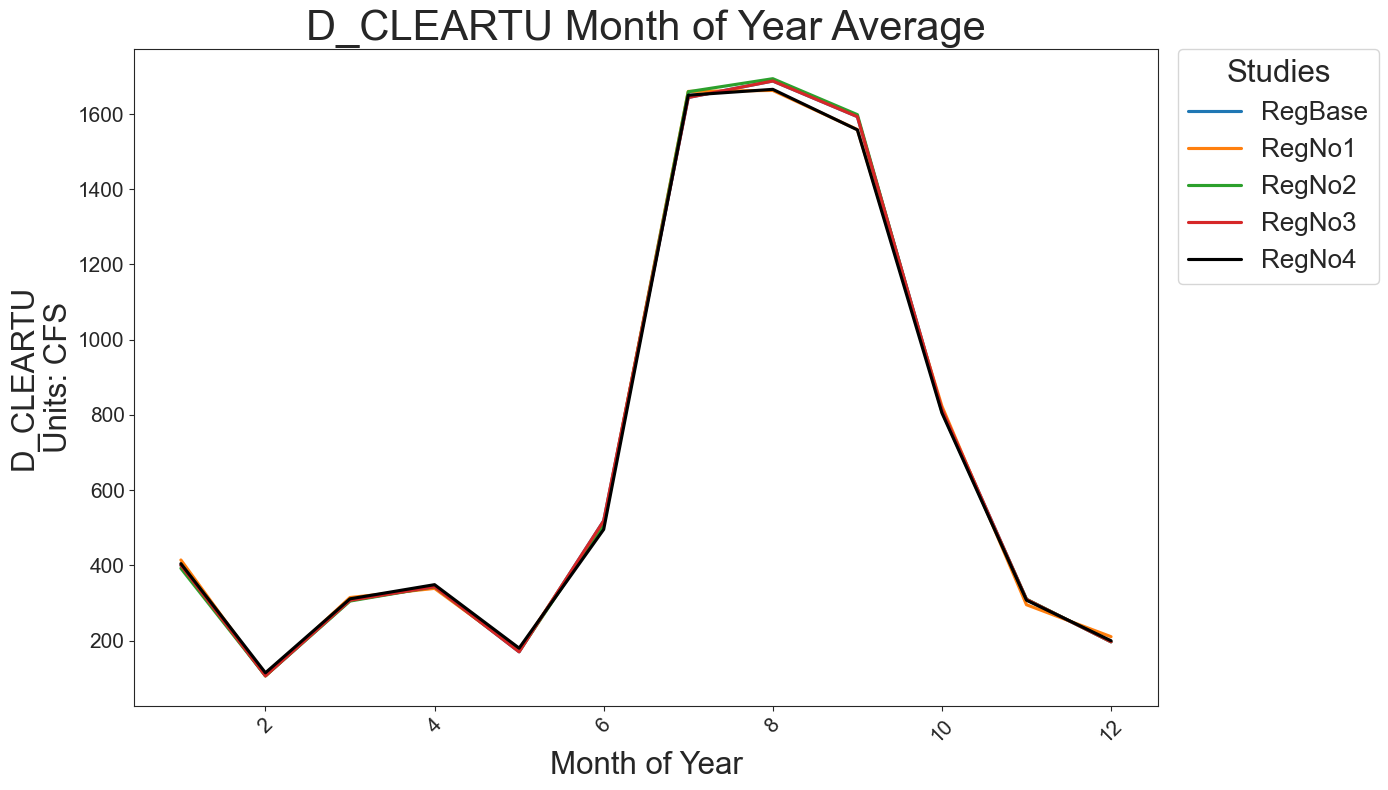

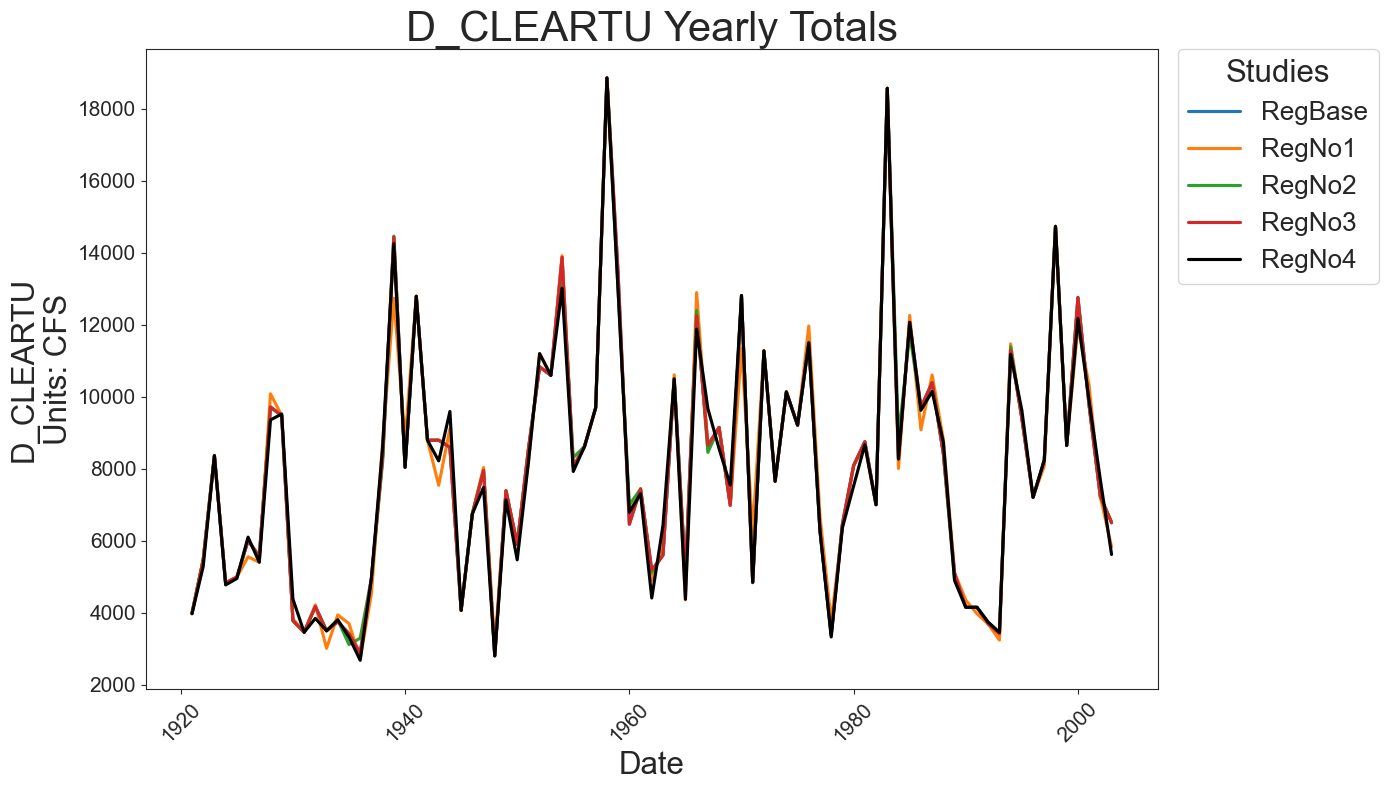

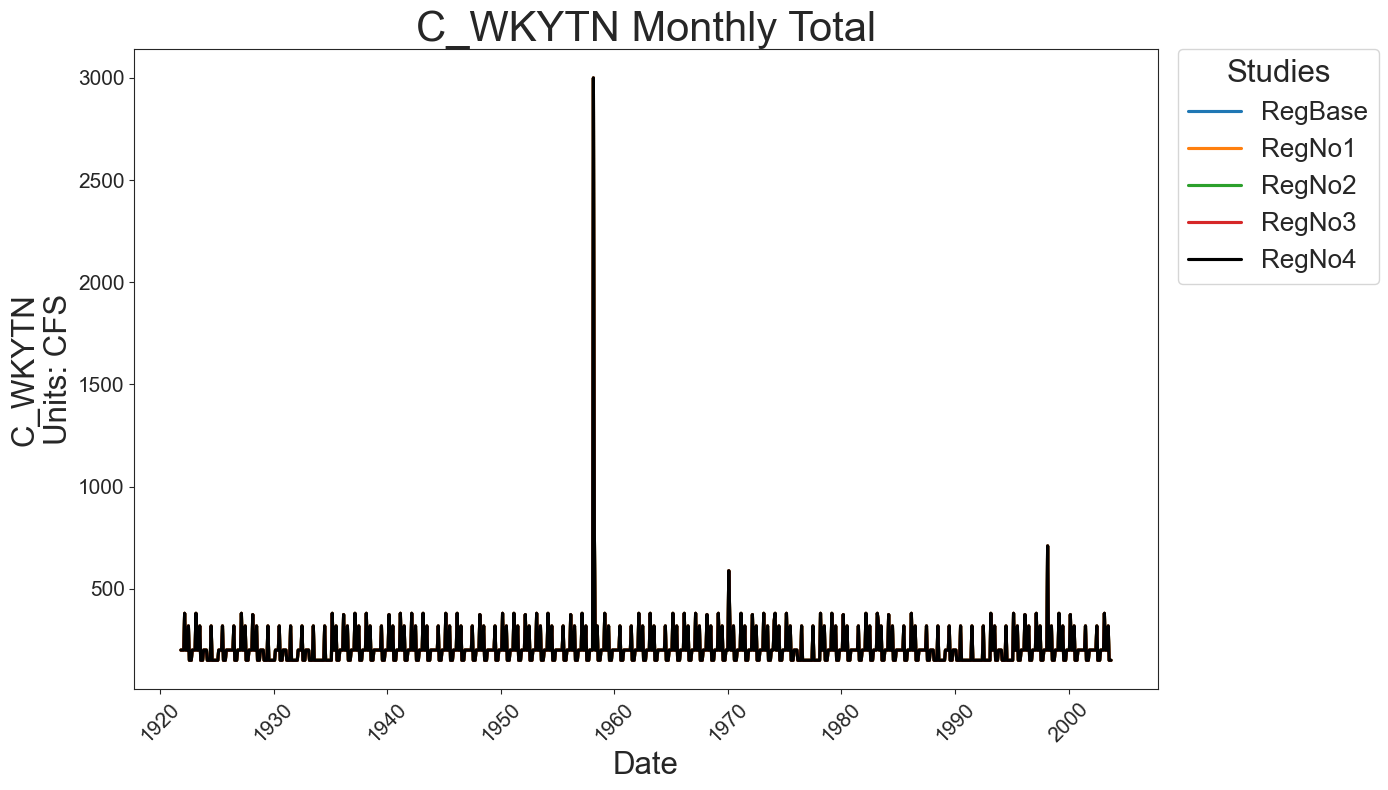

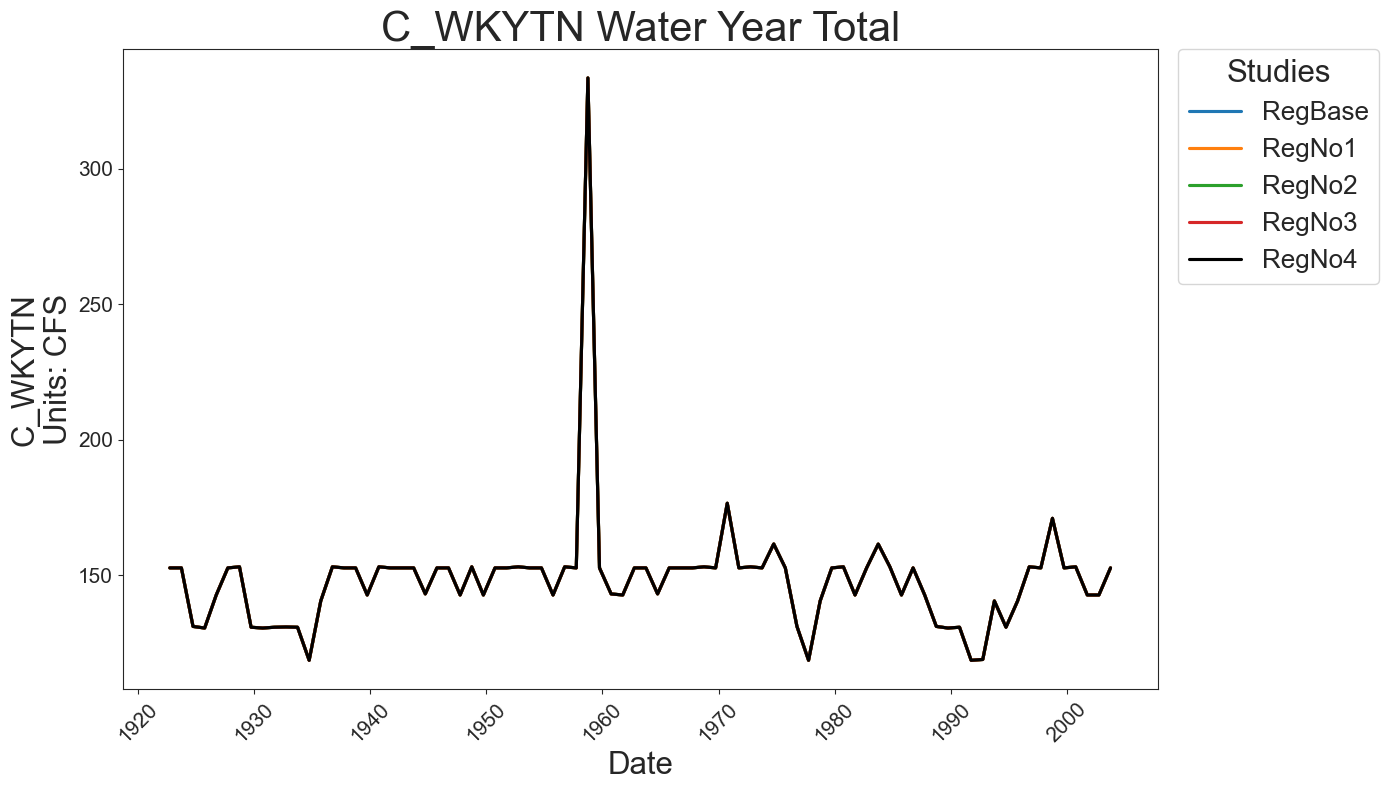

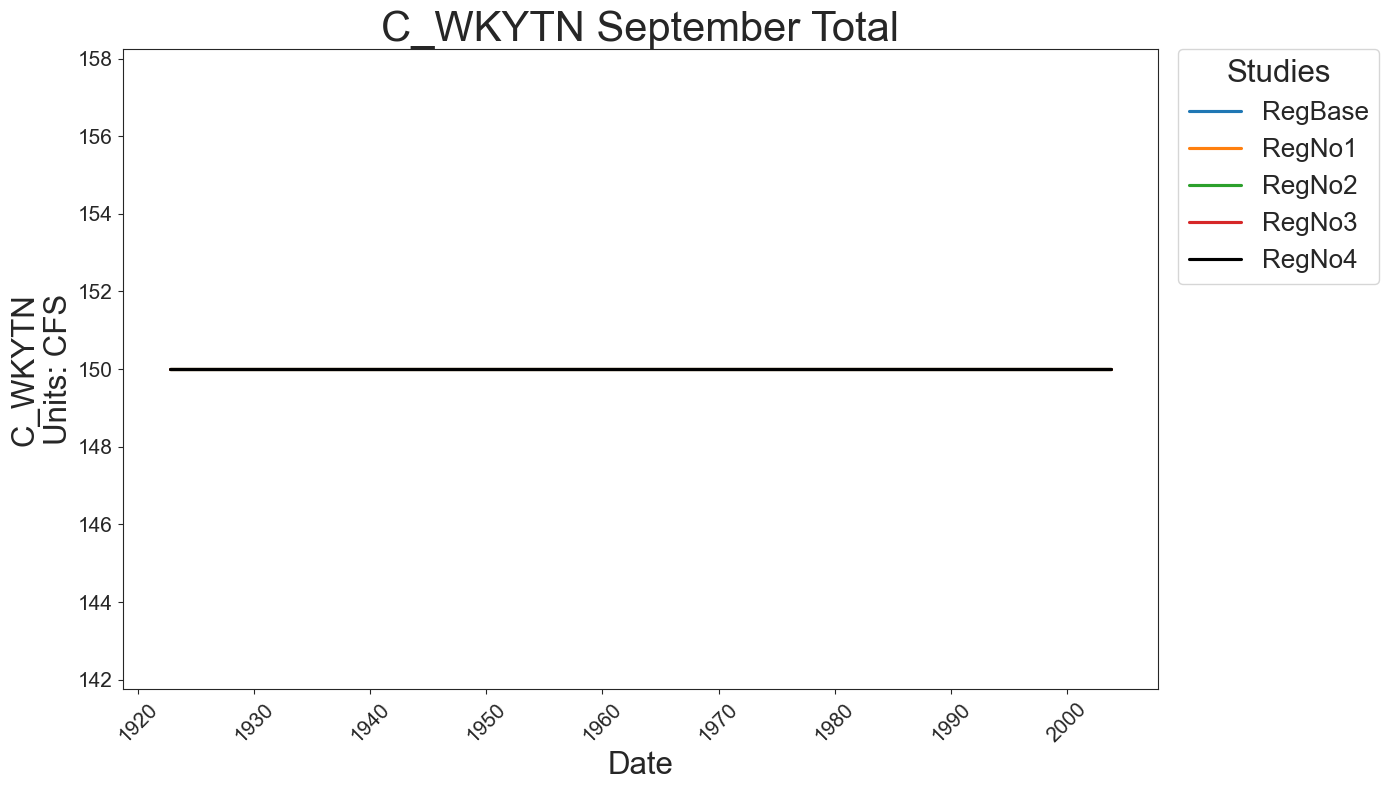

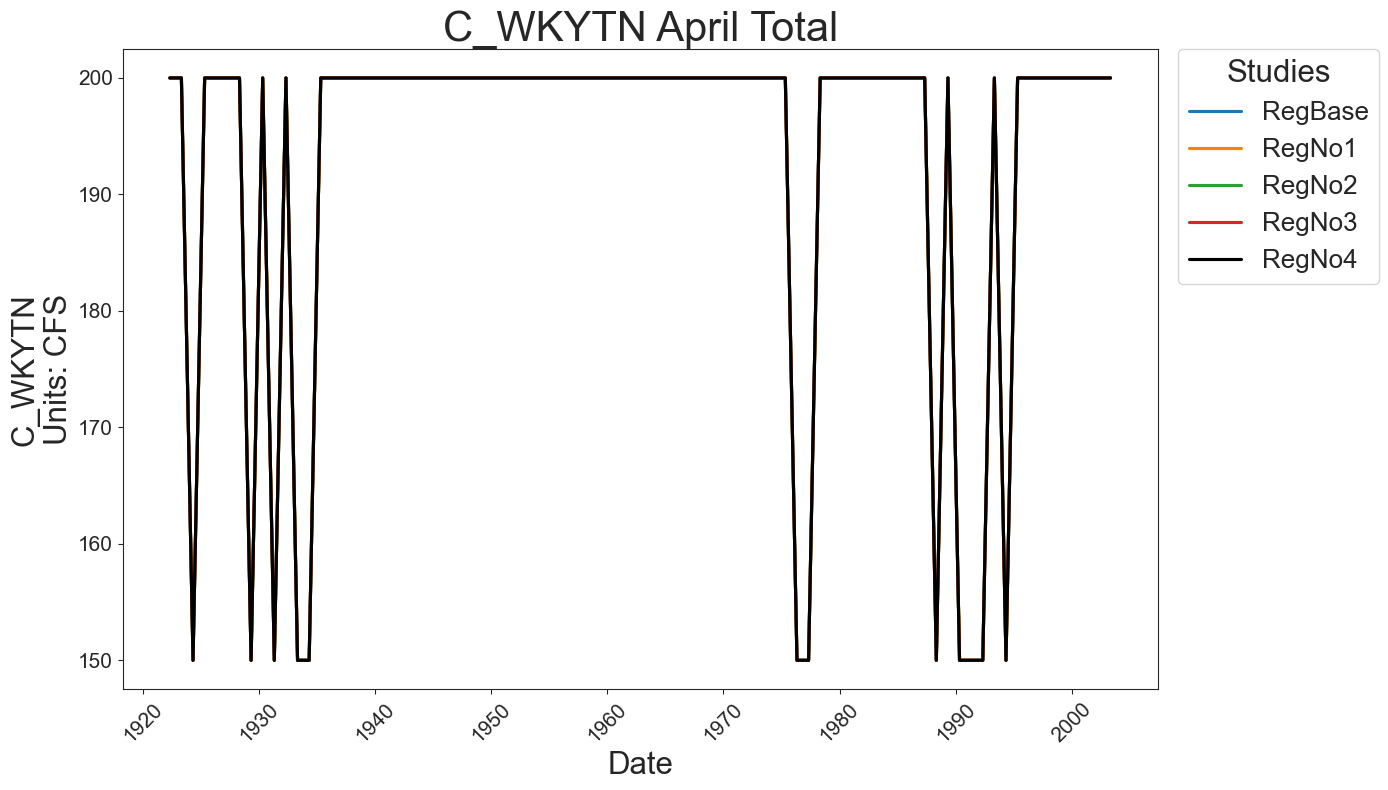

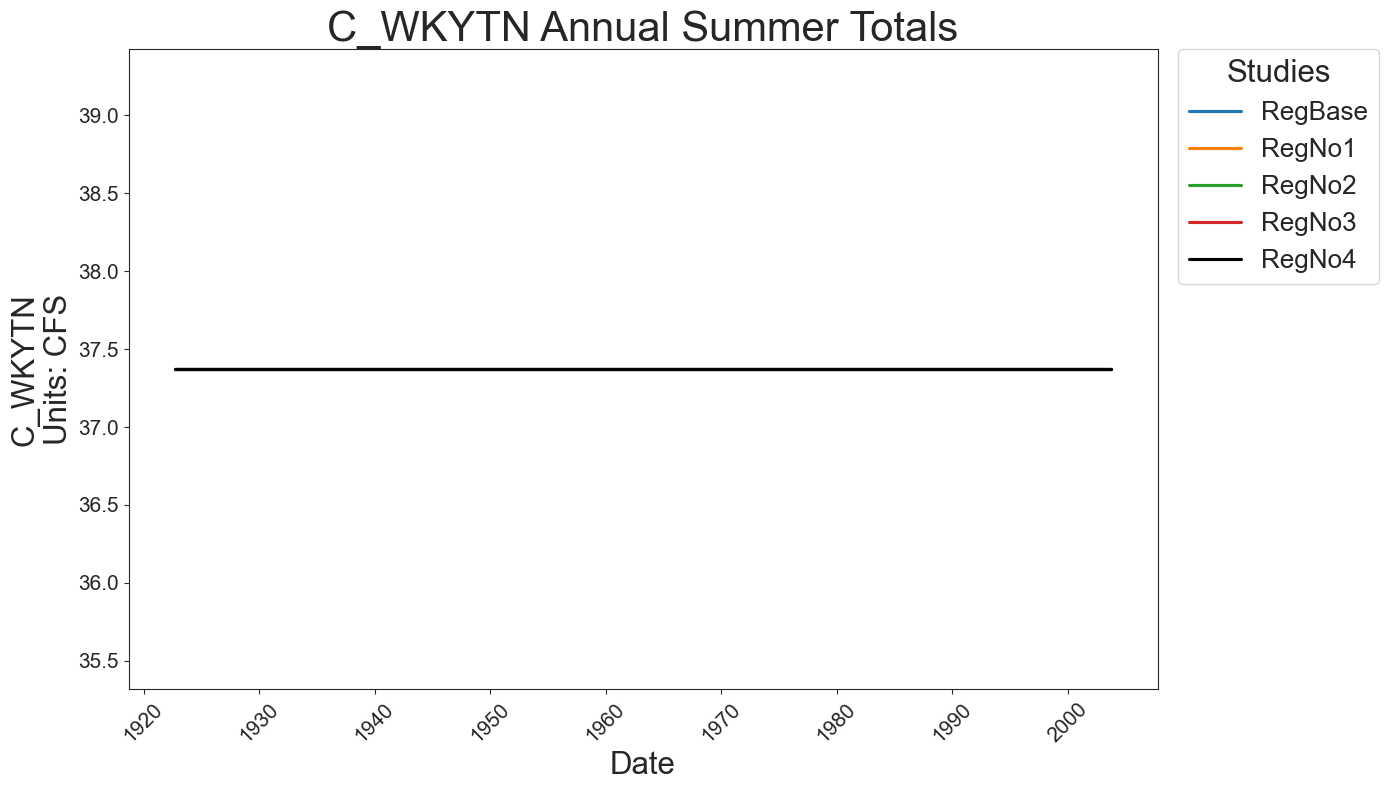

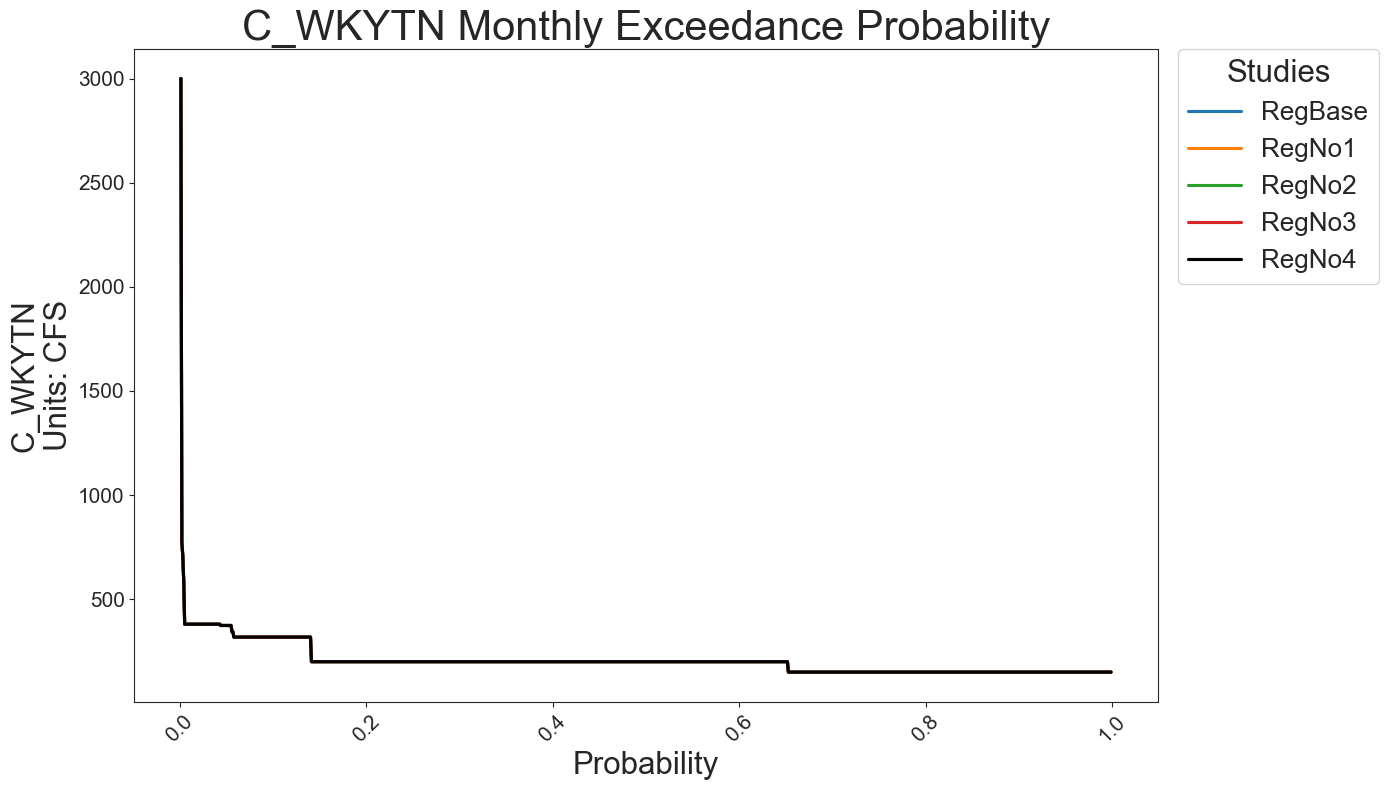

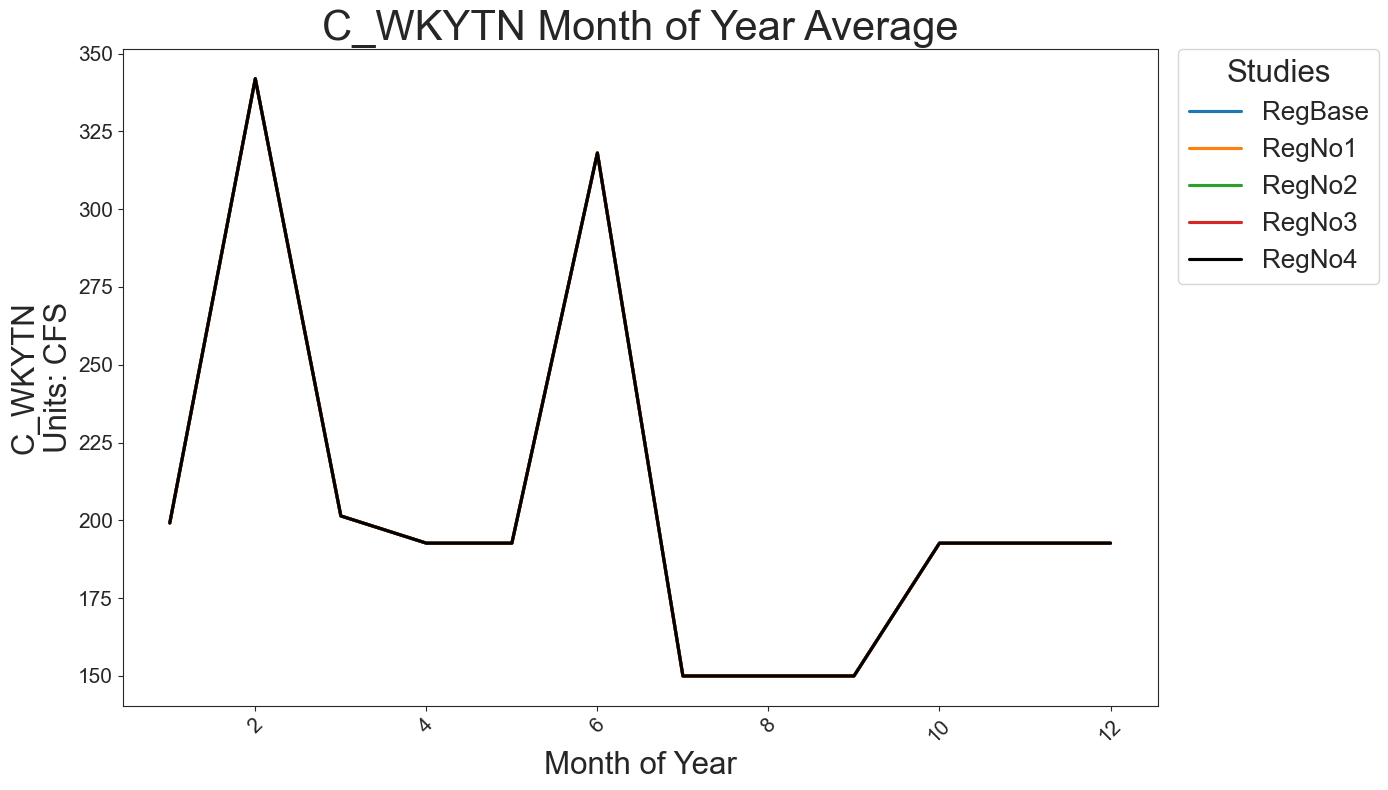

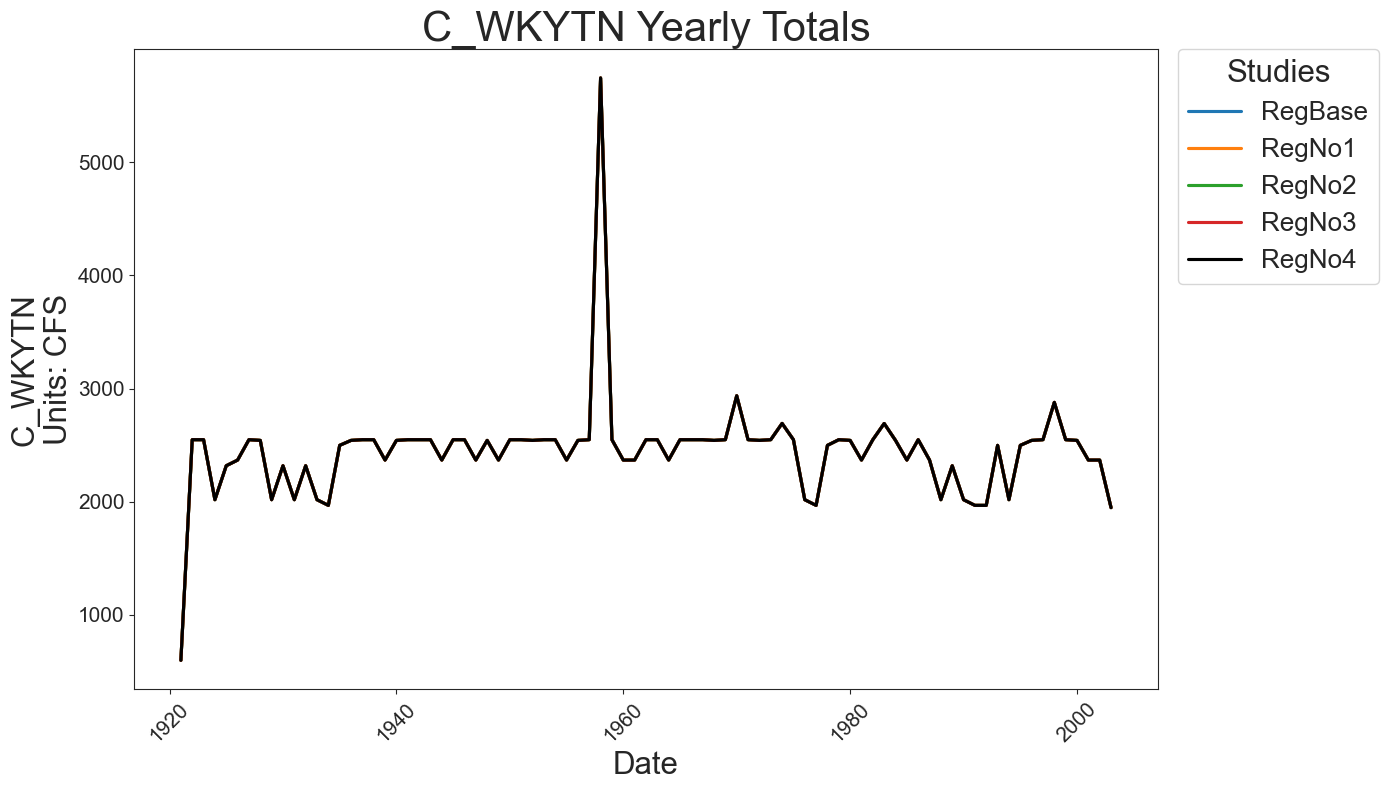

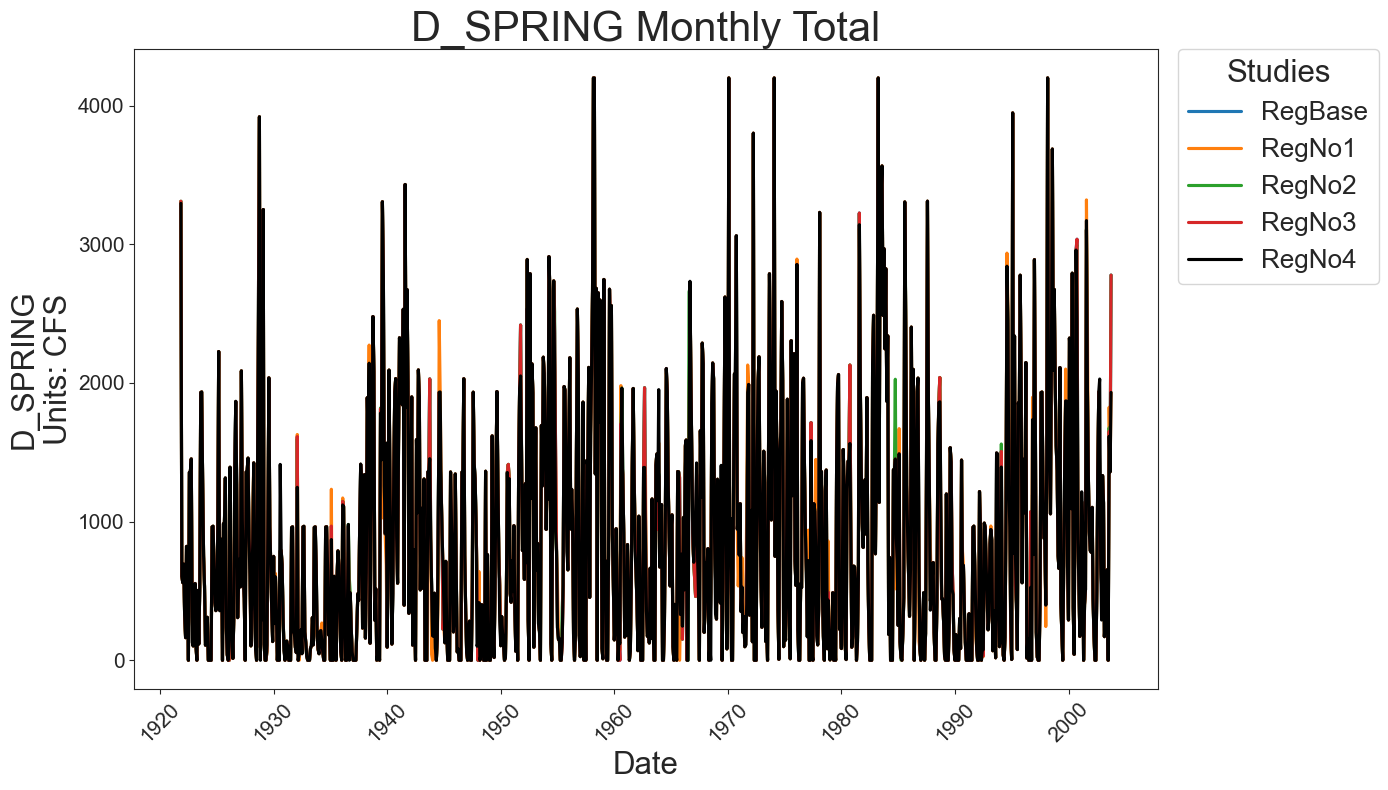

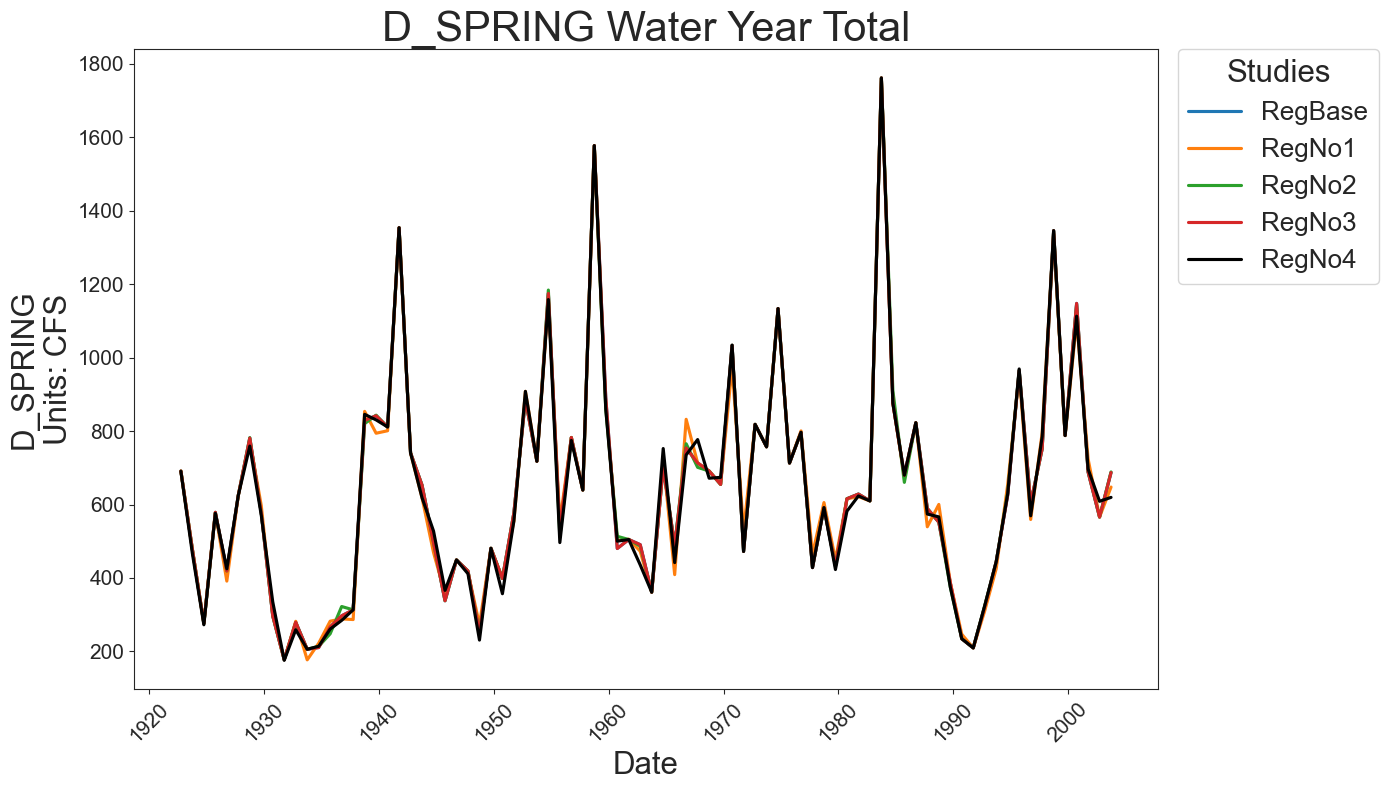

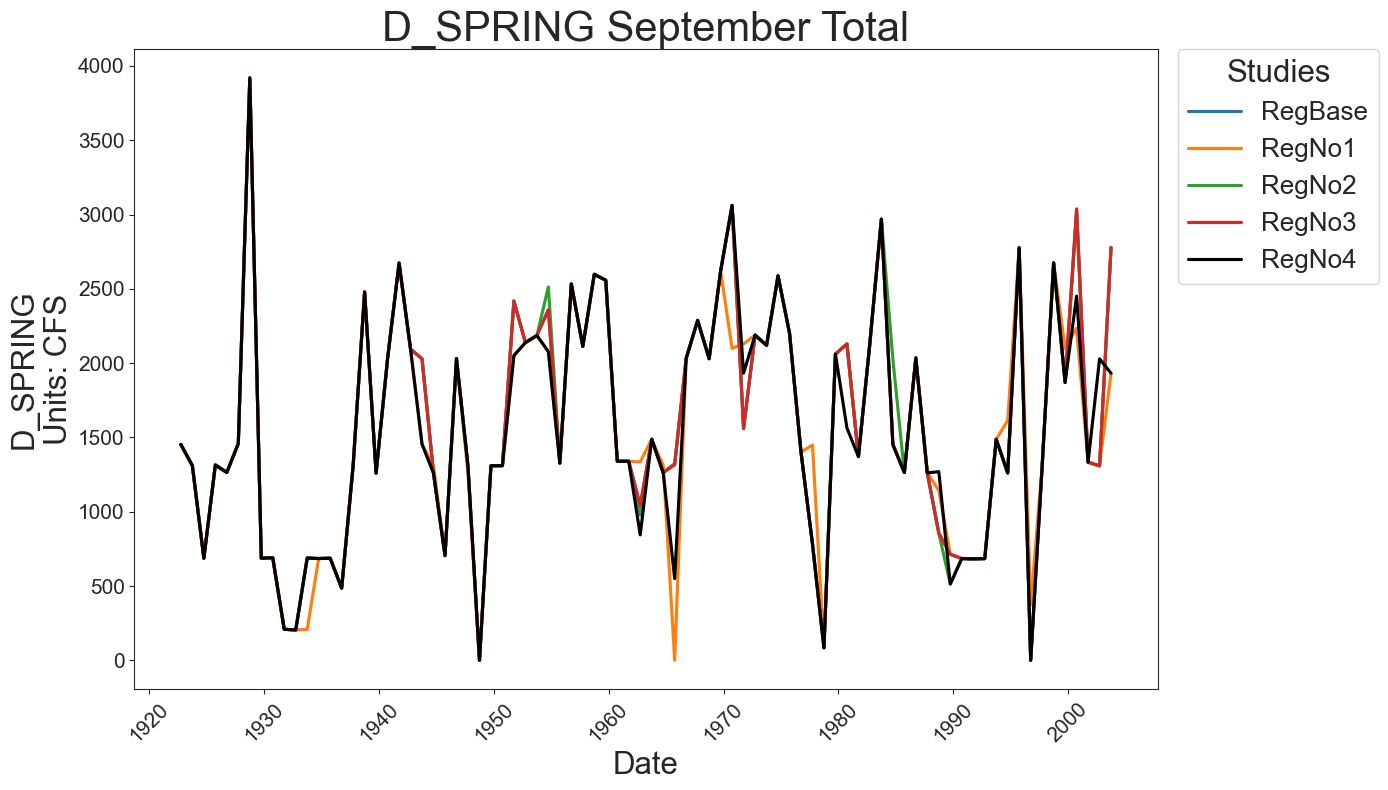

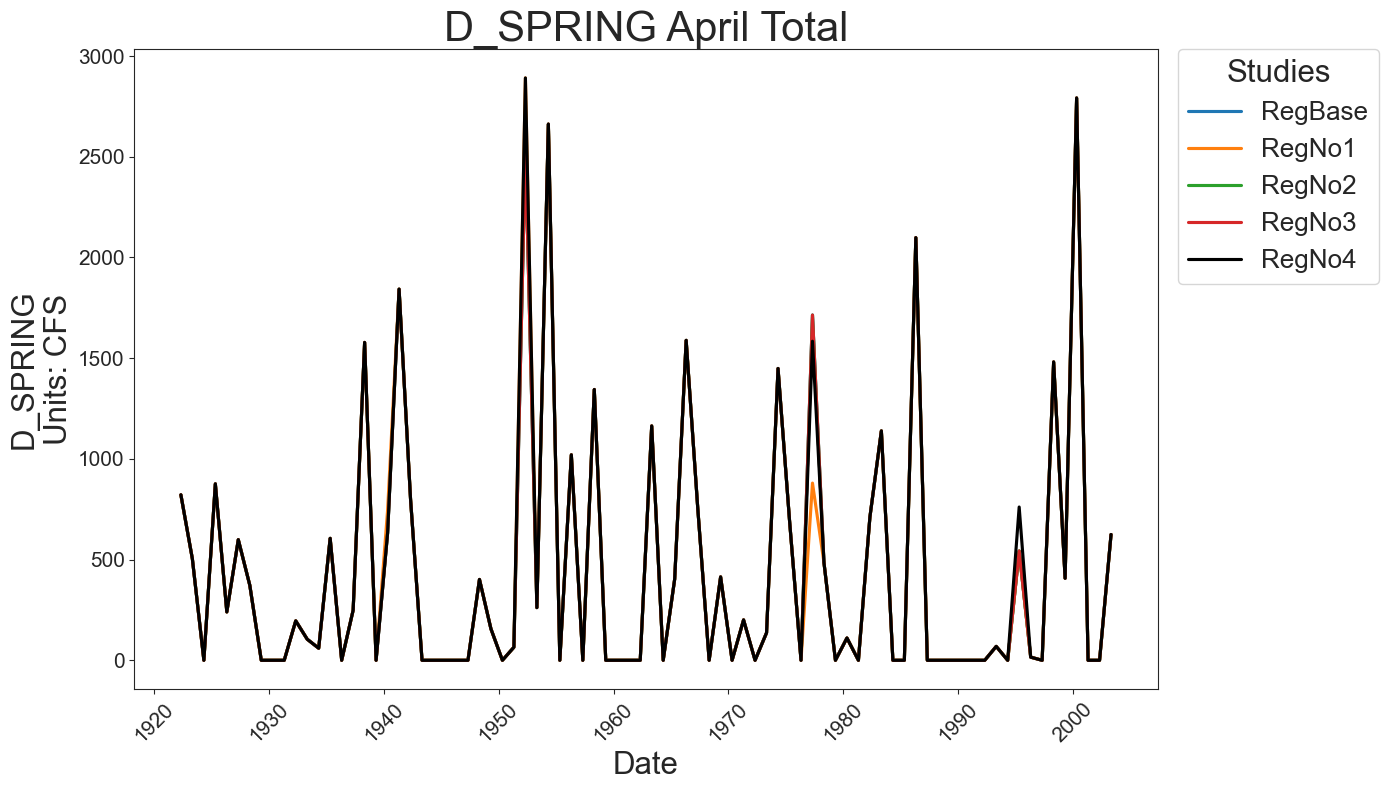

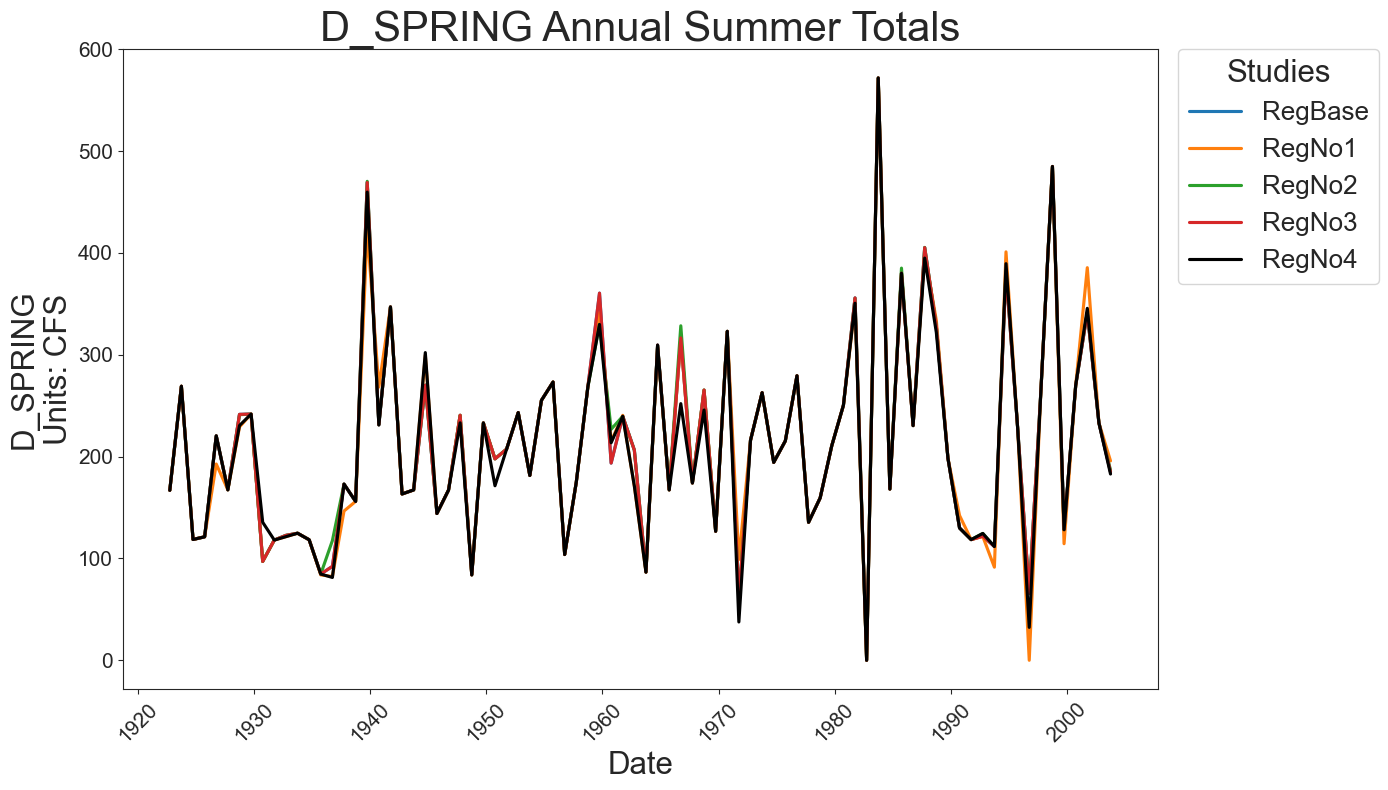

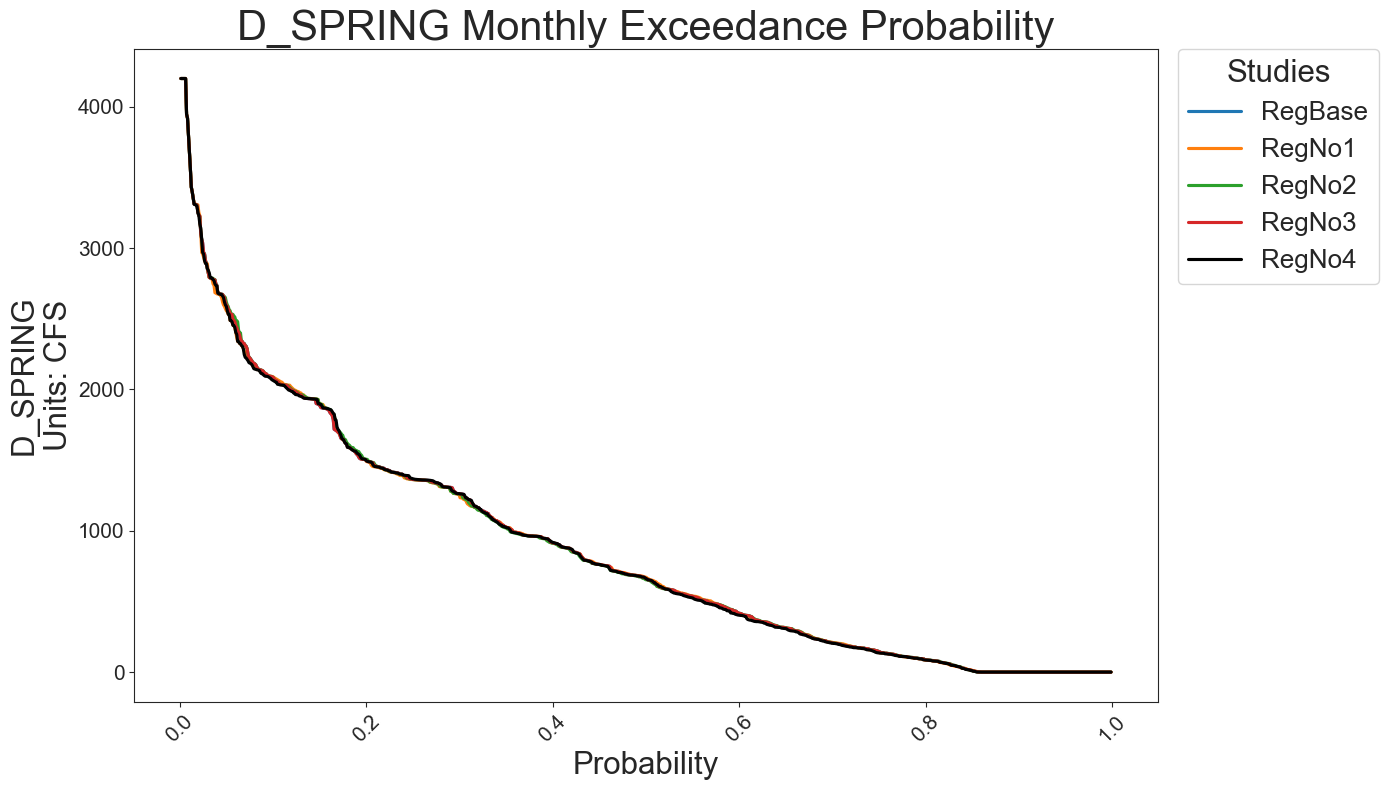

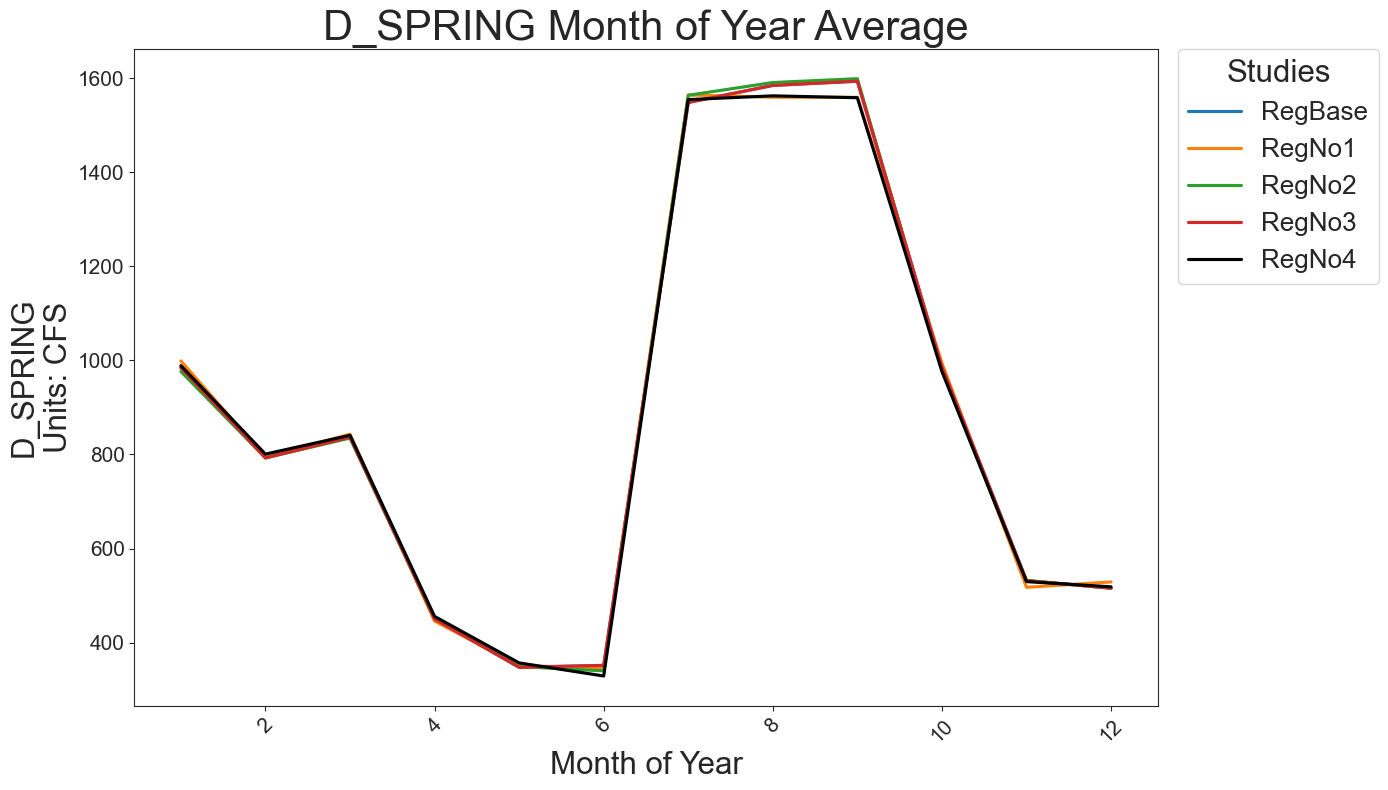

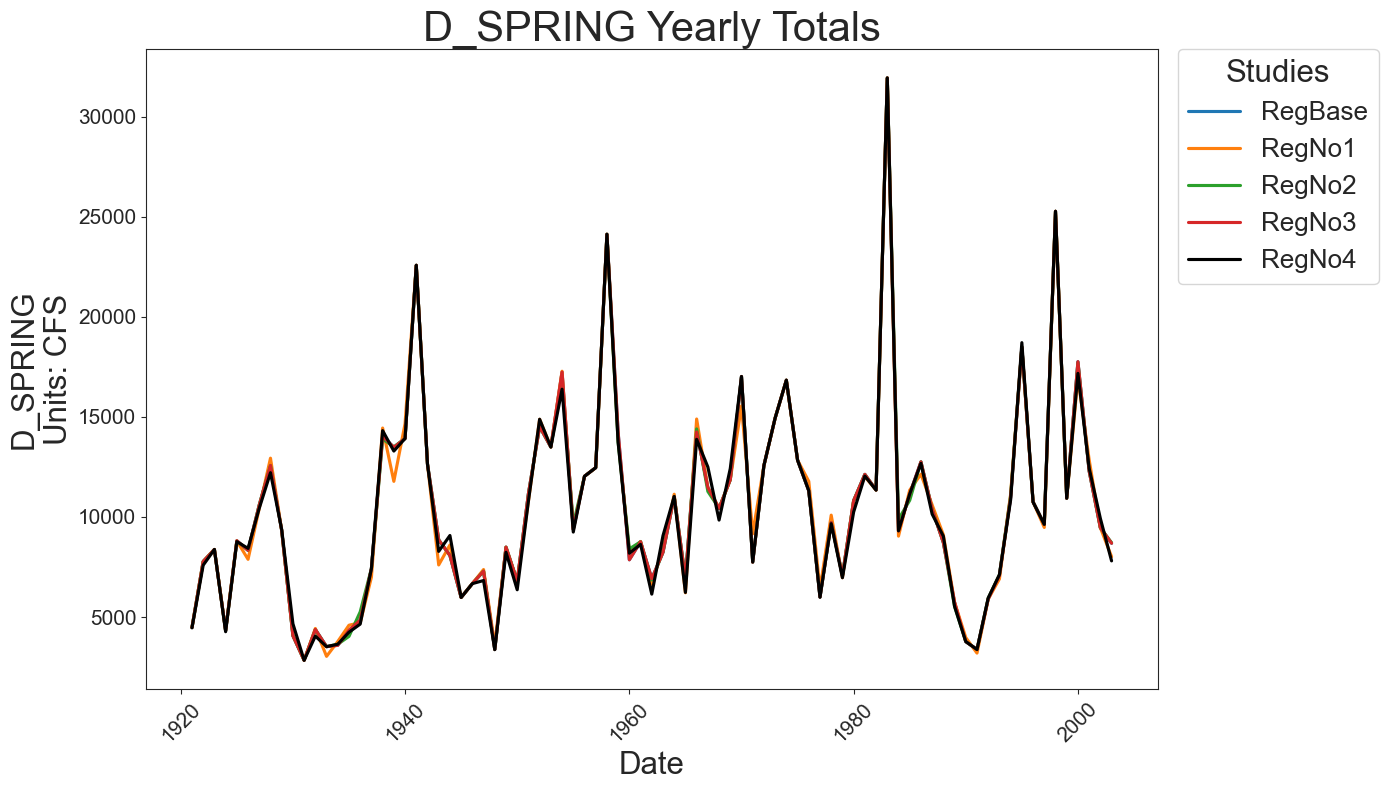

ValueError: Data must be 1-dimensional

<Figure size 1400x800 with 0 Axes>

In [93]:
for var in var_list:
    print(var)
    filter_df = create_subset(merged_df, var)
    # Regular TS
    plot_ts(filter_df, pTitle = 'Monthly Total', fTitle = 'Month_Tot', fPath = fPath)
    
    # Annualized Total
    plot_annual_totals(filter_df, pTitle = 'Water Year Total', fTitle = 'WY_Tot', fPath = fPath)
    
    # End of Year TS
    copy = filter_df.copy()
    sep_data = copy[copy.index.month.isin([9])] 
    plot_ts(sep_data, pTitle = 'September Total', fTitle = 'Sep_Tot', fPath = fPath)
    
    # April TS
    apr_data = copy[copy.index.month.isin([4])]
    plot_ts(apr_data, pTitle = 'April Total', fTitle = 'Apr_Tot', fPath = fPath)
    
    # Summer Totals
    thisdata_summer = copy[copy.index.month.isin([6,7,8])]
    plot_annual_totals(thisdata_summer, pTitle = 'Annual Summer Totals', fTitle = 'Ann_Summ_Tot', pSave = False, fPath = fPath)
    
    # Exceedance
    plot_exceedance(filter_df, xLab = 'Probability', pTitle = 'Monthly Exceedance Probability', fTitle = 'Mon_exceed', fPath = fPath)
    
    # Average MOY
    plot_moy_averages(filter_df, pTitle = 'Month of Year Average', fTitle = 'MoY_Avg', fPath = fPath)
    
    # Yearly Totals
    thisdata_yr = copy
    thisdata_yr["Year"] = thisdata_yr.index.year
    thisdata_yrtot = thisdata_yr.groupby('Year').sum()
    plot_ts(thisdata_yrtot, xLab = 'Date', pTitle = 'Yearly Totals', fTitle = 'Yr_Tot', fPath = fPath, pSave = False)
    